## Talent Mobility - Data Analytics

### Transborder Freight Analysis

## Table of Content

## 1. Data Description

## 2. Importation of packages

In [1]:
import os
import zipfile

#importing required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer

import scipy.stats as stats

from scipy.stats import skew

## 3. Data Importation

In [2]:
def process_data_from_directory(base_directory, output_file1='combined_dot1.csv', output_file2='combined_dot2.csv', output_file3='combined_dot3.csv'):
    """
    Purpose of the function:
    1. Walks through the base directory, recursively finding all subfolders.
    2. Reads CSV files with 'dot1', 'dot2', and 'dot3' prefixes into DataFrames.
    3. Combines all dot1 files, dot2 files, and dot3 files into three separate DataFrames.
    4. Saves these combined DataFrames to specified output files.
    """

    # Lists to store the data for each prefix (dot1, dot2, dot3)
    dot1_data = []
    dot2_data = []
    dot3_data = []

    # Walk through the base directory, year-based subdirectories, and month-based subdirectories
    for root, dirs, files in os.walk(base_directory):
        for file in files:
            if file.endswith('.csv'):  
                # Check the file prefix and ensure it matches dot1, dot2, or dot3
                if file.startswith('dot1'):
                    file_path = os.path.join(root, file)
                    try:
                        df = pd.read_csv(file_path, low_memory=False)
                        dot1_data.append(df)
                    except Exception as e:
                        print(f"Error reading {file_path}: {e}")
                
                elif file.startswith('dot2'):
                    file_path = os.path.join(root, file)
                    try:
                        df = pd.read_csv(file_path, low_memory=False)
                        dot2_data.append(df)
                    except Exception as e:
                        print(f"Error reading {file_path}: {e}")

                elif file.startswith('dot3'):
                    file_path = os.path.join(root, file)
                    try:
                        df = pd.read_csv(file_path, low_memory=False)
                        dot3_data.append(df)
                    except Exception as e:
                        print(f"Error reading {file_path}: {e}")

    # Debug: Print how many files we found for each category
    print(f"Found {len(dot1_data)} dot1 files.")
    print(f"Found {len(dot2_data)} dot2 files.")
    print(f"Found {len(dot3_data)} dot3 files.")

    # Concatenate the DataFrames based on the prefix (dot1, dot2, dot3)
    combined_dot1 = pd.concat(dot1_data, ignore_index=True) if dot1_data else None
    combined_dot2 = pd.concat(dot2_data, ignore_index=True) if dot2_data else None
    combined_dot3 = pd.concat(dot3_data, ignore_index=True) if dot3_data else None

    # Check if the combined DataFrames are None and print relevant messages
    if combined_dot1 is None:
        print("No dot1 files were found or concatenated.")
    if combined_dot2 is None:
        print("No dot2 files were found or concatenated.")
    if combined_dot3 is None:
        print("No dot3 files were found or concatenated.")

    # Saving the combined data to output files if not None
    if combined_dot1 is not None:
        combined_dot1.to_csv(output_file1, index=False)
        print(f"Combined dot1 data saved to {output_file1}")
        
    if combined_dot2 is not None:
        combined_dot2.to_csv(output_file2, index=False)
        print(f"Combined dot2 data saved to {output_file2}")
        
    if combined_dot3 is not None:
        combined_dot3.to_csv(output_file3, index=False)
        print(f"Combined dot3 data saved to {output_file3}")

    return combined_dot1, combined_dot2, combined_dot3


In [3]:
root_directory = "TBFD"  # Replace with your actual folder path
combined_dot1, combined_dot2, combined_dot3 = process_data_from_directory(root_directory)

# Display the structure of the combined DataFrames
if combined_dot1 is not None:
    print(f"Shape of combined_dot1: {combined_dot1.shape}")
if combined_dot2 is not None:
    print(f"Shape of combined_dot2: {combined_dot2.shape}")
if combined_dot3 is not None:
    print(f"Shape of combined_dot3: {combined_dot3.shape}")


Found 55 dot1 files.
Found 55 dot2 files.
Found 54 dot3 files.
Combined dot1 data saved to combined_dot1.csv
Combined dot2 data saved to combined_dot2.csv
Combined dot3 data saved to combined_dot3.csv
Shape of combined_dot1: (1680176, 14)
Shape of combined_dot2: (4592219, 14)
Shape of combined_dot3: (1030088, 12)


## 4. Exploratory Data Analysis (EDA)

### 4.1 Data Cleaning and Validation

In [4]:
combined_dot1.head()

TRDTYPE USASTATE  DEPE  DISAGMOT MEXSTATE CANPROV  COUNTRY    VALUE  \
0        1       AK  0115         5      NaN      XB     1220     4660   
1        1       AK  0901         5      NaN      XO     1220    14360   
2        1       AK  20XX         1       XX     NaN     2010  4293733   
3        1       AK  20XX         3      NaN      XA     1220    28283   
4        1       AK  20XX         3      NaN      XA     1220    29848   

     SHIPWT  FREIGHT_CHARGES   DF CONTCODE  MONTH  YEAR  
0         0               67  2.0        X      4  2020  
1         0              282  1.0        X      4  2020  
2  24971000                0  1.0        0      4  2020  
3       443              563  1.0        X      4  2020  
4        69              538  2.0        X      4  2020

In [5]:
combined_dot1.tail()

TRDTYPE USASTATE  DEPE  DISAGMOT MEXSTATE CANPROV  COUNTRY  VALUE  \
1680171        2       WY  4101         3      NaN      XC     1220   8869   
1680172        2       WY  4101         3      NaN      XN     1220  10853   
1680173        2       WY  4101         3      NaN      XO     1220  59348   
1680174        2       WY  4101         3      NaN      XQ     1220  12689   
1680175        2       WY  41XX         3      NaN     NaN     2010  11931   

         SHIPWT  FREIGHT_CHARGES  DF CONTCODE  MONTH  YEAR  
1680171      63              290 NaN        0      9  2024  
1680172      29               72 NaN        0      9  2024  
1680173     307              858 NaN        0      9  2024  
1680174      53              382 NaN        0      9  2024  
1680175      38              136 NaN        0      9  2024

In [6]:
combined_dot1.shape

(1680176, 14)

In [7]:
combined_dot1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680176 entries, 0 to 1680175
Data columns (total 14 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   TRDTYPE          1680176 non-null  int64  
 1   USASTATE         1680176 non-null  object 
 2   DEPE             1680176 non-null  object 
 3   DISAGMOT         1680176 non-null  int64  
 4   MEXSTATE         490667 non-null   object 
 5   CANPROV          1062514 non-null  object 
 6   COUNTRY          1680176 non-null  int64  
 7   VALUE            1680176 non-null  int64  
 8   SHIPWT           1680176 non-null  int64  
 9   FREIGHT_CHARGES  1680176 non-null  int64  
 10  DF               1046512 non-null  float64
 11  CONTCODE         1680176 non-null  object 
 12  MONTH            1680176 non-null  int64  
 13  YEAR             1680176 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 179.5+ MB


In [8]:
#checking for number duplicates
combined_dot1.duplicated().sum()

179691

In [9]:
# dropping duplicate values
combined_dot1 = combined_dot1.drop_duplicates()

In [10]:
combined_dot1.shape

(1500485, 14)

In [11]:
combined_dot1.describe()

TRDTYPE      DISAGMOT       COUNTRY         VALUE        SHIPWT  \
count  1.500485e+06  1.500485e+06  1.500485e+06  1.500485e+06  1.500485e+06   
mean   1.376678e+00  4.840942e+00  1.510936e+03  4.294600e+06  1.748638e+06   
std    4.845533e-01  1.423634e+00  3.810457e+02  4.678569e+07  4.774420e+07   
min    1.000000e+00  1.000000e+00  1.220000e+03  0.000000e+00  0.000000e+00   
25%    1.000000e+00  5.000000e+00  1.220000e+03  1.985000e+04  0.000000e+00   
50%    1.000000e+00  5.000000e+00  1.220000e+03  1.033370e+05  3.000000e+00   
75%    2.000000e+00  5.000000e+00  2.010000e+03  6.668740e+05  9.575000e+03   
max    2.000000e+00  9.000000e+00  2.010000e+03  4.951806e+09  8.563936e+09   

       FREIGHT_CHARGES             DF         MONTH          YEAR  
count     1.500485e+06  935285.000000  1.500485e+06  1.500485e+06  
mean      5.613322e+04       1.329008  6.020867e+00  2.022048e+03  
std       1.180991e+06       0.469853  3.257490e+00  1.326010e+00  
min       0.000000e+00       1.000000  1.000000e+00  2.020000e+03  
25%       0.000000e+00       1.000000  3.000000e+00  2.021000e+03  
50%       3.820000e+02       1.000000  6.000000e+00  2.022000e+03  
75%       3.784000e+03       2.000000  9.000000e+00  2.023000e+03  
max       2.275531e+08       2.000000  1.200000e+01  2.024000e+03

In [12]:
combined_dot1.isnull().sum()

TRDTYPE                  0
USASTATE                 0
DEPE                     0
DISAGMOT                 0
MEXSTATE           1061208
CANPROV             552589
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                  565200
CONTCODE                 0
MONTH                    0
YEAR                     0
dtype: int64

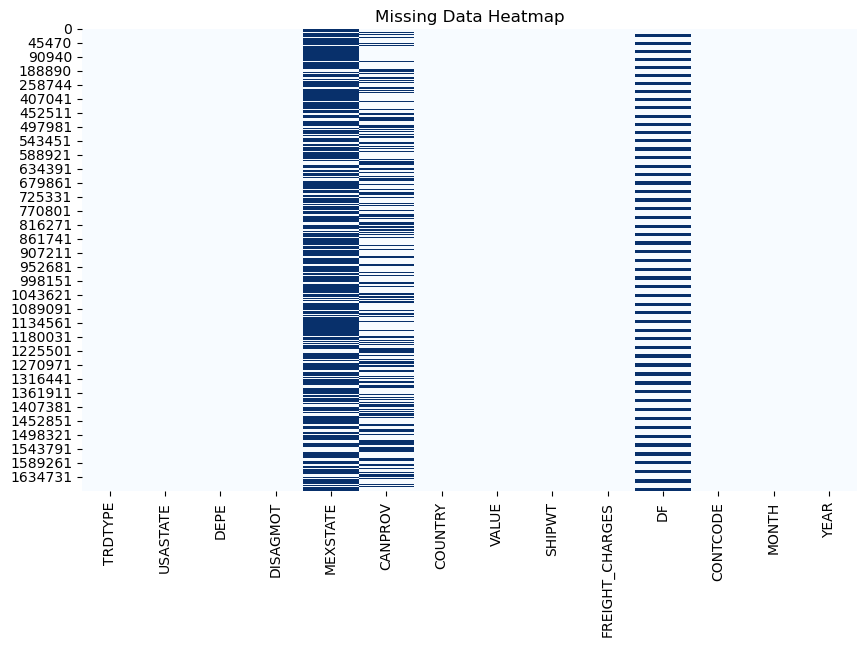

In [13]:
#Heatmap of missing data 
plt.figure(figsize=(10, 6))
sns.heatmap(combined_dot1.isnull(), cbar=False, cmap='Blues')
plt.title('Missing Data Heatmap')
plt.show()

###  4.2 Handling Missing Values

#### 4.2.1 Missing Values in both 'MEXSTATE' and 'CANPROV'

In [14]:
#percentage of missing values per 'MEXSTATE' column
combined_dot1['MEXSTATE'].isnull().sum()/len(combined_dot1)*100

70.72433246583604

In [15]:
#percentage of missing values per 'CANPROV' column
combined_dot1['CANPROV'].isnull().sum()/len(combined_dot1)*100

36.82735915387358

In [16]:
# Rows where both 'MEXSTATE' and 'CANPROV' are missing
both_missing = combined_dot1[pd.isnull(combined_dot1['MEXSTATE']) & pd.isnull(combined_dot1['CANPROV'])]

# Count the number of rows where both 'MEXSTATE' and 'CANPROV' are missing
missing_count = both_missing.shape[0]

# Display the rows where both MEXSTATE and CANPROV are missing
print("Rows where both MEXSTATE and CANPROV are missing:")
print(both_missing)

# Display the count of rows where both MEXSTATE and CANPROV are missing
print(f"\nTotal number of rows where both MEXSTATE and CANPROV are missing: {missing_count}")

Rows where both MEXSTATE and CANPROV are missing:
         TRDTYPE USASTATE  DEPE  DISAGMOT MEXSTATE CANPROV  COUNTRY   VALUE  \
1035           1       CA  2304         5      NaN     NaN     2010  101722   
1252           1       CA  2506         5      NaN     NaN     2010   26649   
1298           1       CA  2507         5      NaN     NaN     2010    7000   
1344           1       CA  2604         5      NaN     NaN     2010   39312   
2592           1       FL  2304         5      NaN     NaN     2010  131553   
...          ...      ...   ...       ...      ...     ...      ...     ...   
1680112        2       WY  2507         5      NaN     NaN     2010   71848   
1680124        2       WY  30XX         5      NaN     NaN     2010    7004   
1680132        2       WY  3307         3      NaN     NaN     2010    2050   
1680144        2       WY  33XX         5      NaN     NaN     2010   23409   
1680175        2       WY  41XX         3      NaN     NaN     2010   11931   

 

In [17]:
#calculating the percentage of values that have missing data for both 'MEXSTATE' and 'CANPROV'
missing_count_percentage = missing_count / len(combined_dot1)*100
missing_count_percentage 

7.5516916197096275

In [18]:
# Filter rows where both 'MEXSTATE' and 'CANPROV' are NaN
condition = pd.isnull(combined_dot1['MEXSTATE']) & pd.isnull(combined_dot1['CANPROV'])

# Drop the rows where both 'MEXSTATE' and 'CANPROV' are NaN
combined_dot1 = combined_dot1[~condition]

In [19]:
#percentage of missing values per 'MEXSTATE' column
combined_dot1['MEXSTATE'].isnull().sum()/len(combined_dot1)*100

68.33293323904084

In [20]:
#percentage of missing values per 'MEXSTATE' column
combined_dot1['CANPROV'].isnull().sum()/len(combined_dot1)*100

31.667066760959163

In [21]:
combined_dot1.isnull().sum()

TRDTYPE                 0
USASTATE                0
DEPE                    0
DISAGMOT                0
MEXSTATE           947896
CANPROV            439277
COUNTRY                 0
VALUE                   0
SHIPWT                  0
FREIGHT_CHARGES         0
DF                 453010
CONTCODE                0
MONTH                   0
YEAR                    0
dtype: int64

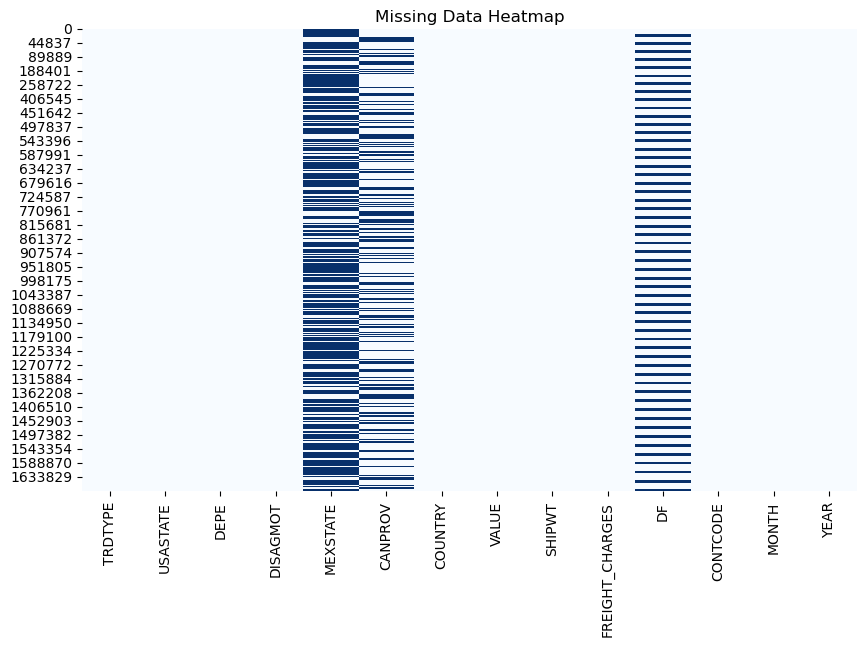

In [22]:
#Heatmap of missing data after dropping rows with missing values for both 'MEXSTATE' & 'CANPROV'
plt.figure(figsize=(10, 6))
sns.heatmap(combined_dot1.isnull(), cbar=False, cmap='Blues_r')
plt.title('Missing Data Heatmap')
plt.show()

#### 4.2.2 Missing values in 'DF'

In [23]:
#percentage of missing values per 'DF' column
combined_dot1['DF'].isnull().sum()/len(combined_dot1)*100

32.65706584542807

In [24]:
# this was done using the mode of 'DF' grouped by 'USASTATE'

# checking the missing values in the 'DF' column
missing_values = combined_dot1['DF'].isna().sum()
print(f"Missing values: {missing_values}")


# Imputing missing values based on 'USASTATE' column
combined_dot1['DF'] = combined_dot1.groupby(['USASTATE'], group_keys=False)['DF'].apply(lambda x: x.fillna(x.mode()[0]))


print(combined_dot1.head())

# checking the missing values in the 'DF' column after handling missing values
missing_values = combined_dot1['DF'].isna().sum()
print(f"Missing values: {missing_values}")


Missing values: 453010
   TRDTYPE USASTATE  DEPE  DISAGMOT MEXSTATE CANPROV  COUNTRY    VALUE  \
0        1       AK  0115         5      NaN      XB     1220     4660   
1        1       AK  0901         5      NaN      XO     1220    14360   
2        1       AK  20XX         1       XX     NaN     2010  4293733   
3        1       AK  20XX         3      NaN      XA     1220    28283   
4        1       AK  20XX         3      NaN      XA     1220    29848   

     SHIPWT  FREIGHT_CHARGES   DF CONTCODE  MONTH  YEAR  
0         0               67  2.0        X      4  2020  
1         0              282  1.0        X      4  2020  
2  24971000                0  1.0        0      4  2020  
3       443              563  1.0        X      4  2020  
4        69              538  2.0        X      4  2020  
Missing values: 0


In [25]:
combined_dot1.isnull().sum()

TRDTYPE                 0
USASTATE                0
DEPE                    0
DISAGMOT                0
MEXSTATE           947896
CANPROV            439277
COUNTRY                 0
VALUE                   0
SHIPWT                  0
FREIGHT_CHARGES         0
DF                      0
CONTCODE                0
MONTH                   0
YEAR                    0
dtype: int64

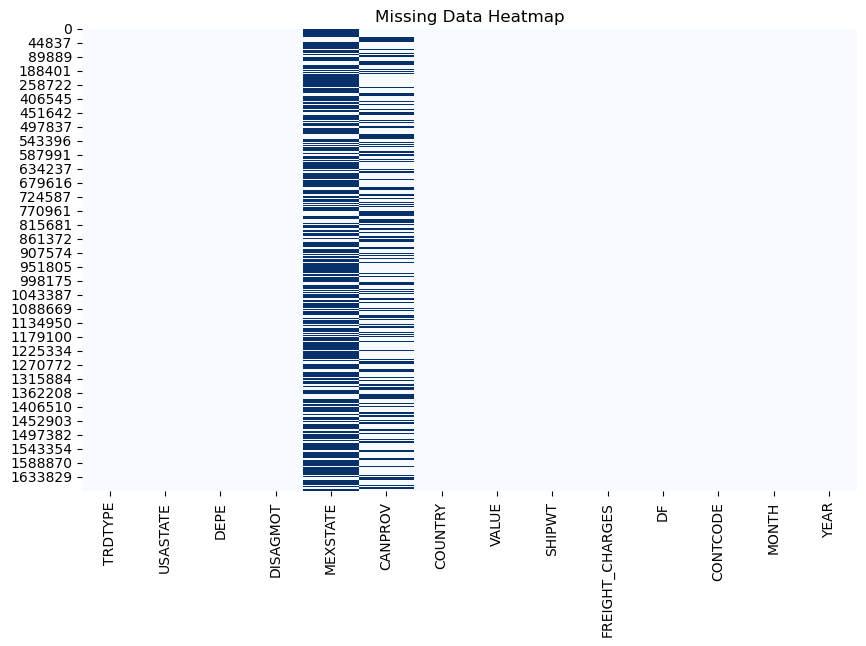

In [26]:
#Heatmap of missing data after handling missing values in 'DF'
plt.figure(figsize=(10, 6))
sns.heatmap(combined_dot1.isnull(), cbar=False, cmap='Blues')
plt.title('Missing Data Heatmap')
plt.show()

In [27]:
combined_dot1.isnull().sum()

TRDTYPE                 0
USASTATE                0
DEPE                    0
DISAGMOT                0
MEXSTATE           947896
CANPROV            439277
COUNTRY                 0
VALUE                   0
SHIPWT                  0
FREIGHT_CHARGES         0
DF                      0
CONTCODE                0
MONTH                   0
YEAR                    0
dtype: int64

In [28]:
combined_dot1.head()

TRDTYPE USASTATE  DEPE  DISAGMOT MEXSTATE CANPROV  COUNTRY    VALUE  \
0        1       AK  0115         5      NaN      XB     1220     4660   
1        1       AK  0901         5      NaN      XO     1220    14360   
2        1       AK  20XX         1       XX     NaN     2010  4293733   
3        1       AK  20XX         3      NaN      XA     1220    28283   
4        1       AK  20XX         3      NaN      XA     1220    29848   

     SHIPWT  FREIGHT_CHARGES   DF CONTCODE  MONTH  YEAR  
0         0               67  2.0        X      4  2020  
1         0              282  1.0        X      4  2020  
2  24971000                0  1.0        0      4  2020  
3       443              563  1.0        X      4  2020  
4        69              538  2.0        X      4  2020

In [29]:
combined_dot1['TRDTYPE'].value_counts()

1    934163
2    453010
Name: TRDTYPE, dtype: int64

In [30]:
# Renaming values in theb 'TRDTYPE' column
combined_dot1["TRDTYPE"] = combined_dot1["TRDTYPE"].replace({1: 'Export',
    2: 'Import'})

In [31]:
combined_dot1['TRDTYPE'].value_counts()

Export    934163
Import    453010
Name: TRDTYPE, dtype: int64

In [32]:
combined_dot1['USASTATE'].value_counts()

TX    82134
CA    66451
IL    53352
OH    43850
PA    43351
NY    43291
FL    42631
GA    41443
MI    39264
WI    38065
NC    36746
NJ    35881
MN    35321
IN    35230
WA    35138
TN    33910
MA    32860
AZ    31669
MO    29161
SC    27936
KY    27211
VA    26886
OR    26171
CO    25747
KS    25252
IA    24655
CT    24286
AL    23329
LA    22903
UT    22138
MD    22046
OK    21580
MS    20826
NV    19752
NE    19142
ME    18642
AR    18219
ID    17822
NH    17440
ND    15688
MT    14172
SD    13264
VT    13062
DE    12429
NM    12249
RI    11806
WV    11178
WY     9028
AK     8195
DU     7505
HI     3975
DC     2891
Name: USASTATE, dtype: int64

In [33]:
combined_dot1['DEPE'].value_counts()

2304    155383
3802     59721
20XX     57484
3401     51402
0901     50778
         ...  
1902         7
3881         4
0182         2
0152         2
3385         1
Name: DEPE, Length: 246, dtype: int64

In [34]:
combined_dot1['DISAGMOT'].value_counts()

5    777628
3    268592
6    210345
8     90279
1     31341
7      5819
9      2278
4       891
Name: DISAGMOT, dtype: int64

In [35]:
# renaming values in the 'DISAGMOT' column #FTZ = Foreign Trade Zones
combined_dot1["DISAGMOT"] = combined_dot1["DISAGMOT"].replace({1: 'Vessel',
    3: 'Air',
    4: 'Mail',
    5: 'Truck',
    6: 'Rail',
    7: 'Pipeline',
    8: 'Other',
    9: 'FTZs'
    })

In [36]:
combined_dot1['DISAGMOT'].value_counts()

Truck       777628
Air         268592
Rail        210345
Other        90279
Vessel       31341
Pipeline      5819
FTZs          2278
Mail           891
Name: DISAGMOT, dtype: int64

In [37]:
combined_dot1['MEXSTATE'].value_counts()

XX    51000
MX    38557
NL    31359
CH    29003
DF    24838
JA    24405
BC    22568
SO    20256
TM    20216
CO    20006
QT    18177
OT    16827
GT    16174
SI    11069
SL    10674
PU     9207
AG     8700
DG     8676
CM     7253
VE     7066
HG     6930
MI     5529
MO     5356
TL     4258
ZA     3880
QR     3442
BS     3432
YU     2796
TB     2051
CL     1635
OA     1553
CS     1367
GR     1017
Name: MEXSTATE, dtype: int64

In [38]:
combined_dot1['CANPROV'].value_counts()

XO    255316
XQ    169771
XC    151019
XA    135632
XM     89455
XS     53196
XB     47868
XN     25180
XP     10845
XW      8095
XY       944
OT       273
XT       247
XV        55
Name: CANPROV, dtype: int64

In [39]:
combined_dot1['COUNTRY'].value_counts()

1220    947896
2010    439277
Name: COUNTRY, dtype: int64

In [40]:
# Renaming values in the 'COUNTRY' column
combined_dot1["COUNTRY"] = combined_dot1["COUNTRY"].replace({1220: 'Canada',
    2010: 'Mexico'})

In [41]:
combined_dot1['COUNTRY'].value_counts()

Canada    947896
Mexico    439277
Name: COUNTRY, dtype: int64

In [42]:
combined_dot1['VALUE'].count()

1387173

In [43]:
combined_dot1['SHIPWT'].count()

1387173

In [44]:
combined_dot1['FREIGHT_CHARGES'].count()

1387173

In [45]:
combined_dot1['DF'].value_counts()

1.0    1079766
2.0     307407
Name: DF, dtype: int64

In [46]:
# Renaming values in the 'DF' column
combined_dot1["DF"] = combined_dot1["DF"].replace({1.0: 'Domestic',
    2.0: 'Foreign'})

In [47]:
combined_dot1['DF'].value_counts()

Domestic    1079766
Foreign      307407
Name: DF, dtype: int64

In [48]:
combined_dot1['CONTCODE'].value_counts()

0    728677
X    545183
1    113313
Name: CONTCODE, dtype: int64

In [49]:
# Renaming values in the 'CONTCODE' column
combined_dot1["CONTCODE"] = combined_dot1["CONTCODE"].replace({'X': 'Containerized',
    '0':'Non_Containerized', '1':'Others'})

In [50]:
combined_dot1['CONTCODE'].value_counts()

Non_Containerized    728677
Containerized        545183
Others               113313
Name: CONTCODE, dtype: int64

In [51]:
combined_dot1['MONTH'].value_counts()

3     131929
8     129489
6     129070
7     128594
9     128467
5     128299
4     127448
2     126478
1     124383
10     78735
11     77897
12     76384
Name: MONTH, dtype: int64

In [52]:
# renaming the values of the month column
combined_dot1["MONTH"] = combined_dot1["MONTH"].replace({1.0: 'January',
    2.0: 'February',
    3.0: 'March',
    4.0: 'April',
    5.0: 'May',
    6.0: 'June',
    7.0: 'July',
    8.0: 'August',
    9.0: 'September',
    10.0: 'October',
    11.0: 'November',
    12.0: 'December'})

In [53]:
combined_dot1['MONTH'].value_counts()

March        131929
August       129489
June         129070
July         128594
September    128467
May          128299
April        127448
February     126478
January      124383
October       78735
November      77897
December      76384
Name: MONTH, dtype: int64

In [54]:
combined_dot1['YEAR'].value_counts()

2023    315906
2022    312399
2021    302699
2024    241799
2020    214370
Name: YEAR, dtype: int64

#### Changing Datatypes of some Columns

In [55]:
#Changing datatypes
combined_dot1 = combined_dot1.astype({'TRDTYPE':'str',
                                      'DISAGMOT':'str',
                                      'COUNTRY':'str',
                                      'DF':'str',
                                      'CONTCODE':'str',
                                      'MONTH':'str',
                                      'YEAR':'str'
    
})

In [56]:
combined_dot1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1387173 entries, 0 to 1680174
Data columns (total 14 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   TRDTYPE          1387173 non-null  object
 1   USASTATE         1387173 non-null  object
 2   DEPE             1387173 non-null  object
 3   DISAGMOT         1387173 non-null  object
 4   MEXSTATE         439277 non-null   object
 5   CANPROV          947896 non-null   object
 6   COUNTRY          1387173 non-null  object
 7   VALUE            1387173 non-null  int64 
 8   SHIPWT           1387173 non-null  int64 
 9   FREIGHT_CHARGES  1387173 non-null  int64 
 10  DF               1387173 non-null  object
 11  CONTCODE         1387173 non-null  object
 12  MONTH            1387173 non-null  object
 13  YEAR             1387173 non-null  object
dtypes: int64(3), object(11)
memory usage: 158.7+ MB


In [57]:
combined_dot1['MONTH'].unique()

array(['April', 'August', 'February', 'January', 'July', 'March', 'May',
       'June', 'September', 'December', 'November', 'October'],
      dtype=object)

In [58]:
#describing the categorical variables
combined_dot1.describe(include='object')

TRDTYPE USASTATE     DEPE DISAGMOT MEXSTATE CANPROV  COUNTRY  \
count   1387173  1387173  1387173  1387173   439277  947896  1387173   
unique        2       52      246        8       33      14        2   
top      Export       TX     2304    Truck       XX      XO   Canada   
freq     934163    82134   155383   777628    51000  255316   947896   

              DF           CONTCODE    MONTH     YEAR  
count    1387173            1387173  1387173  1387173  
unique         2                  3       12        5  
top     Domestic  Non_Containerized    March     2023  
freq     1079766             728677   131929   315906

In [59]:
combined_dot1['MEXSTATE'].unique()

array([nan, 'XX', 'CO', 'NL', 'CH', 'CM', 'GT', 'JA', 'MX', 'OT', 'QT',
       'SL', 'BC', 'BS', 'DF', 'TM', 'ZA', 'DG', 'HG', 'SO', 'AG', 'MI',
       'MO', 'PU', 'TL', 'VE', 'SI', 'YU', 'TB', 'CS', 'CL', 'OA', 'QR',
       'GR'], dtype=object)

In [60]:
#describing the numerical variables
combined_dot1.describe()

VALUE        SHIPWT  FREIGHT_CHARGES
count  1.387173e+06  1.387173e+06     1.387173e+06
mean   3.256269e+06  1.470102e+06     4.767601e+04
std    3.403008e+07  4.800538e+07     1.187160e+06
min    0.000000e+00  0.000000e+00     0.000000e+00
25%    1.940300e+04  0.000000e+00     0.000000e+00
50%    9.810700e+04  0.000000e+00     3.000000e+02
75%    6.068850e+05  4.177000e+03     3.287000e+03
max    4.727760e+09  8.563936e+09     2.275531e+08

In [61]:
combined_dot1['USASTATE'].unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'DU', 'FL',
       'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD',
       'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ',
       'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN',
       'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [62]:
combined_dot1['DF'].unique()

array(['Foreign', 'Domestic'], dtype=object)

#### 4.2.3 Checking for outliers in the numerical data

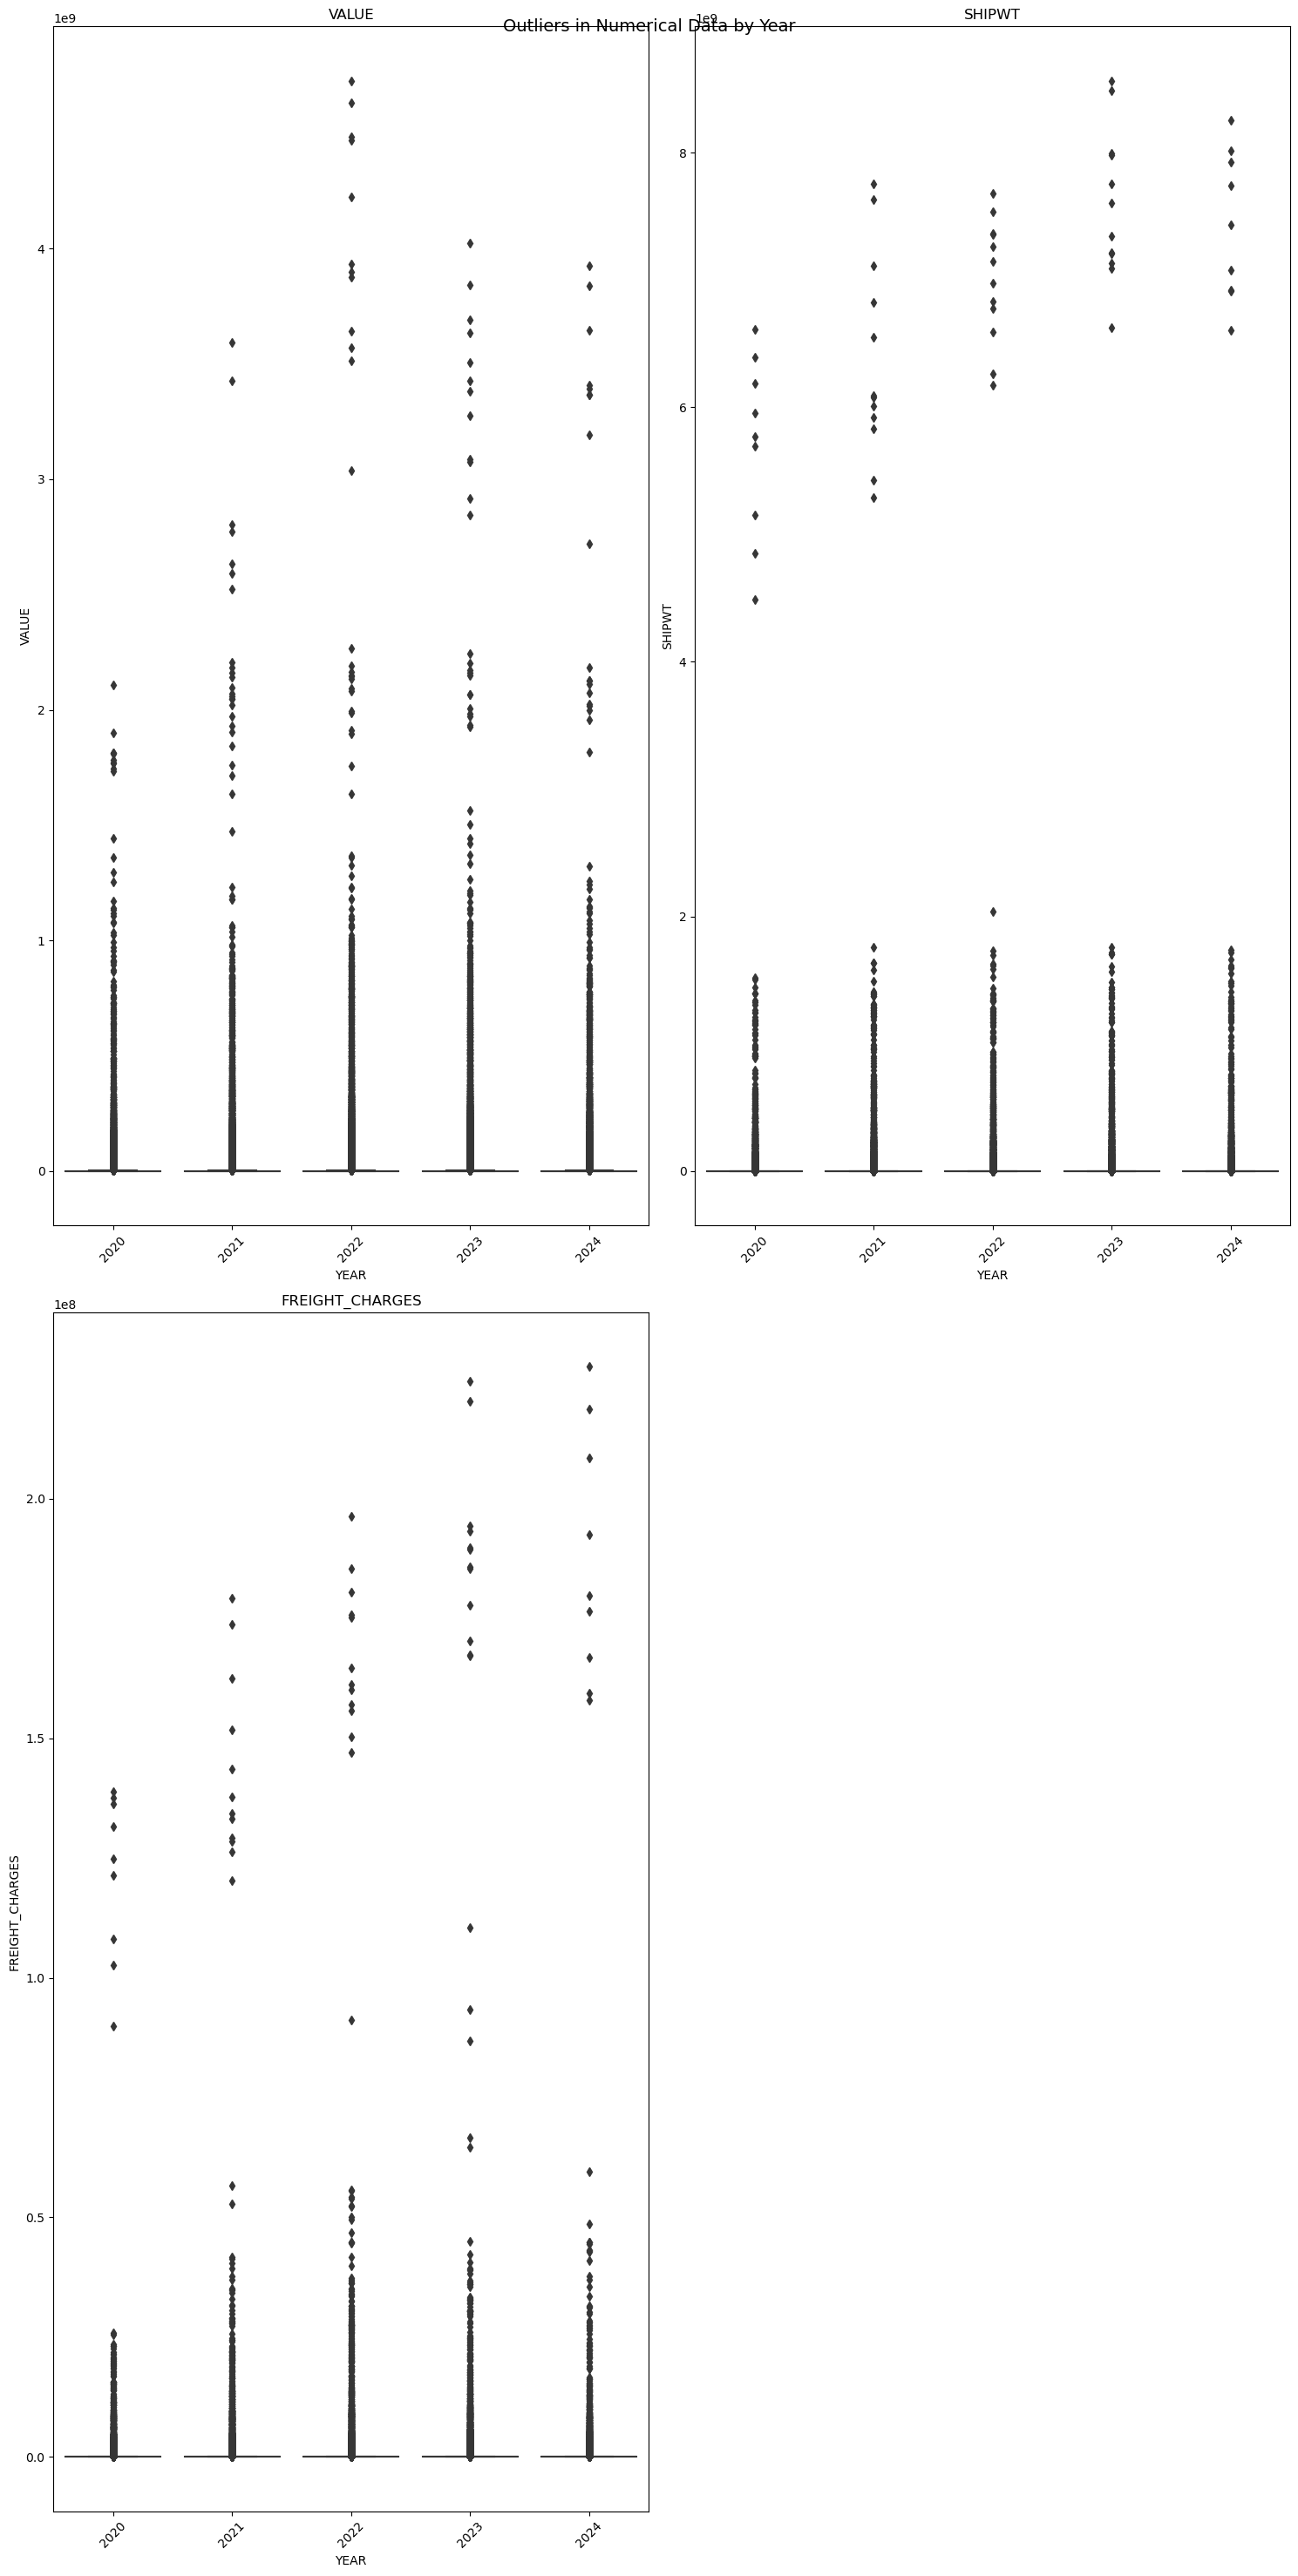

In [63]:
# subplots with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 30))
plt.suptitle('Outliers in Numerical Data by Year', fontsize=14)

# Plot VALUE by year (boxplot)
sns.boxplot(x='YEAR', y='VALUE', data=combined_dot1, palette='Blues', ax=axes[0, 0])
axes[0, 0].set_title('VALUE')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)

# Plot SHIPWT by year (boxplot)
sns.boxplot(x='YEAR', y='SHIPWT', data=combined_dot1, palette='Blues', ax=axes[0, 1])
axes[0, 1].set_title('SHIPWT')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)

# Plot FREIGHT_CHARGES by year (boxplot)
sns.boxplot(x='YEAR', y='FREIGHT_CHARGES', data=combined_dot1, palette='Blues', ax=axes[1, 0])
axes[1, 0].set_title('FREIGHT_CHARGES')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)

# Hide the bottom right subplot since it's not needed
axes[1, 1].axis('off')

# Improve layout to prevent overlapping labels
plt.tight_layout()
plt.show()


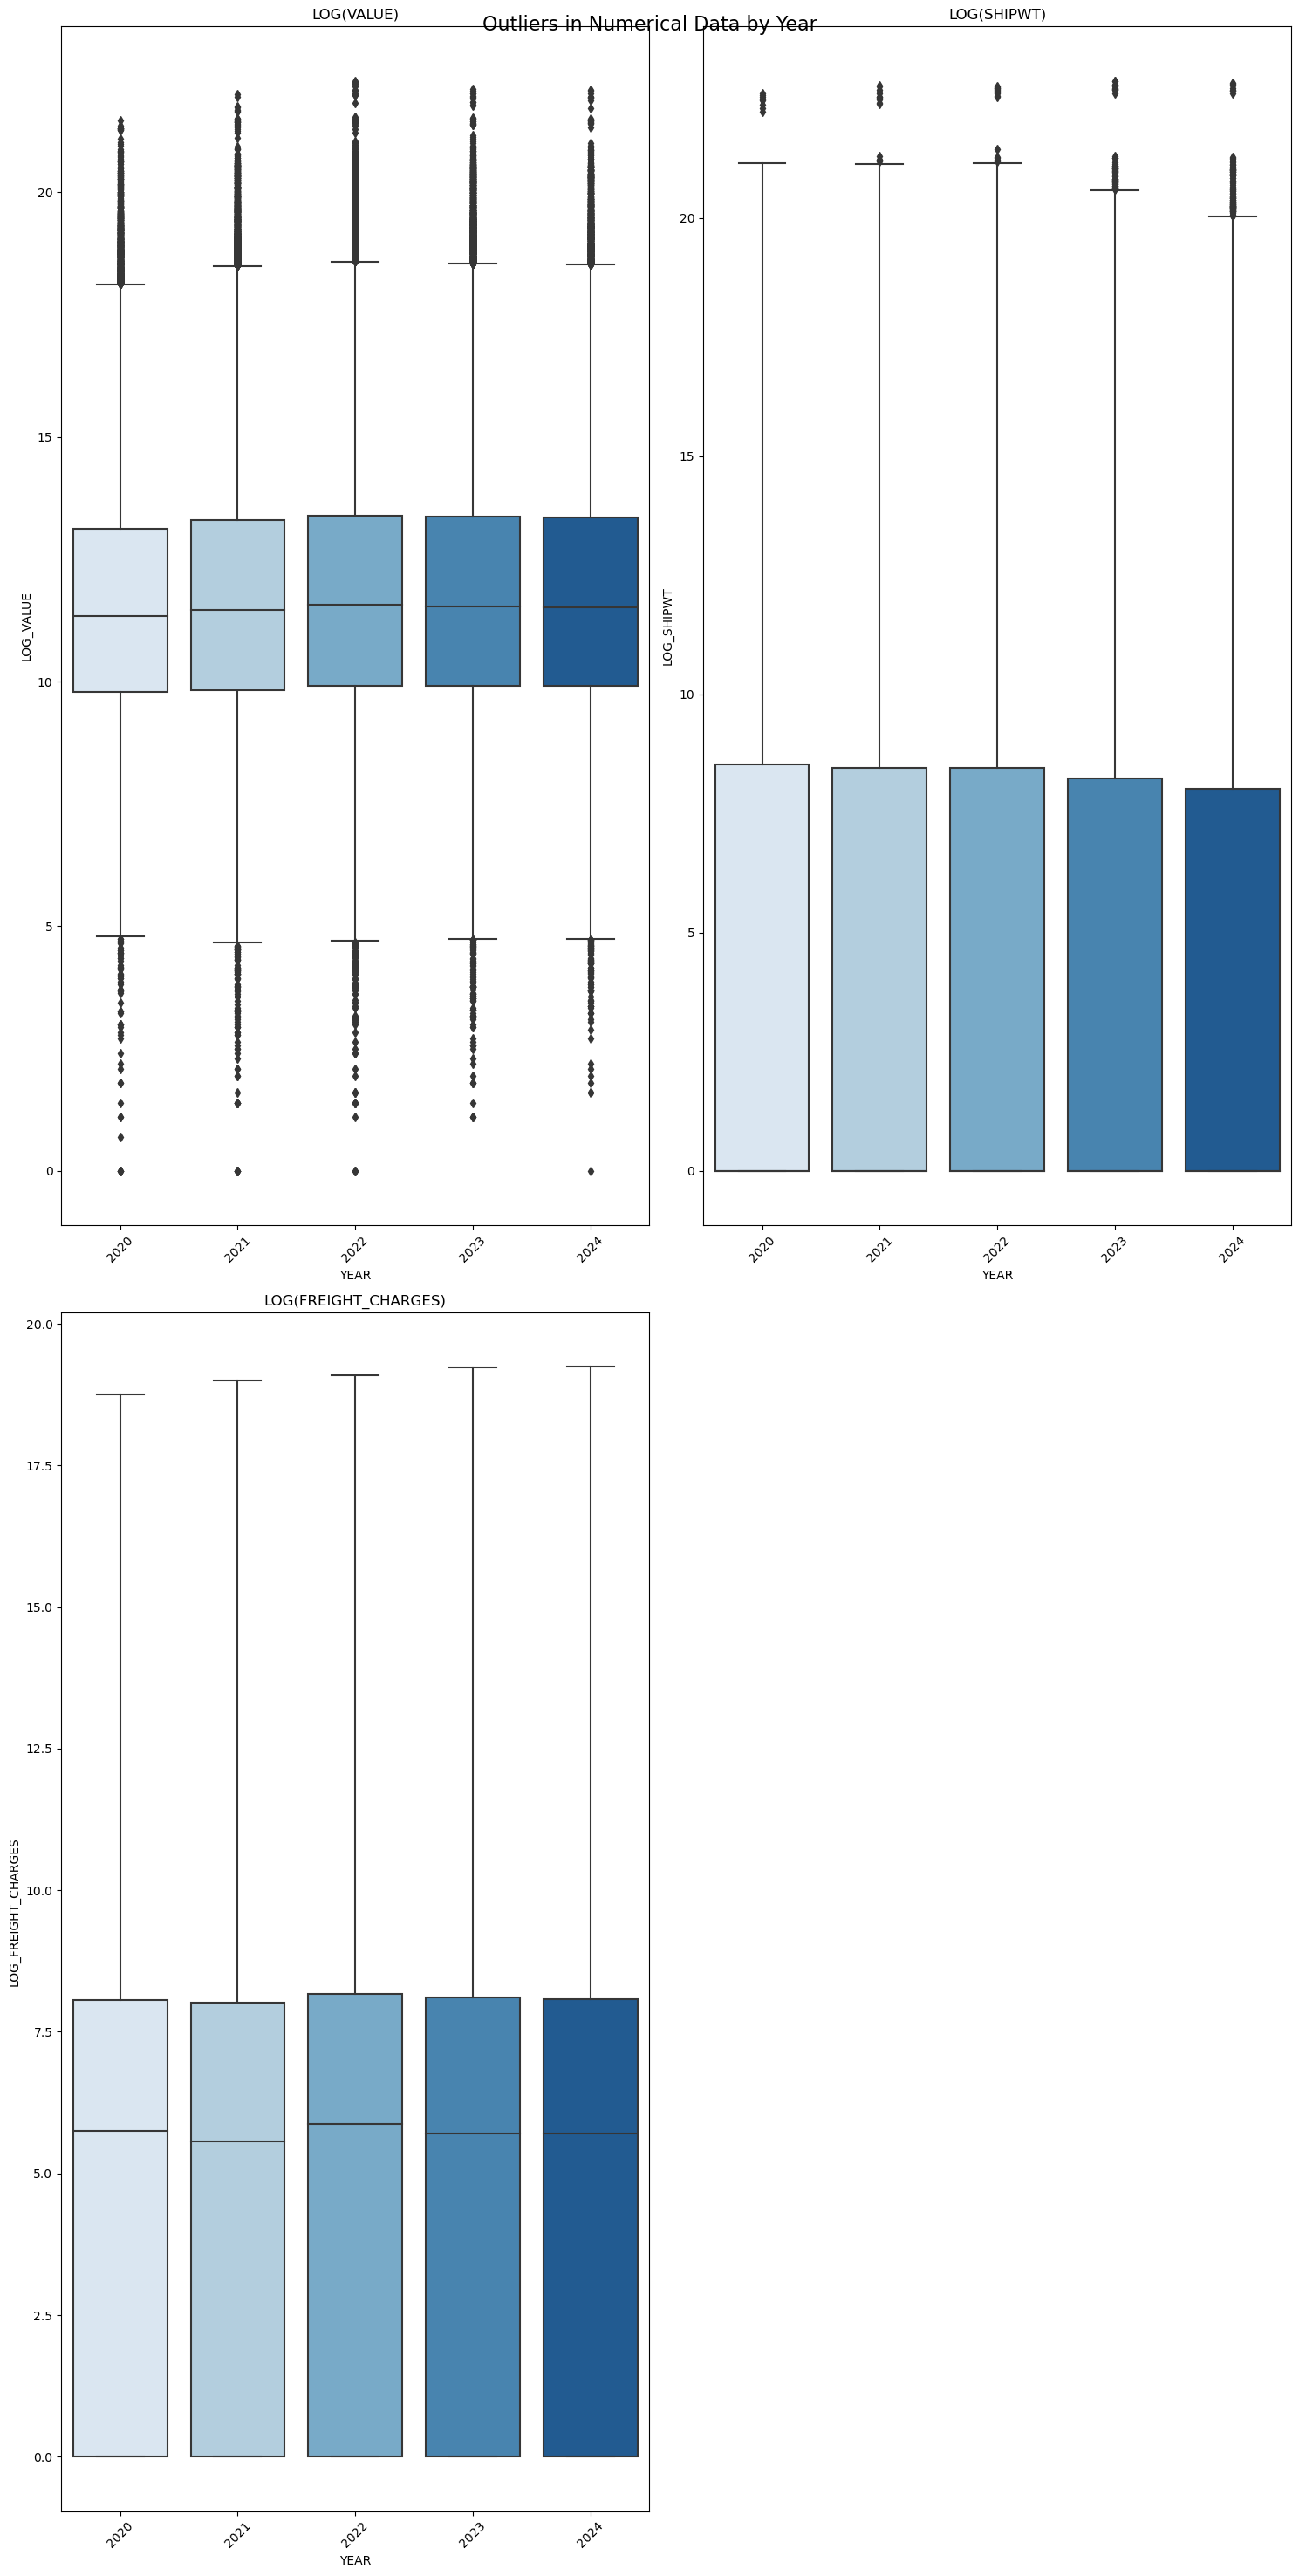

In [64]:
#Handling ouliers: since there are lots of outliers in the data, it is handled using the 'Log Transformation'


# subplots with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 30))
plt.suptitle('Outliers in Numerical Data by Year', fontsize=16)

# Apply log transformation to the data (if values are positive)
combined_dot1['LOG_VALUE'] = np.log(combined_dot1['VALUE'] + 1) 
combined_dot1['LOG_SHIPWT'] = np.log(combined_dot1['SHIPWT'] + 1)
combined_dot1['LOG_FREIGHT_CHARGES'] = np.log(combined_dot1['FREIGHT_CHARGES'] + 1)

# Plot VALUE by year (boxplot)
sns.boxplot(x='YEAR', y='LOG_VALUE', data=combined_dot1, palette='Blues_r', ax=axes[0, 0])
axes[0, 0].set_title('LOG(VALUE)')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)

# Plot SHIPWT by year (boxplot)
sns.boxplot(x='YEAR', y='LOG_SHIPWT', data=combined_dot1, palette='Blues_r', ax=axes[0, 1])
axes[0, 1].set_title('LOG(SHIPWT)')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)

# Plot FREIGHT_CHARGES by year (boxplot)
sns.boxplot(x='YEAR', y='LOG_FREIGHT_CHARGES', data=combined_dot1, palette='Blues_r', ax=axes[1, 0])
axes[1, 0].set_title('LOG(FREIGHT_CHARGES)')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)

# Hide the bottom right subplot since it's not needed
axes[1, 1].axis('off')



# Improve layout to prevent overlapping labels
plt.tight_layout()
plt.show()

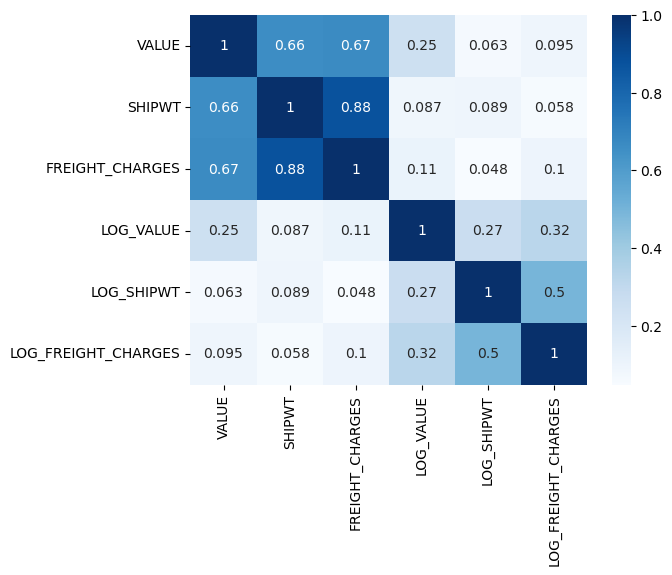

In [65]:
#Finding the correlation between numerical variables
# Create correlation matrix
correlation = combined_dot1.select_dtypes("number").corr()
correlation

# Plot heatmap of `correlation`
sns.heatmap(correlation,annot = correlation,cmap = 'Blues');

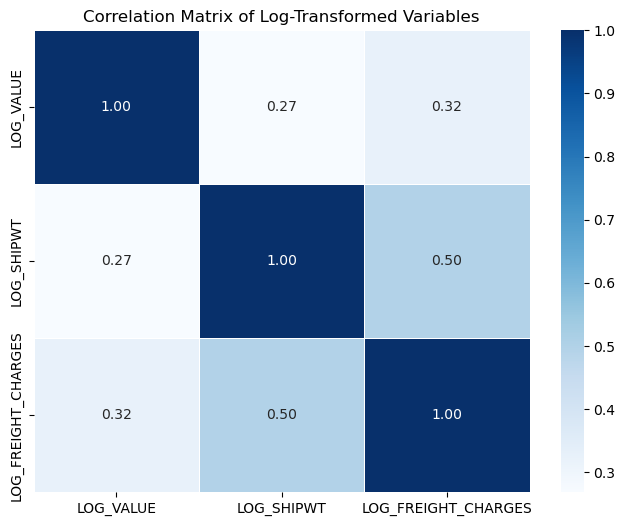

In [66]:
# Using only log-transformed numerical variables
log_columns = ['LOG_VALUE', 'LOG_SHIPWT', 'LOG_FREIGHT_CHARGES']
correlation = combined_dot1[log_columns].corr()

# Heatmap of `correlation`
plt.figure(figsize=(8, 6))  
sns.heatmap(correlation, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)

# Show the heatmap
plt.title("Correlation Matrix of Log-Transformed Variables")
plt.show()

### 4.3 Univariate Analysis

#### 4.3.1 Numerical

In [67]:
# calculating the skewness of the original numerical variables in the data
# Calculating the skewness in the data
print("Skewness of VALUE:", skew(combined_dot1['VALUE'], nan_policy='omit'))
print("Skewness of SHIPWT:", skew(combined_dot1['SHIPWT'], nan_policy='omit'))
print("Skewness of FREIGHT_CHARGES:", skew(combined_dot1['FREIGHT_CHARGES'], nan_policy='omit'))

Skewness of VALUE: 52.186397412248546
Skewness of SHIPWT: 122.38724718905561
Skewness of FREIGHT_CHARGES: 116.83972506275144


The skewness values for VALUE (52.19), SHIPWT (122.39), and FREIGHT_CHARGES (116.84) indicate highly right-skewed distributions, meaning these variables have a long tail on the right. This suggests that a small number of extremely high-value shipments, weights, and freight charges are significantly inflating the averages, while most shipments have much lower values

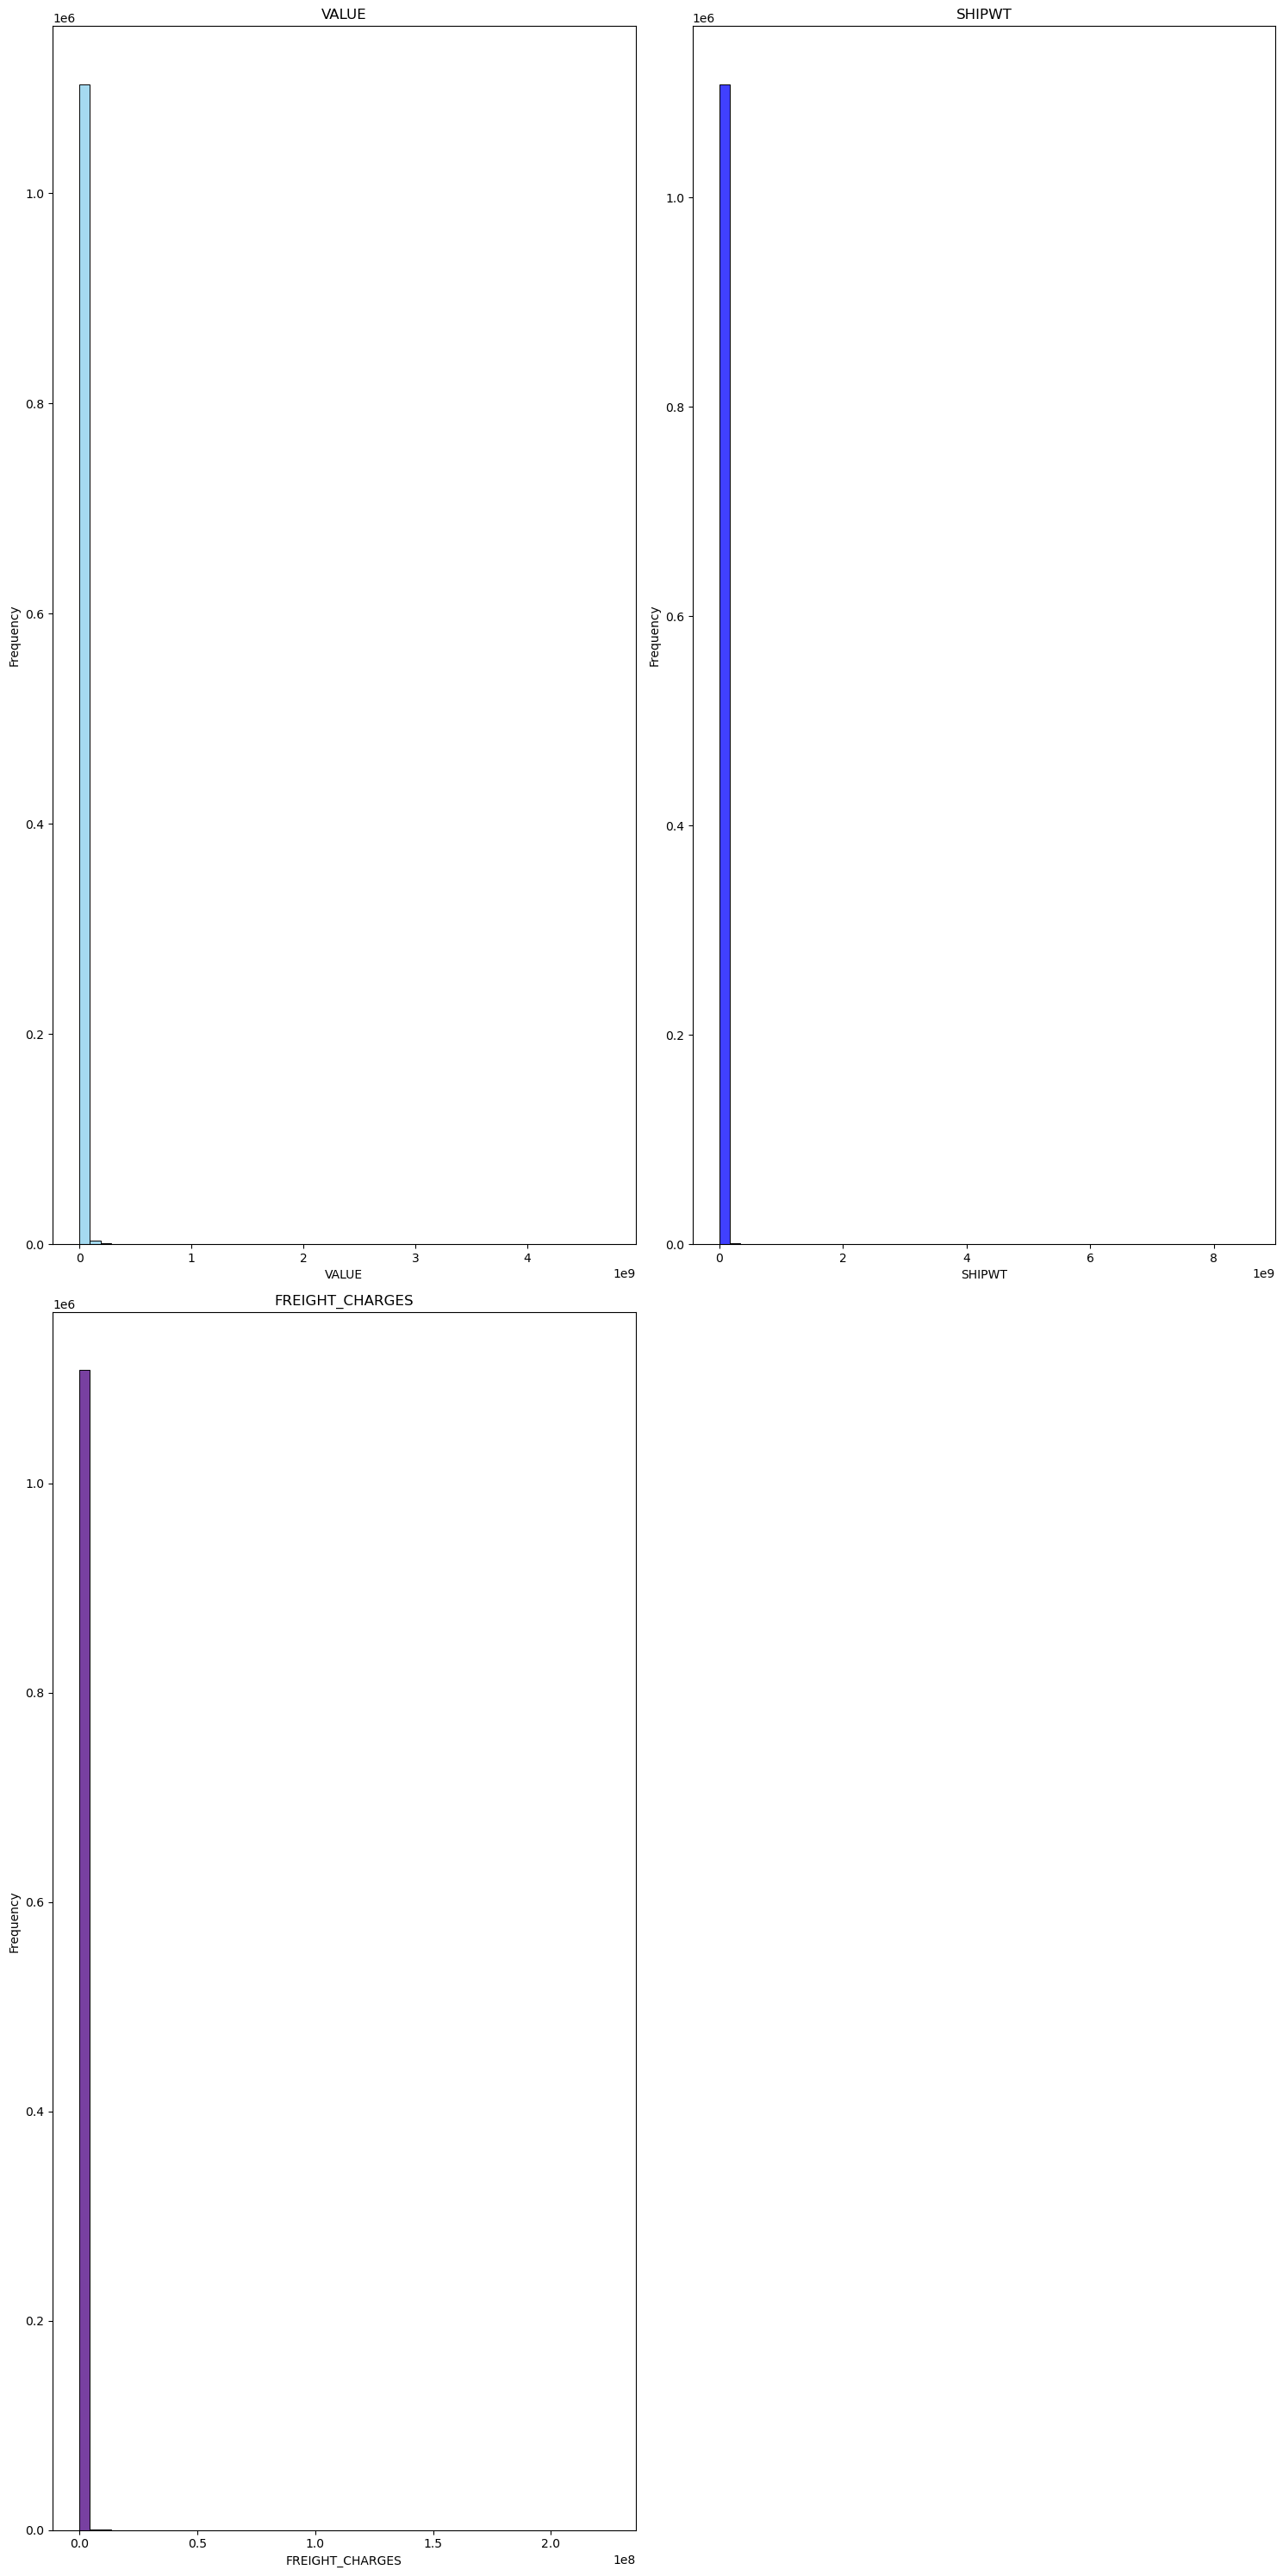

In [68]:
import numpy as np

# Downsample the dataset to a smaller size (e.g., 10% of the original data)
sampled_data = combined_dot1.sample(frac=0.8, random_state=42)  # 10% sample

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 30))

# Plot 'VALUE' as a histogram for the sampled dataset
sns.histplot(data=sampled_data, x='VALUE', kde=False, color='skyblue', ax=axes[0, 0], bins=50)
axes[0, 0].set_title('VALUE')
axes[0, 0].set_xlabel('VALUE')
axes[0, 0].set_ylabel('Frequency')

# Plot 'SHIPWT' as a histogram for the sampled dataset
sns.histplot(data=sampled_data, x='SHIPWT', kde=False, color='Blue', ax=axes[0, 1], bins=50)
axes[0, 1].set_title('SHIPWT')
axes[0, 1].set_xlabel('SHIPWT')
axes[0, 1].set_ylabel('Frequency')

# Plot 'FREIGHT_CHARGES' as a histogram for the sampled dataset
sns.histplot(data=sampled_data, x='FREIGHT_CHARGES', kde=False, color='indigo', ax=axes[1, 0], bins=50)
axes[1, 0].set_title('FREIGHT_CHARGES')
axes[1, 0].set_xlabel('FREIGHT_CHARGES')
axes[1, 0].set_ylabel('Frequency')

axes[1,1].axis('off')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


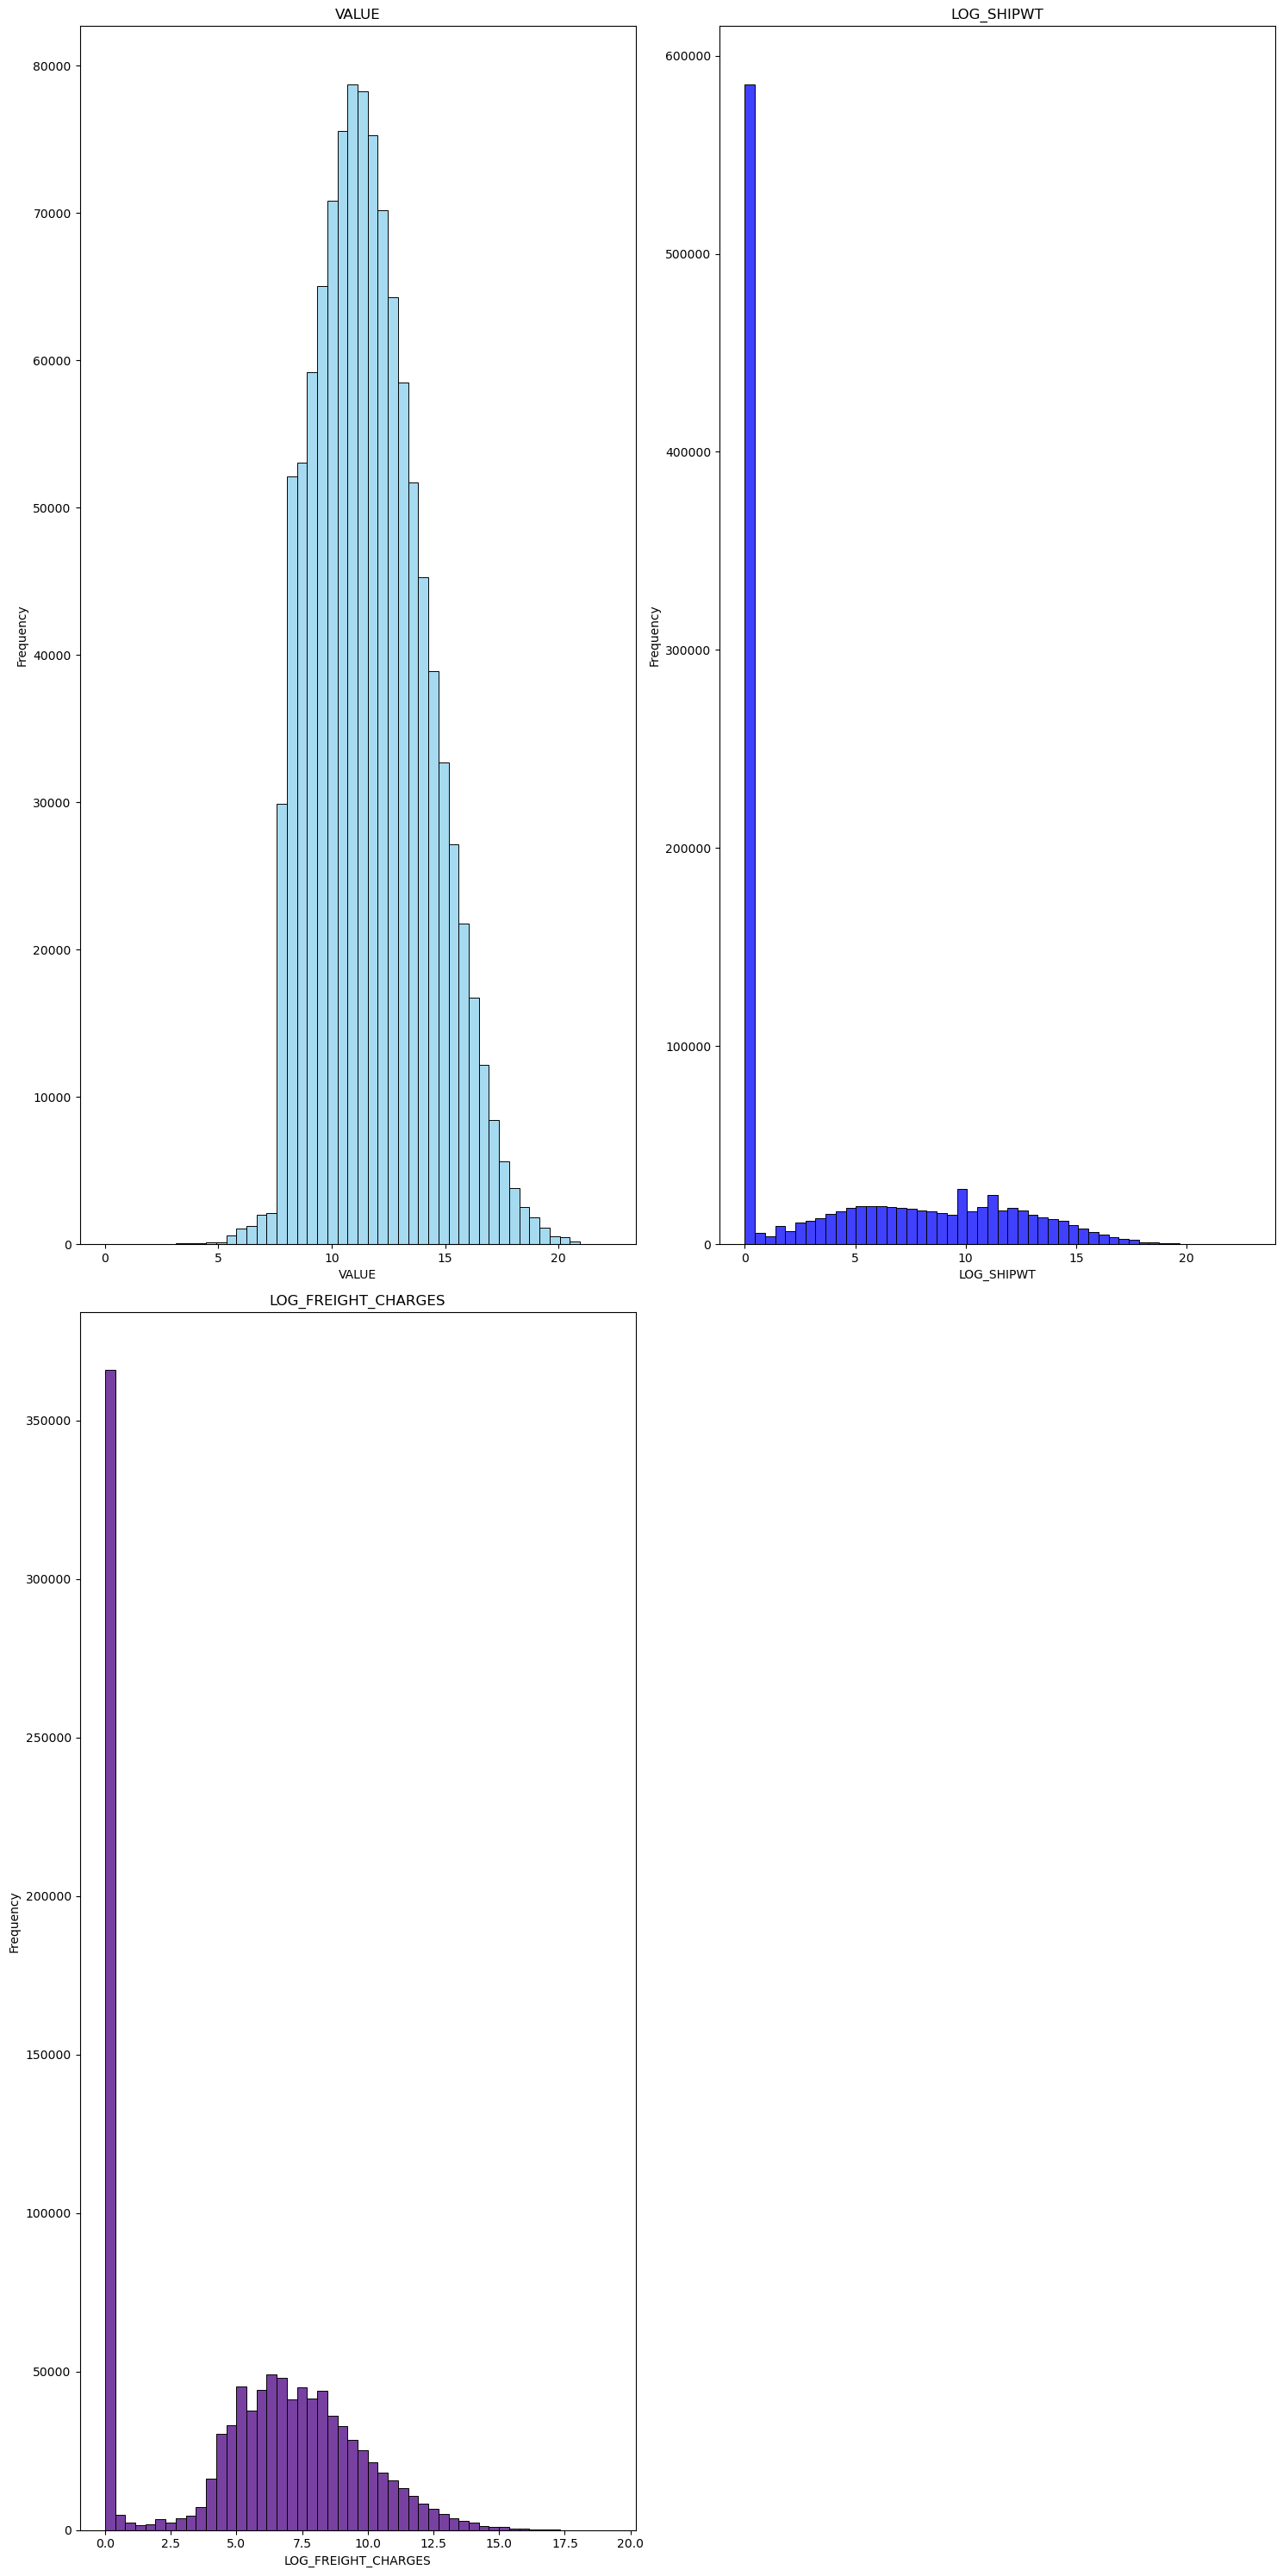

In [69]:
import numpy as np

# Downsample the dataset to a smaller size (e.g., 10% of the original data)
sampled_data = combined_dot1.sample(frac=0.8, random_state=42)  # 10% sample

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 30))

# Plot 'VALUE' as a histogram for the sampled dataset
sns.histplot(data=sampled_data, x='LOG_VALUE', kde=False, color='skyblue', ax=axes[0, 0], bins=50)
axes[0, 0].set_title('VALUE')
axes[0, 0].set_xlabel('VALUE')
axes[0, 0].set_ylabel('Frequency')

# Plot 'SHIPWT' as a histogram for the sampled dataset
sns.histplot(data=sampled_data, x='LOG_SHIPWT', kde=False, color='Blue', ax=axes[0, 1], bins=50)
axes[0, 1].set_title('LOG_SHIPWT')
axes[0, 1].set_xlabel('LOG_SHIPWT')
axes[0, 1].set_ylabel('Frequency')

# Plot 'FREIGHT_CHARGES' as a histogram for the sampled dataset
sns.histplot(data=sampled_data, x='LOG_FREIGHT_CHARGES', kde=False, color='indigo', ax=axes[1, 0], bins=50)
axes[1, 0].set_title('LOG_FREIGHT_CHARGES')
axes[1, 0].set_xlabel('LOG_FREIGHT_CHARGES')
axes[1, 0].set_ylabel('Frequency')

axes[1,1].axis('off')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [70]:
print("Skewness of LOG_VALUE:", skew(combined_dot1['LOG_VALUE'], nan_policy='omit'))
print("Skewness of LOG_SHIPWT:", skew(combined_dot1['LOG_SHIPWT'], nan_policy='omit'))
print("Skewness of LOG_FREIGHT_CHARGES:", skew(combined_dot1['LOG_FREIGHT_CHARGES'], nan_policy='omit'))

Skewness of LOG_VALUE: 0.42644933719877437
Skewness of LOG_SHIPWT: 0.8665920970980916
Skewness of LOG_FREIGHT_CHARGES: 0.036485386789501736


After applying the log transformation, the skewness of VALUE (0.43), SHIPWT (0.87), and FREIGHT_CHARGES (0.04) is significantly reduced, bringing them closer to a normal distribution. This suggests that the transformation effectively mitigated the impact of extreme values, making the data more suitable for statistical analysis

In [71]:
# Identify outliers using the IQR method
Q1 = combined_dot1[["VALUE", "SHIPWT", "FREIGHT_CHARGES"]].quantile(0.25)
Q3 = combined_dot1[["VALUE", "SHIPWT", "FREIGHT_CHARGES"]].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
outliers = combined_dot1[
    (combined_dot1["VALUE"] > (Q3["VALUE"] + 1.5 * IQR["VALUE"])) |
    (combined_dot1["SHIPWT"] > (Q3["SHIPWT"] + 1.5 * IQR["SHIPWT"])) |
    (combined_dot1["FREIGHT_CHARGES"] > (Q3["FREIGHT_CHARGES"] + 1.5 * IQR["FREIGHT_CHARGES"]))
]

# Display top 10 extreme values
outliers.sort_values(by="VALUE", ascending=False).head(10)

TRDTYPE USASTATE  DEPE  DISAGMOT MEXSTATE CANPROV COUNTRY       VALUE  \
788574   Import       IL  39XX  Pipeline      NaN      XA  Canada  4727759929   
898860   Import       IL  39XX  Pipeline      NaN      XA  Canada  4631951070   
927239   Import       IL  39XX  Pipeline      NaN      XA  Canada  4484103686   
984891   Import       IL  39XX  Pipeline      NaN      XA  Canada  4469655970   
1069914  Import       IL  39XX  Pipeline      NaN      XA  Canada  4225557738   
1354181  Import       IL  39XX  Pipeline      NaN      XA  Canada  4023593803   
956155   Import       IL  39XX  Pipeline      NaN      XA  Canada  3935143157   
1643834  Import       IL  39XX  Pipeline      NaN      XA  Canada  3927824552   
1041538  Import       IL  39XX  Pipeline      NaN      XA  Canada  3898220115   
760039   Import       IL  39XX  Pipeline      NaN      XA  Canada  3875965753   

             SHIPWT  FREIGHT_CHARGES        DF           CONTCODE      MONTH  \
788574   7355333312        185448505  Domestic  Non_Containerized     August   
898860   6830869626        155738473  Domestic  Non_Containerized       July   
927239   6593892281        157067897  Domestic  Non_Containerized       June   
984891   6774335630        164650432  Domestic  Non_Containerized        May   
1069914  7265256129        175704275  Domestic  Non_Containerized  September   
1354181  7979835413        194332110  Domestic  Non_Containerized   November   
956155   7144986262        161134023  Domestic  Non_Containerized      March   
1643834  8014184322        218652470  Domestic  Non_Containerized        May   
1041538  7363930326        175188532  Domestic  Non_Containerized    October   
760039   6259998575        150388481  Domestic  Non_Containerized      April   

         YEAR  LOG_VALUE  LOG_SHIPWT  LOG_FREIGHT_CHARGES  
788574   2022  22.276717   22.718692            19.038288  
898860   2022  22.256244   22.644718            18.863689  
927239   2022  22.223804   22.609410            18.872189  
984891   2022  22.220577   22.636407            18.919335  
1069914  2022  22.164417   22.706369            18.984313  
1354181  2023  22.115441   22.800184            19.085079  
956155   2022  22.093213   22.689677            18.897747  
1643834  2024  22.091352   22.804479            19.202994  
1041538  2022  22.083786   22.719860            18.981373  
760039   2022  22.078061   22.557446            18.828732

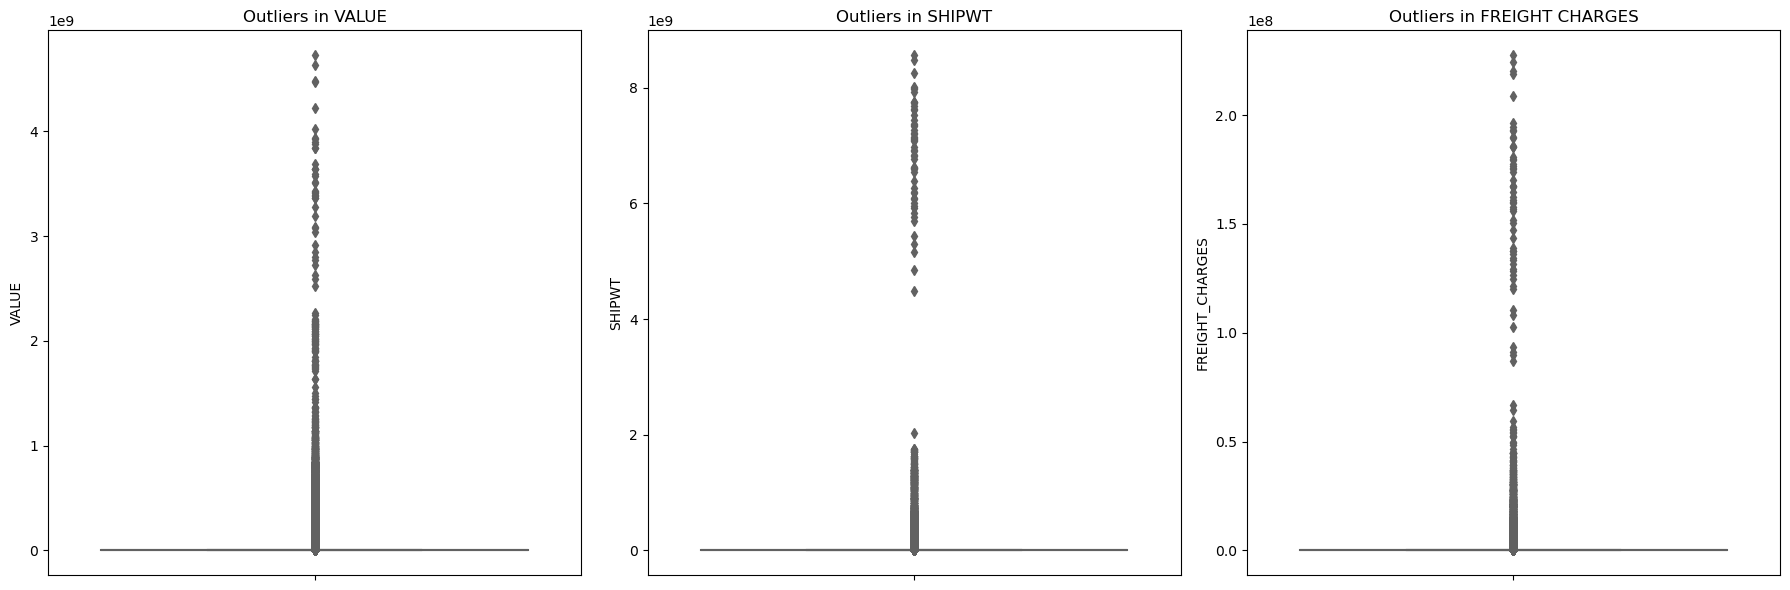

In [160]:
# Create a figure with three subplots for VALUE, SHIPWT, and FREIGHT_CHARGES
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Boxplots for each variable
sns.boxplot(y=combined_dot1["VALUE"], ax=axes[0], palette="Blues_r")
axes[0].set_title("Outliers in VALUE")

sns.boxplot(y=combined_dot1["SHIPWT"], ax=axes[1], palette="Blues_r")
axes[1].set_title("Outliers in SHIPWT")

sns.boxplot(y=combined_dot1["FREIGHT_CHARGES"], ax=axes[2], palette="Blues_r")
axes[2].set_title("Outliers in FREIGHT CHARGES")

plt.tight_layout()
plt.show()


#### 4.3.2 Categorical

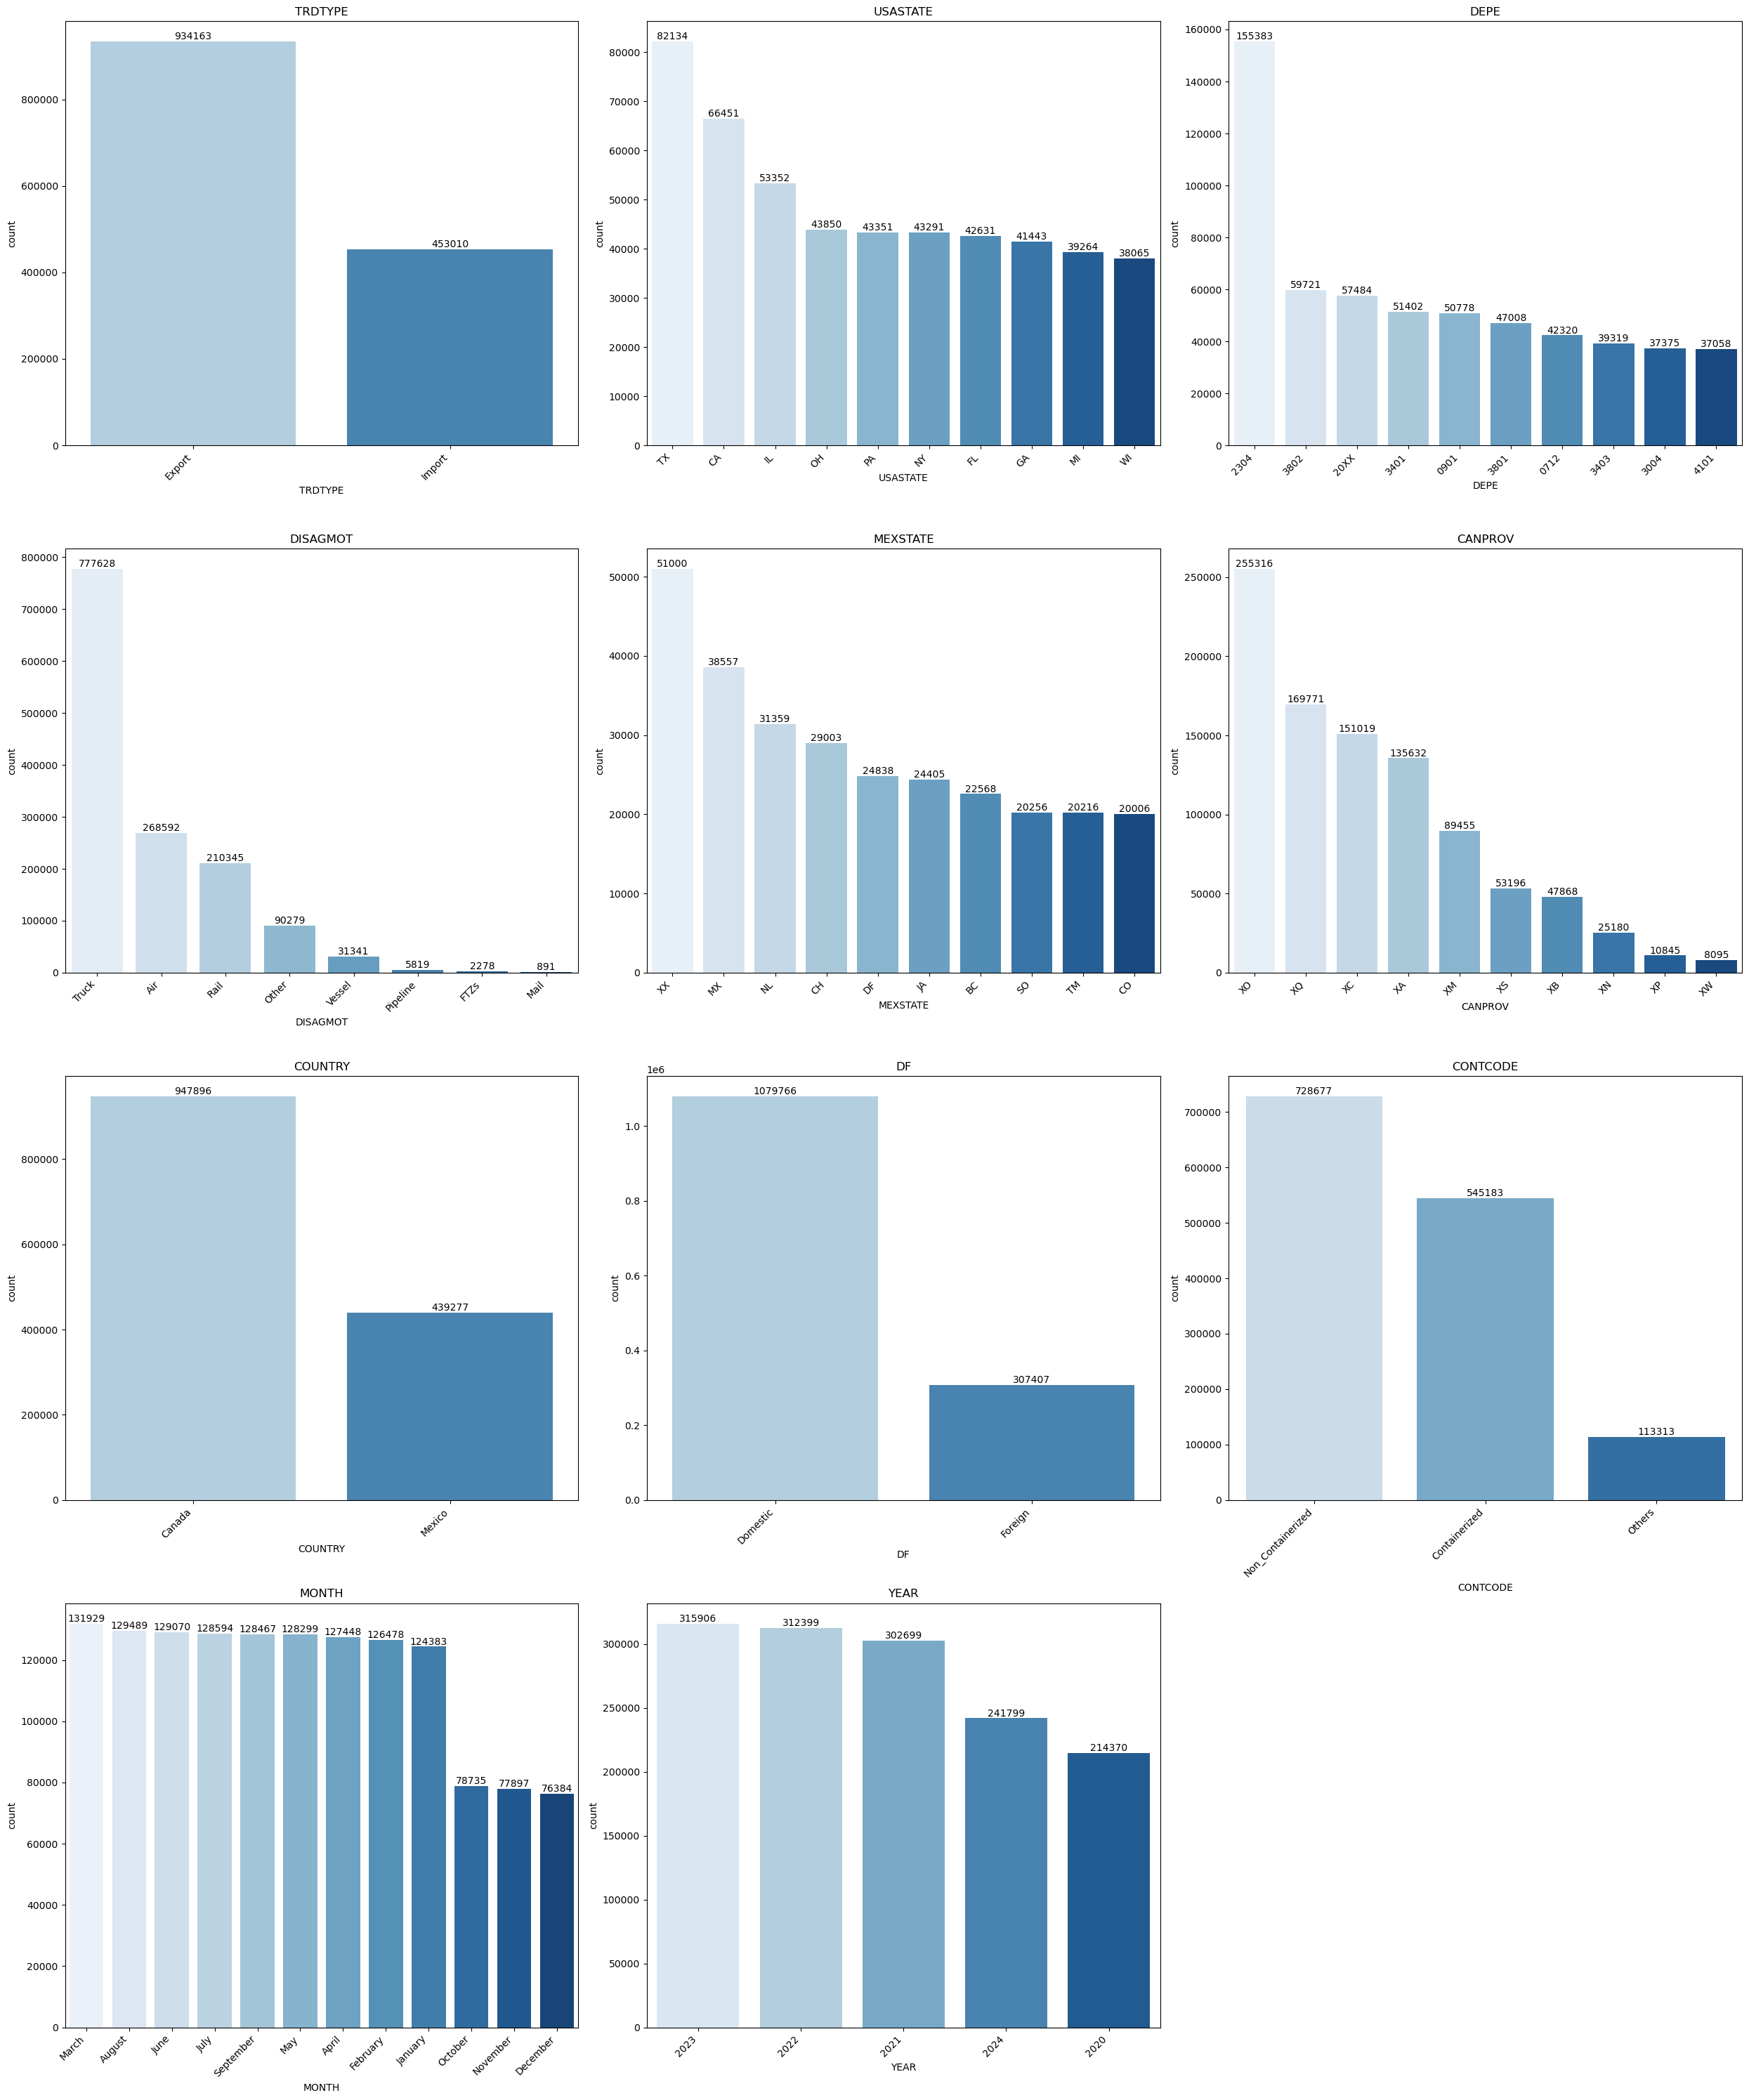

In [72]:
# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25, 30))

# Define a function to add count labels to the bars
def add_count_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')

# Plot 'TRDTYPE'
sns.countplot(x="TRDTYPE", data=combined_dot1, palette='Blues_r', ax=axes[0, 0], order=combined_dot1['TRDTYPE'].value_counts().index)
axes[0, 0].set_title('TRDTYPE')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')
add_count_labels(axes[0, 0])

# Plot 'USASTATE' (Top 10)
top_usa_states = combined_dot1['USASTATE'].value_counts().nlargest(10).index
sns.countplot(x="USASTATE", data=combined_dot1, palette='Blues_r', ax=axes[0, 1], order=top_usa_states)
axes[0, 1].set_title('USASTATE')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')
add_count_labels(axes[0, 1])

# Plot 'DEPE' (Top 10)
top_depe = combined_dot1['DEPE'].value_counts().nlargest(10).index
sns.countplot(x="DEPE", data=combined_dot1, palette='Blues_r', ax=axes[0, 2], order=top_depe)
axes[0, 2].set_title('DEPE')
axes[0, 2].set_xticklabels(axes[0, 2].get_xticklabels(), rotation=45, ha='right')
add_count_labels(axes[0, 2])

# Plot 'DISAGMOT'
sns.countplot(x="DISAGMOT", data=combined_dot1, palette='Blues_r', ax=axes[1, 0], order=combined_dot1['DISAGMOT'].value_counts().index)
axes[1, 0].set_title('DISAGMOT')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')
add_count_labels(axes[1, 0])

# Plot 'MEXSTATE'
top_mexstate = combined_dot1['MEXSTATE'].value_counts().nlargest(10).index
sns.countplot(x="MEXSTATE", data=combined_dot1, palette='Blues_r', ax=axes[1, 1], order=top_mexstate)
axes[1, 1].set_title('MEXSTATE')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')
add_count_labels(axes[1, 1])

# Plot 'CANPROV' (Top 10)
top_canprov = combined_dot1['CANPROV'].value_counts().nlargest(10).index
sns.countplot(x="CANPROV", data=combined_dot1, palette='Blues_r', ax=axes[1, 2], order=top_canprov)
axes[1, 2].set_title('CANPROV')
axes[1, 2].set_xticklabels(axes[1, 2].get_xticklabels(), rotation=45, ha='right')
add_count_labels(axes[1, 2])

# Plot 'COUNTRY'
sns.countplot(x="COUNTRY", data=combined_dot1, palette='Blues_r', ax=axes[2, 0], order=combined_dot1['COUNTRY'].value_counts().index)
axes[2, 0].set_title("COUNTRY")
axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=45, ha='right')
add_count_labels(axes[2, 0])

# Plot 'DF'
sns.countplot(x="DF", data=combined_dot1, palette='Blues_r', ax=axes[2, 1], order=combined_dot1['DF'].value_counts().index)
axes[2, 1].set_title("DF")
axes[2, 1].set_xticklabels(axes[2, 1].get_xticklabels(), rotation=45, ha='right')
add_count_labels(axes[2, 1])

# Plot 'CONTCODE'
sns.countplot(x="CONTCODE", data=combined_dot1, palette='Blues_r', ax=axes[2, 2], order=combined_dot1['CONTCODE'].value_counts().index)
axes[2, 2].set_title("CONTCODE")
axes[2, 2].set_xticklabels(axes[2, 2].get_xticklabels(), rotation=45, ha='right')
add_count_labels(axes[2, 2])

# Plot 'MONTH'
sns.countplot(x="MONTH", data=combined_dot1, palette='Blues_r', ax=axes[3, 0], order=combined_dot1['MONTH'].value_counts().index)
axes[3, 0].set_title("MONTH")
axes[3, 0].set_xticklabels(axes[3, 0].get_xticklabels(), rotation=45, ha='right')
add_count_labels(axes[3, 0])

# Plot 'YEAR'
sns.countplot(x="YEAR", data=combined_dot1, palette='Blues_r', ax=axes[3, 1], order=combined_dot1['YEAR'].value_counts().index)
axes[3, 1].set_title("YEAR")
axes[3, 1].set_xticklabels(axes[3, 1].get_xticklabels(), rotation=45, ha='right')
add_count_labels(axes[3, 1])

# Turn off unnecessary axes
axes[3, 2].axis('off')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


### 4.4 Bivariate Analysis

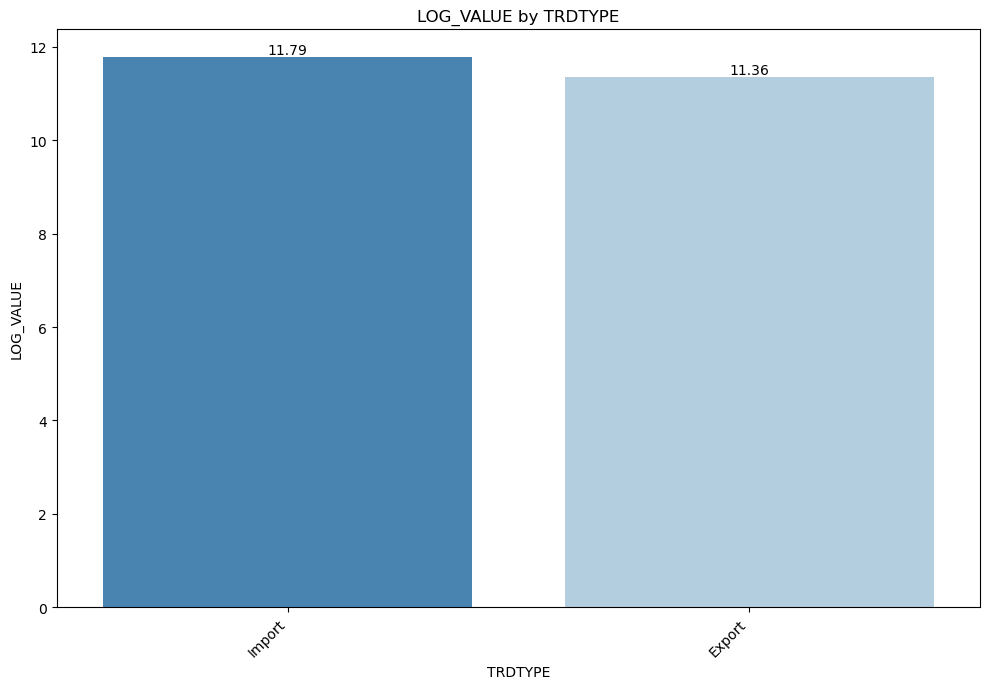

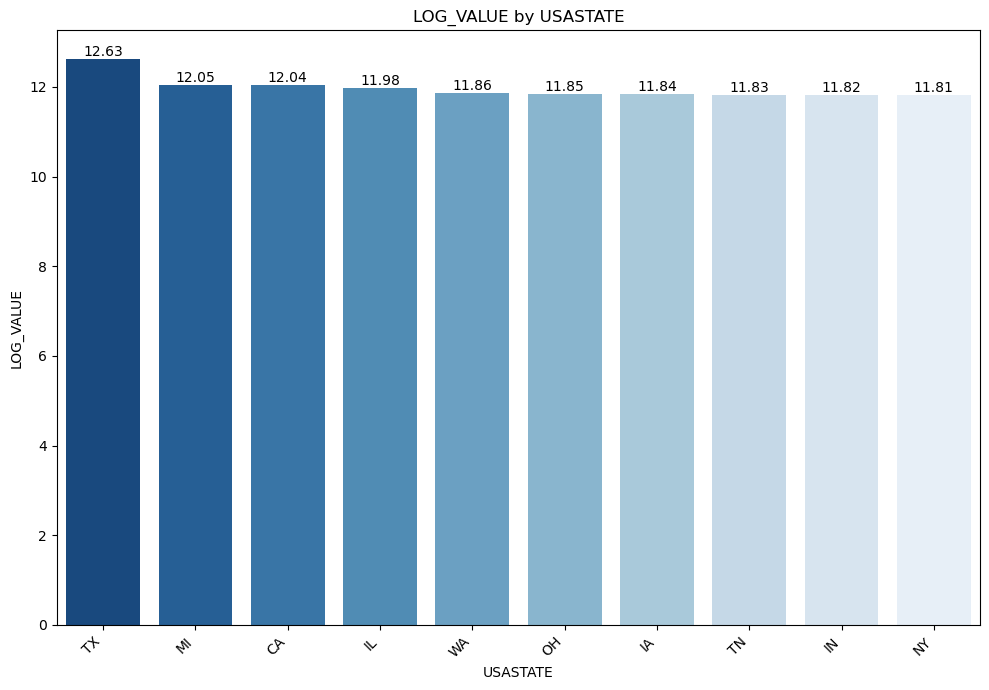

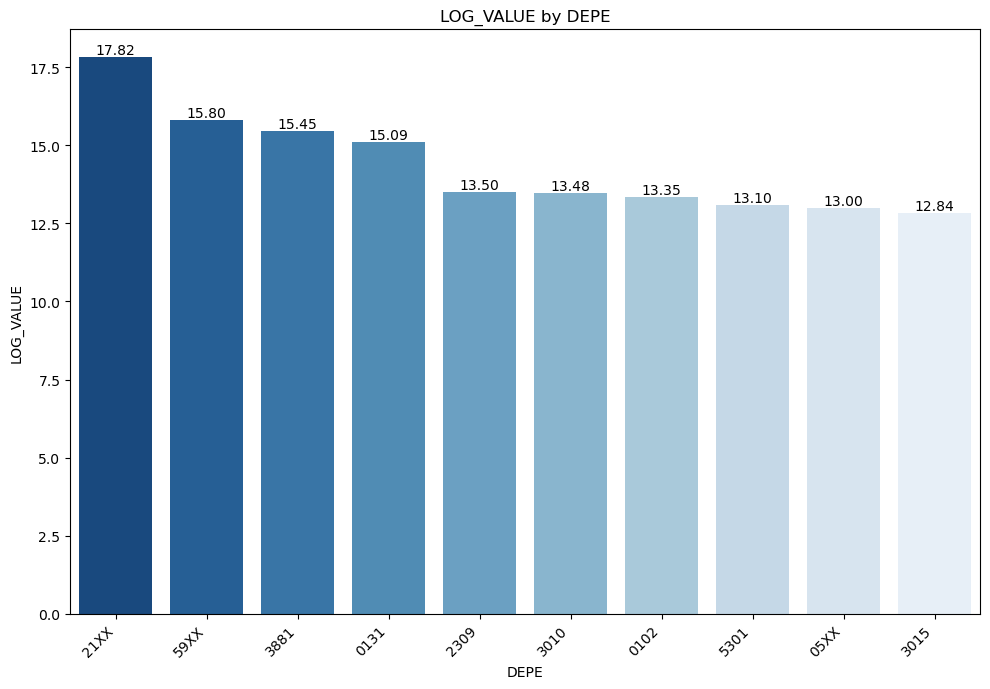

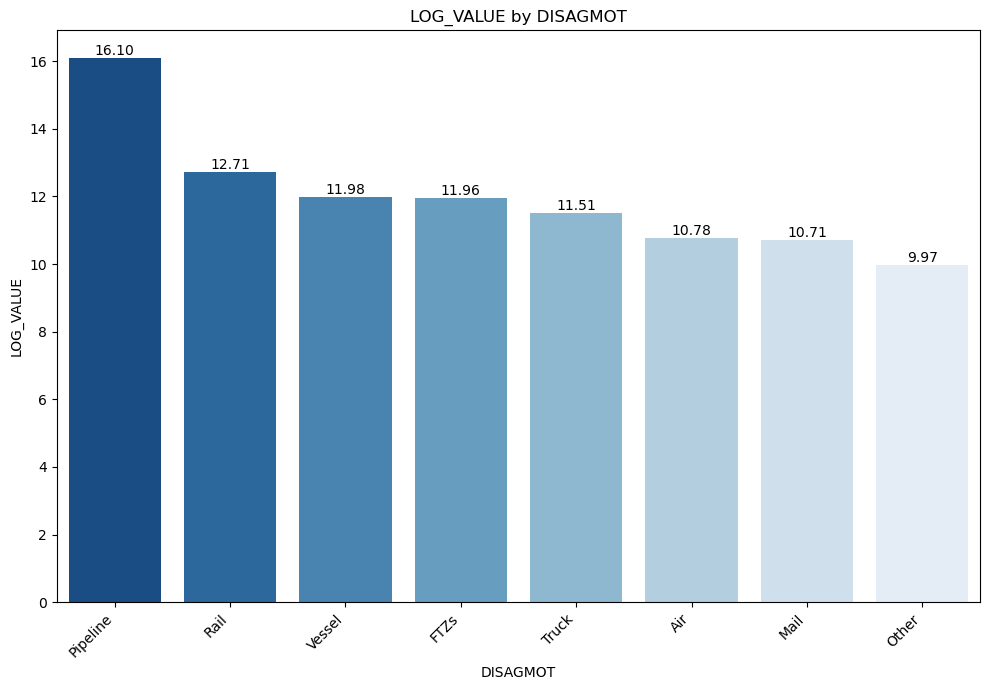

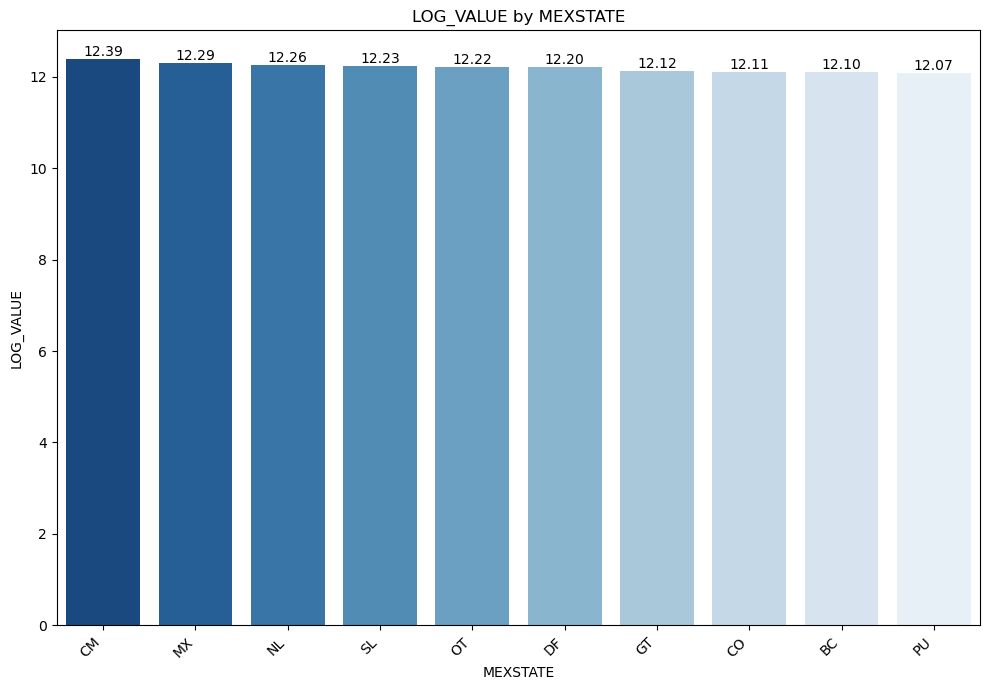

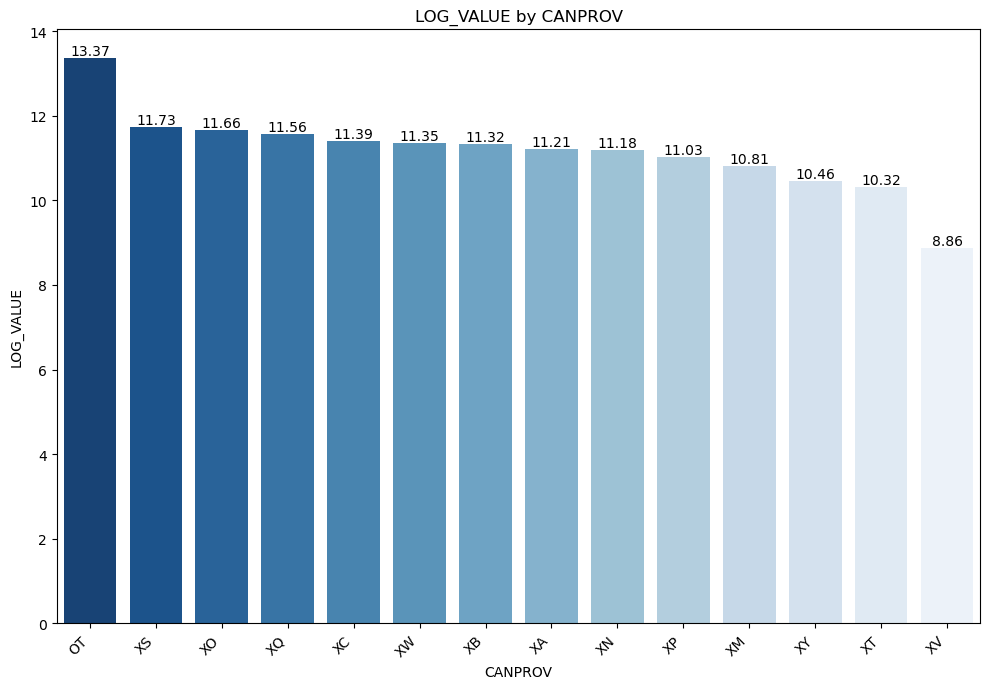

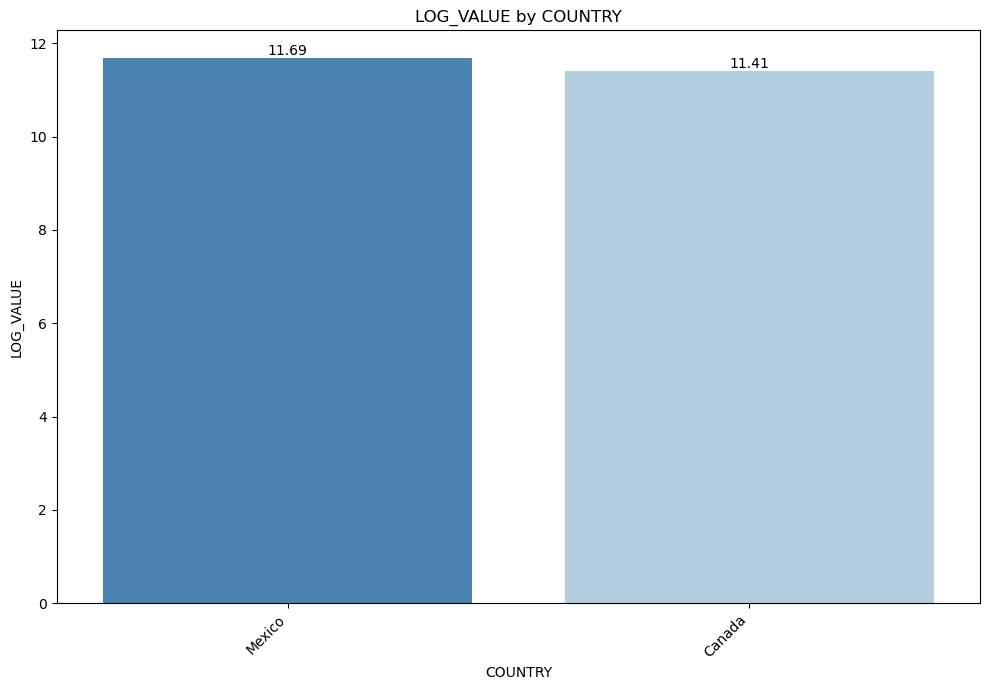

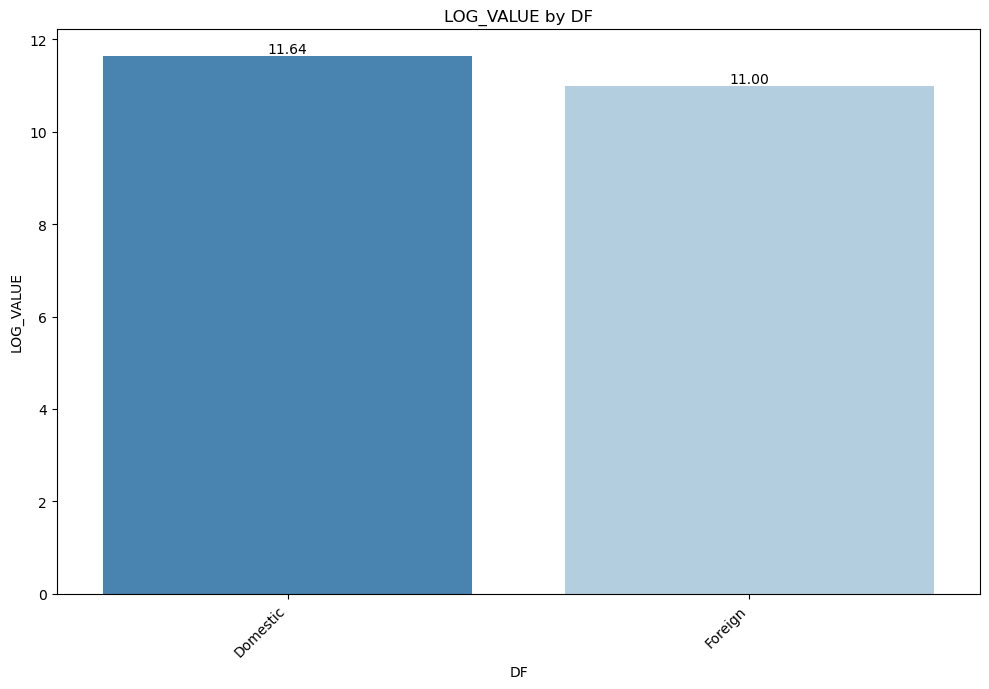

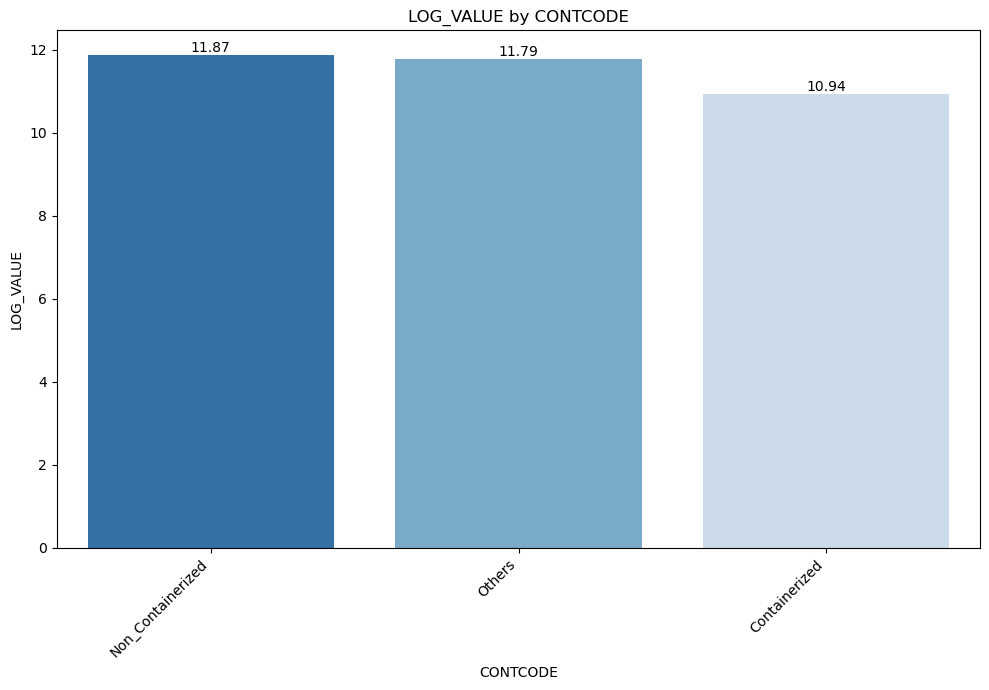

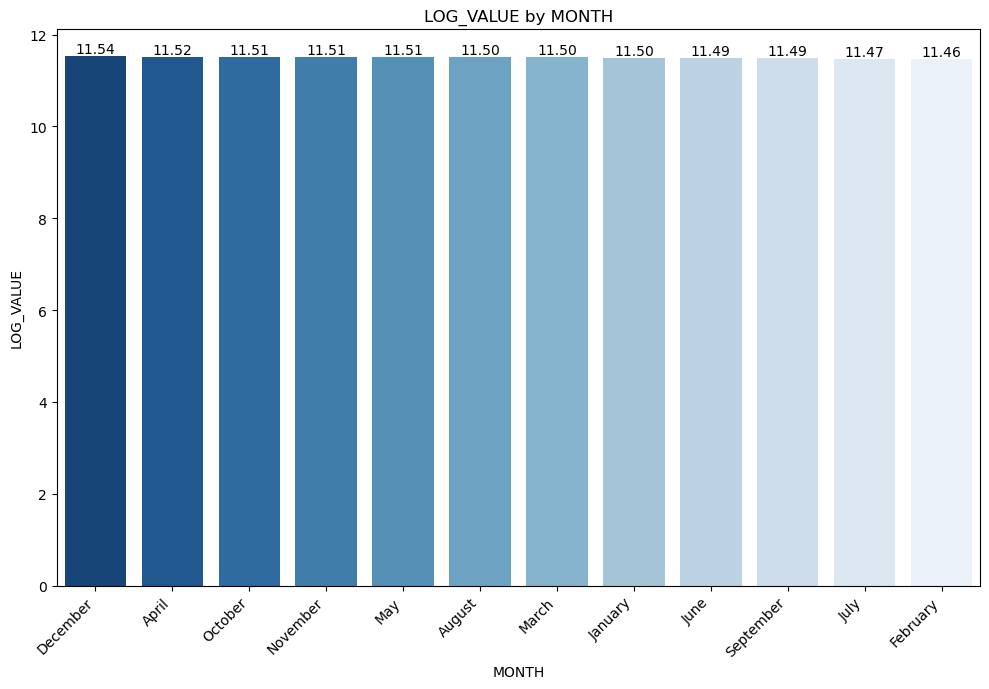

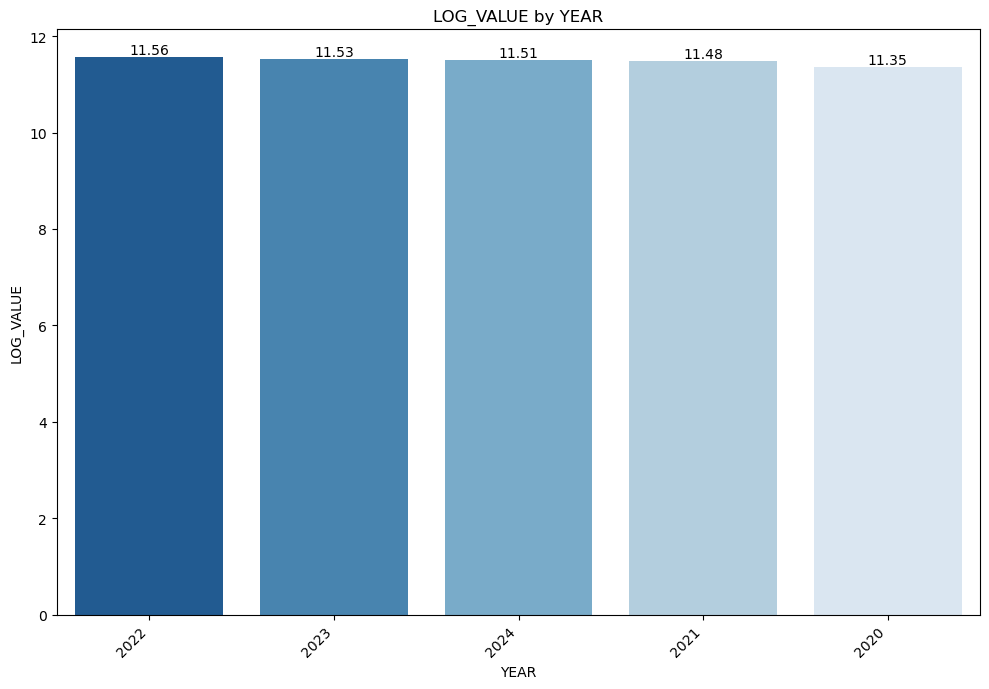

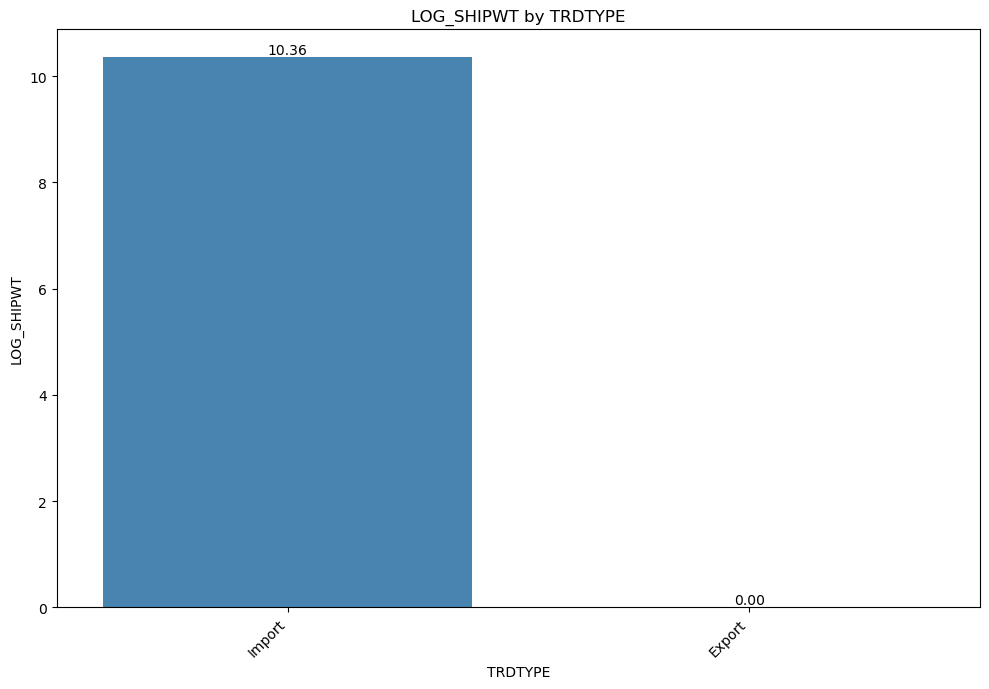

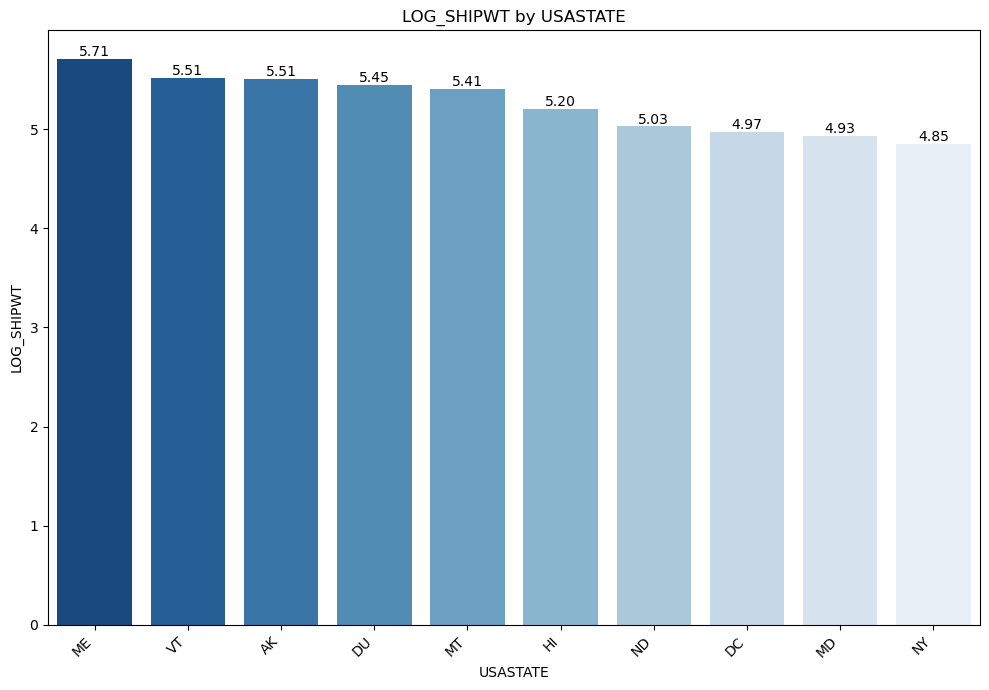

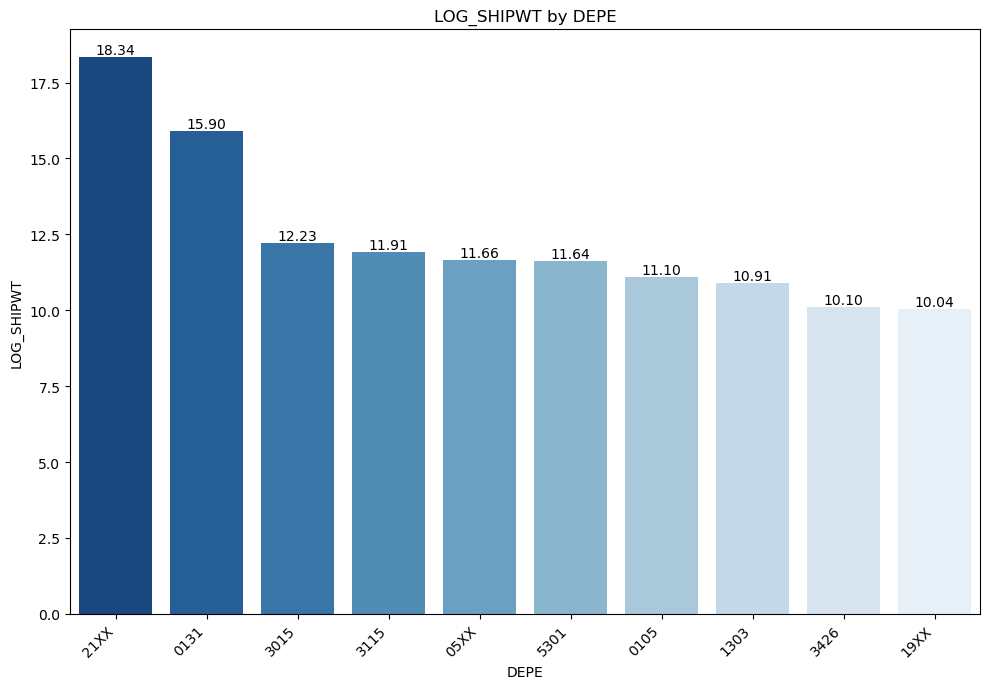

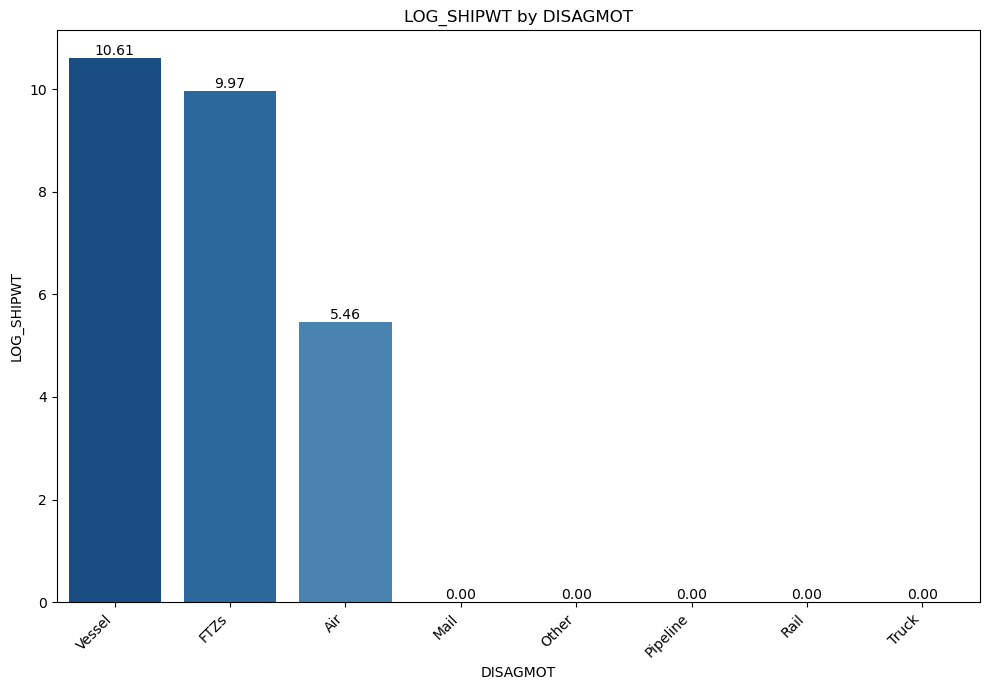

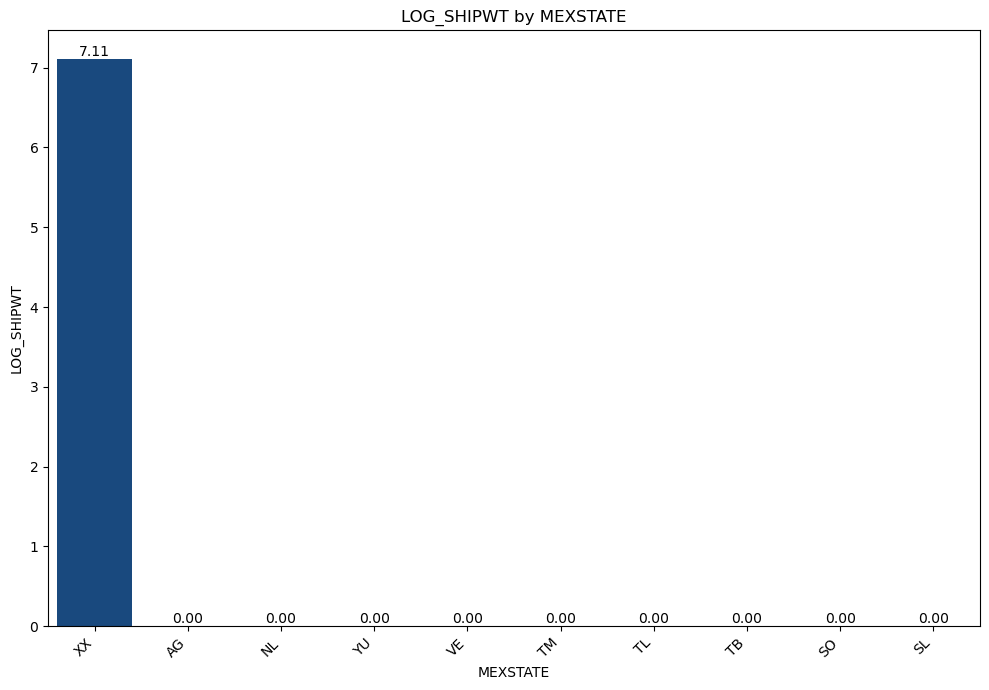

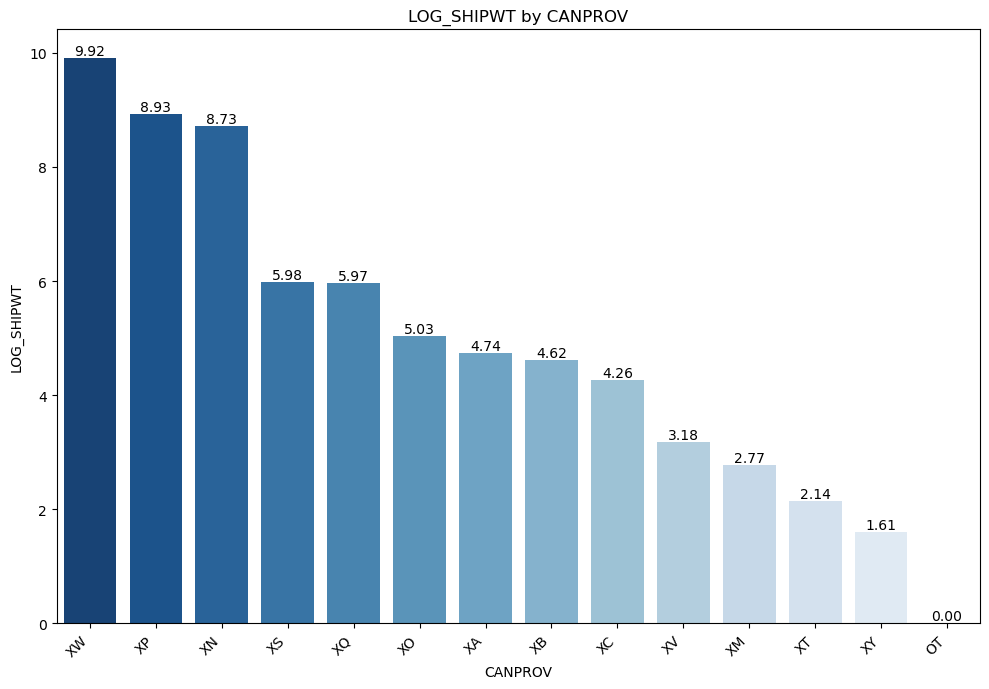

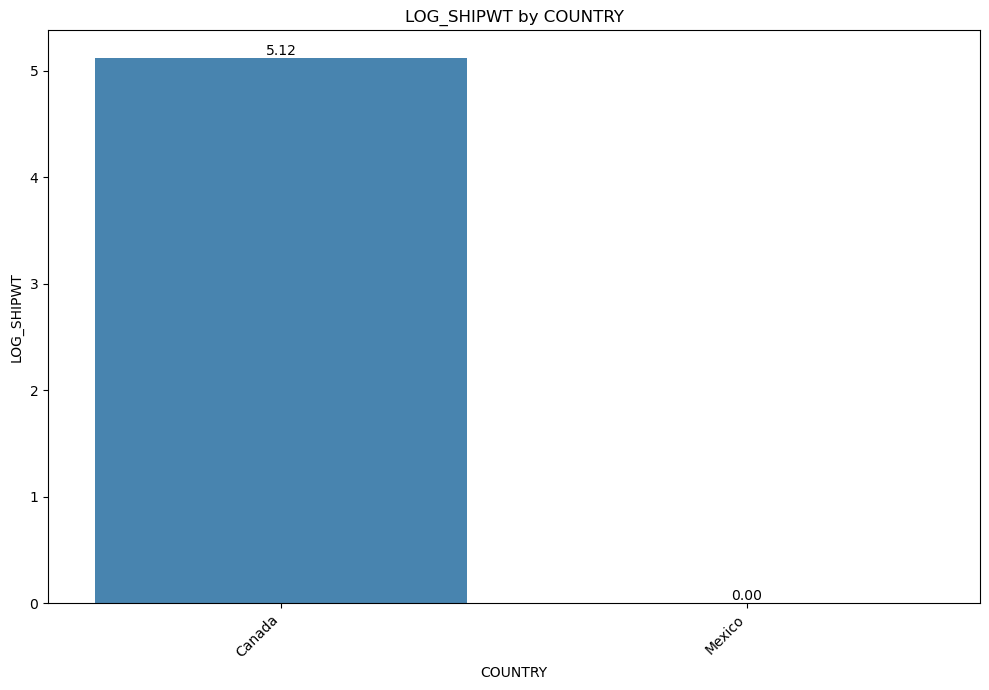

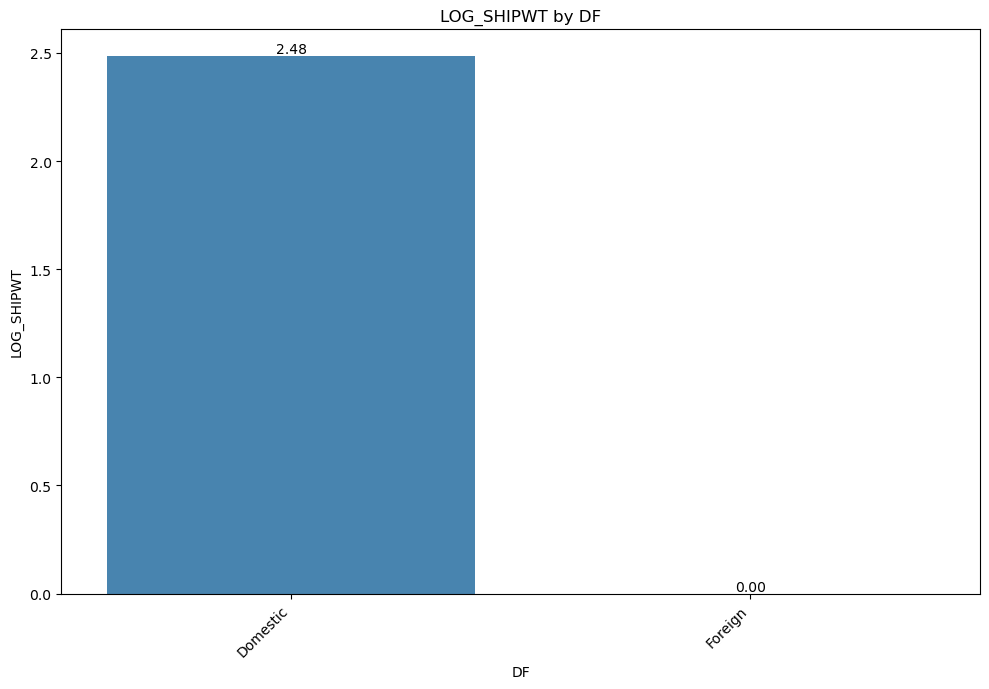

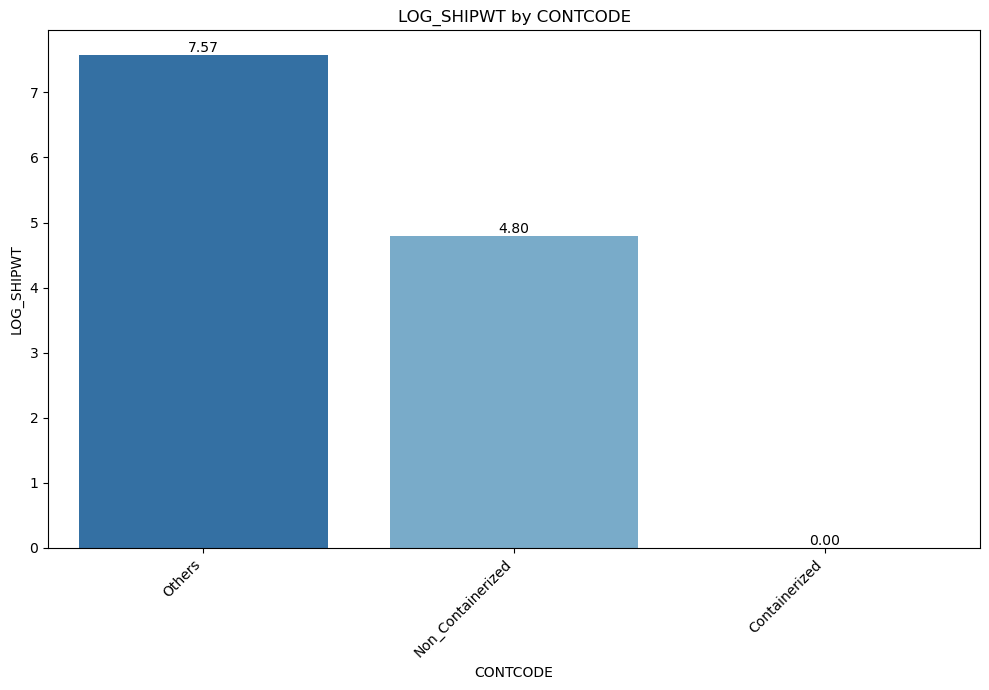

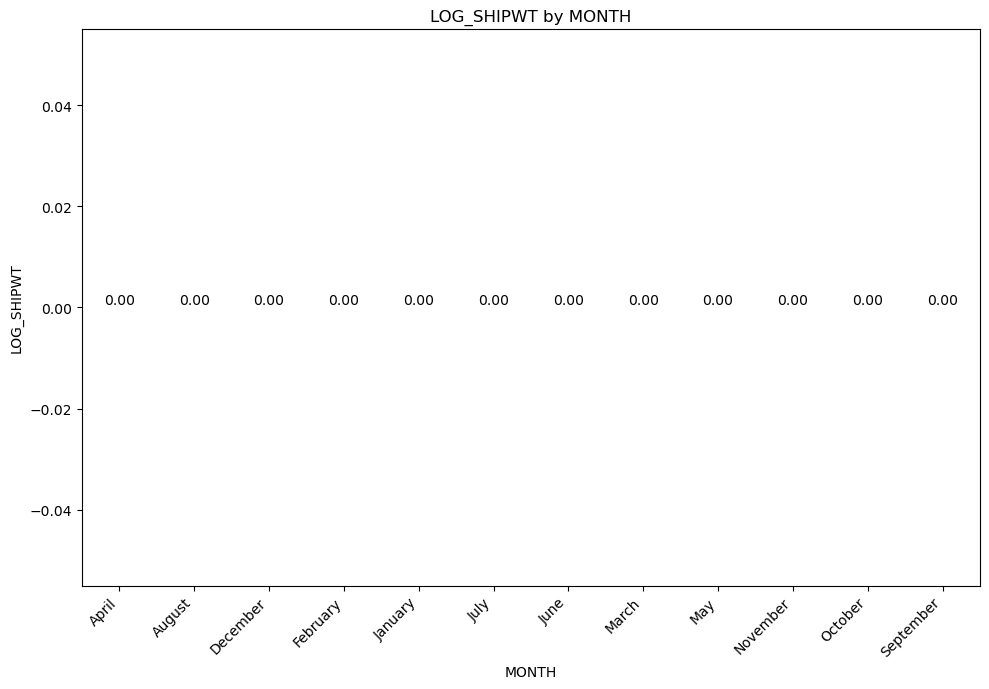

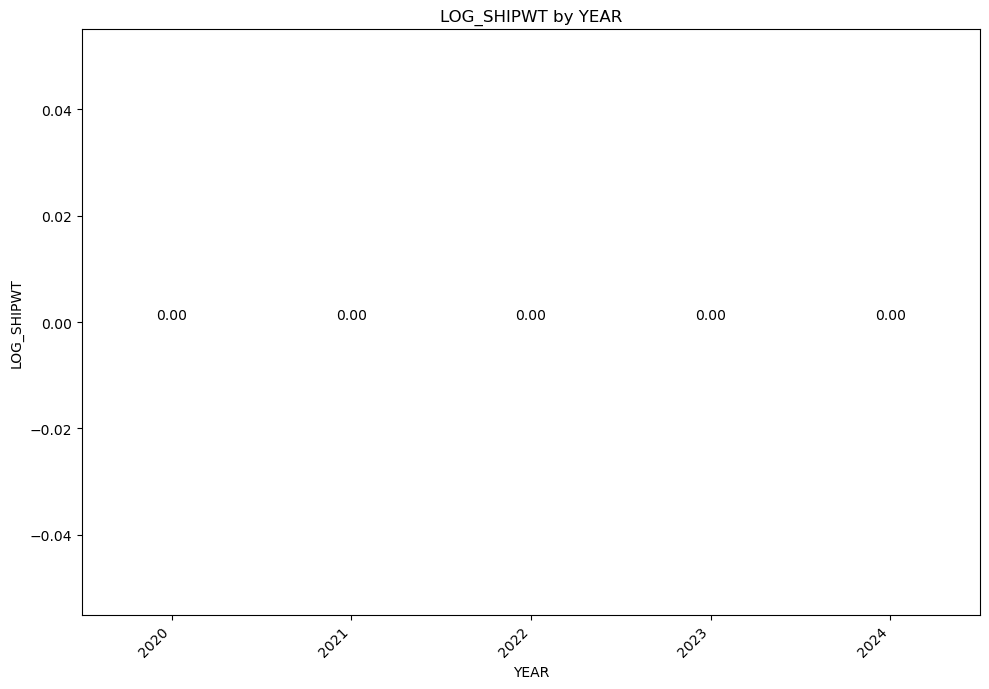

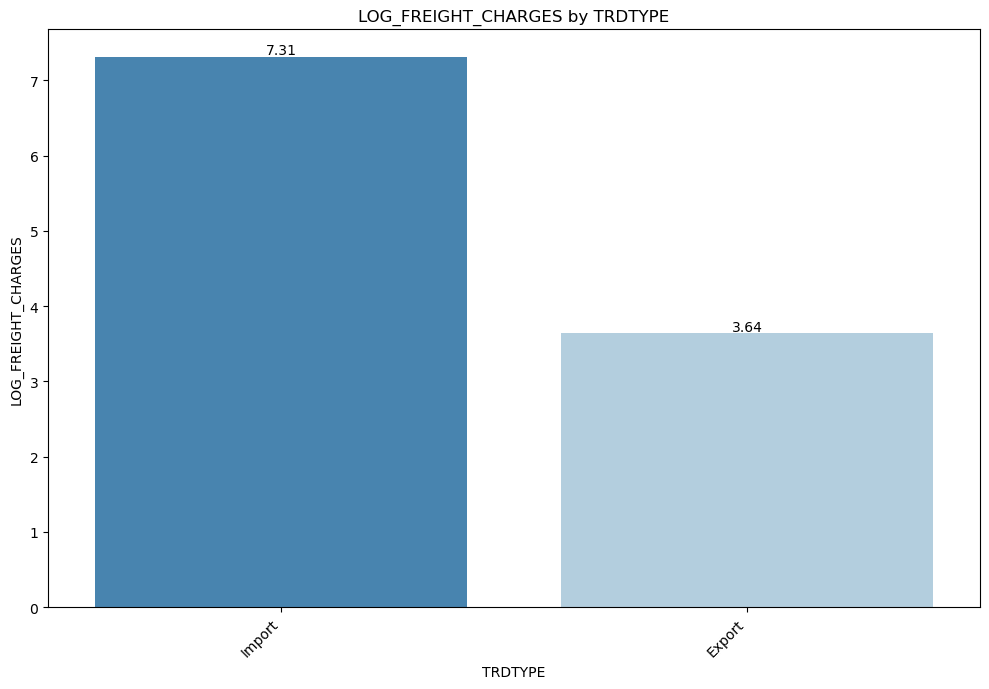

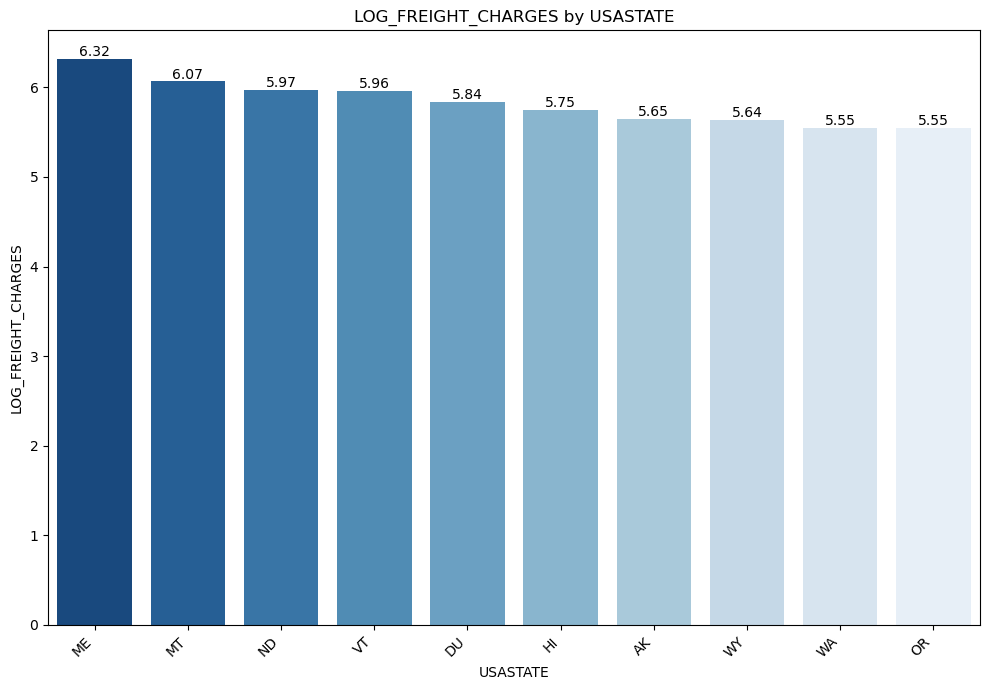

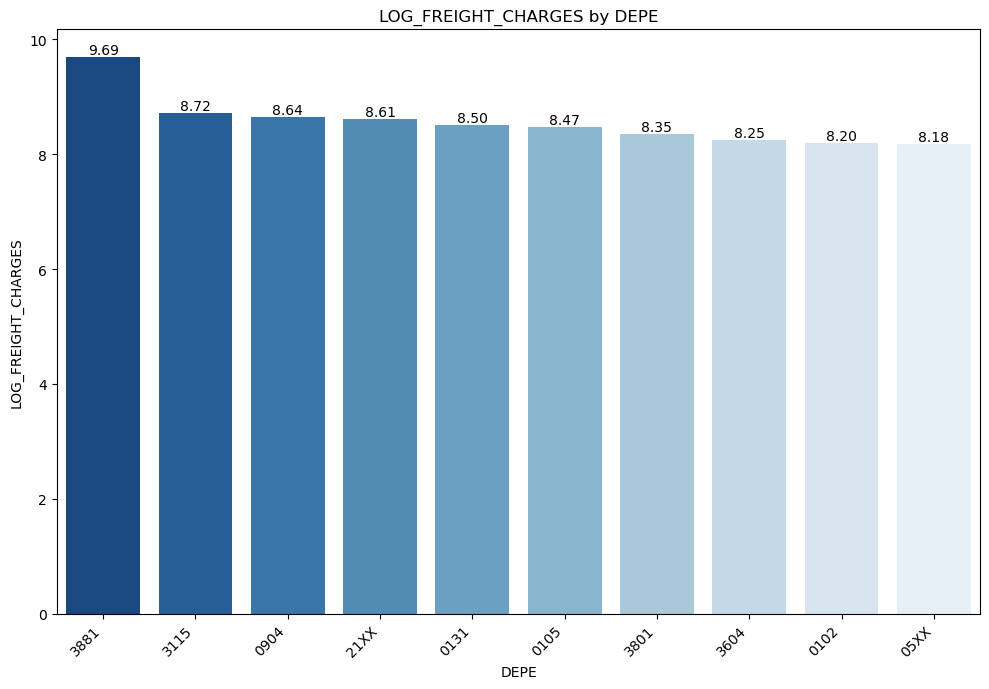

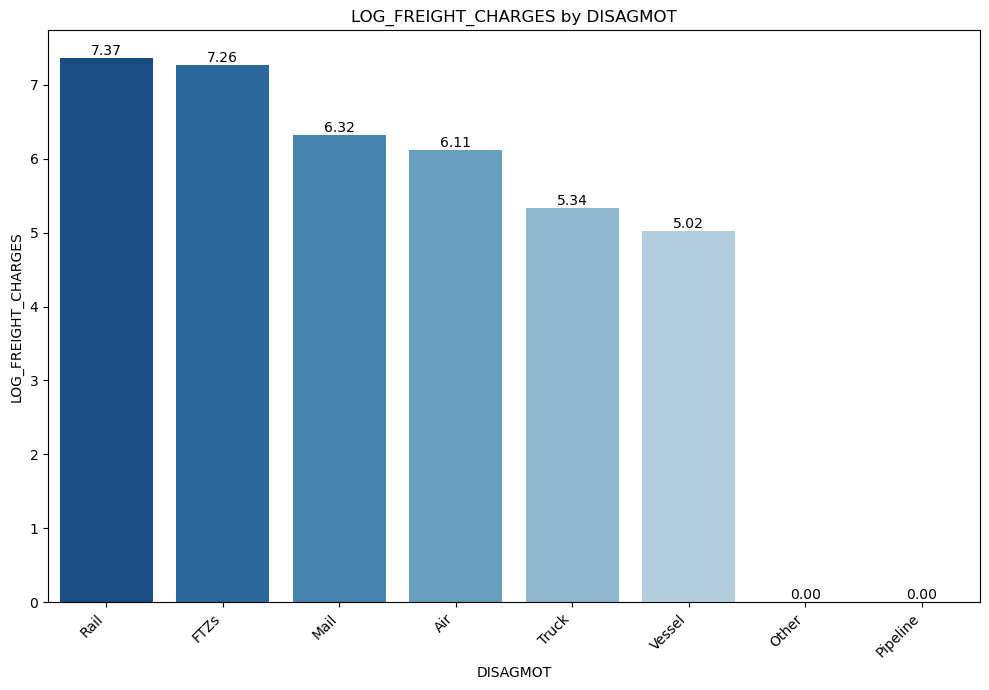

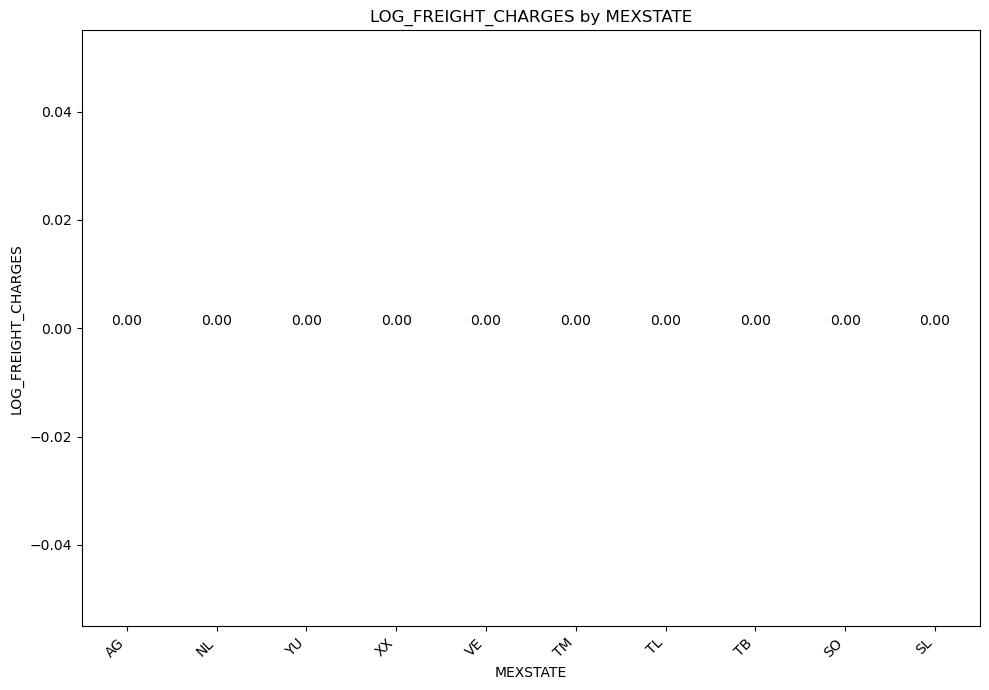

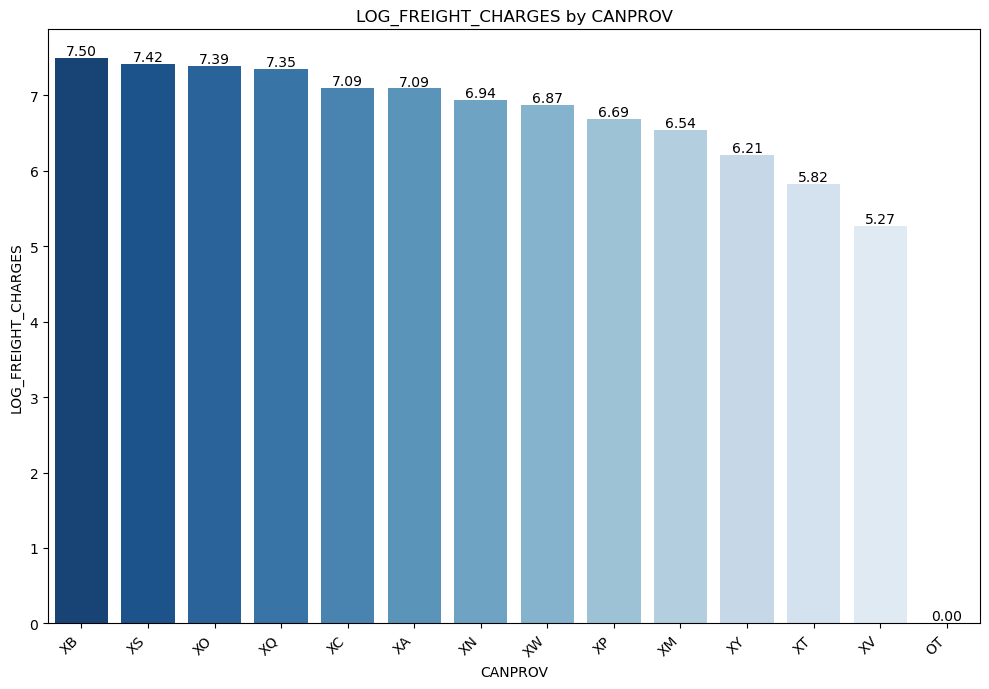

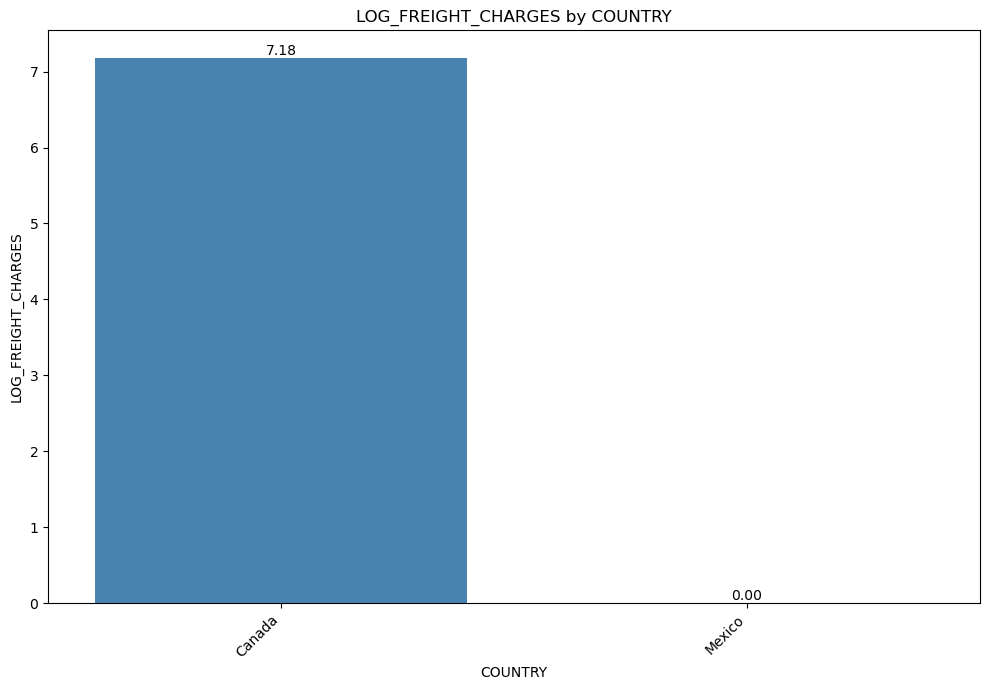

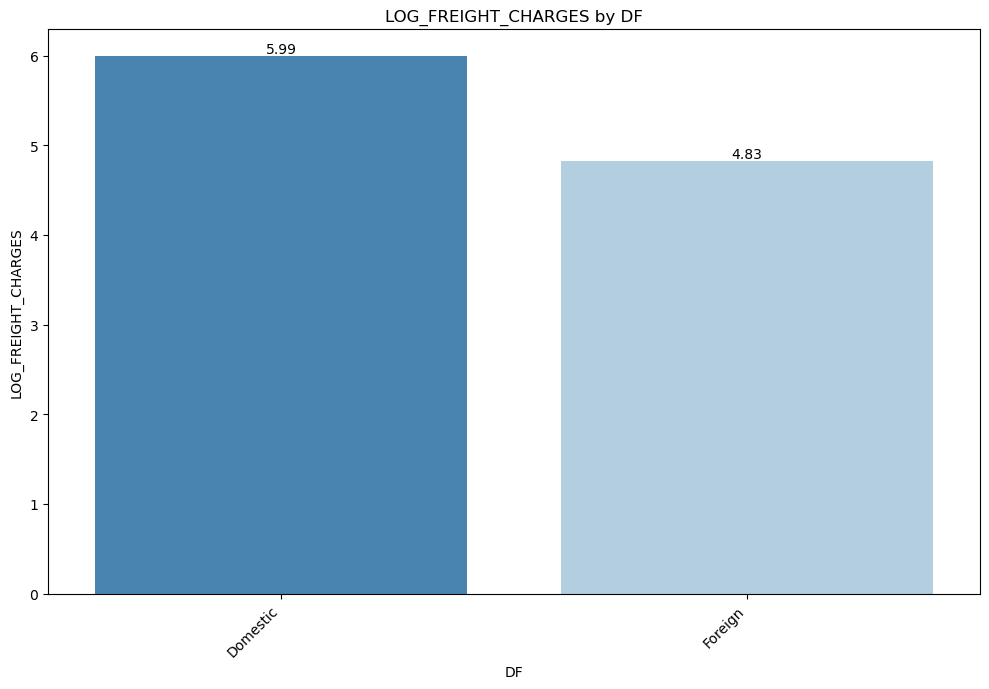

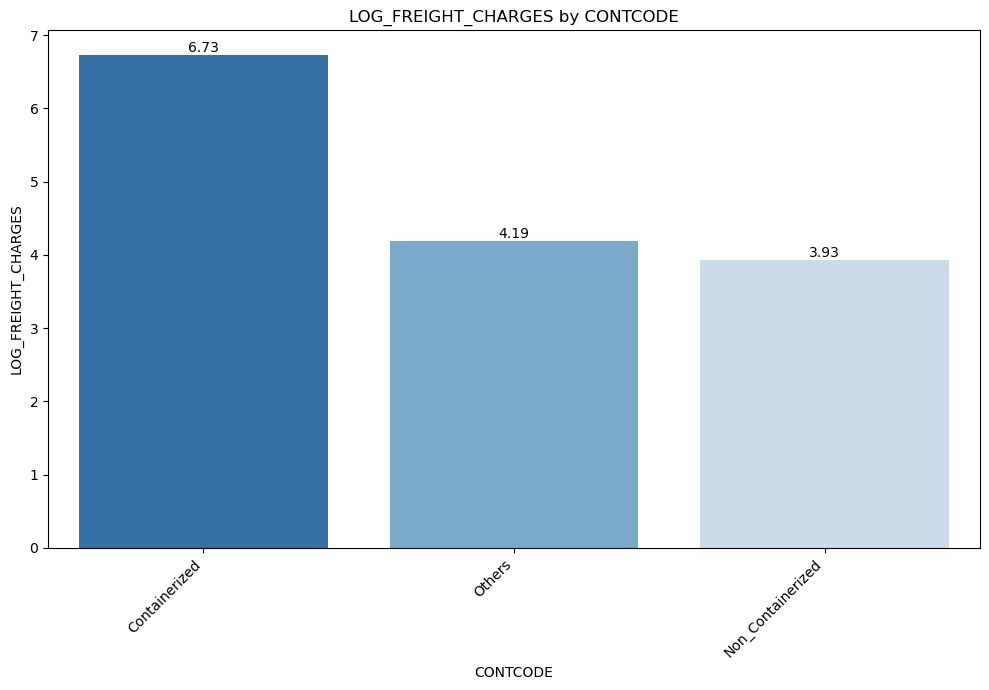

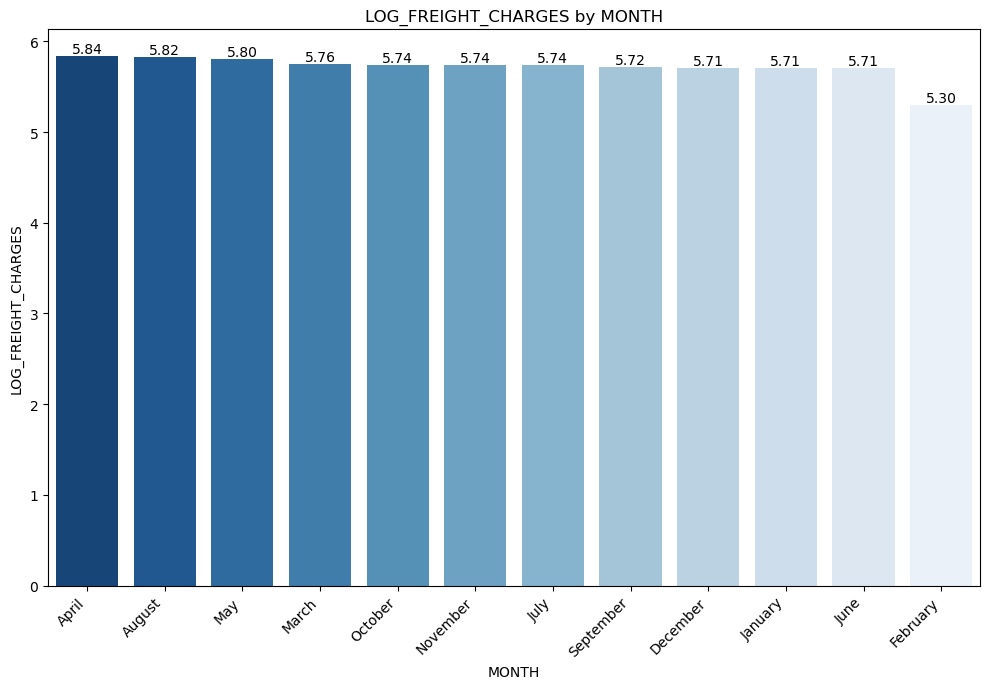

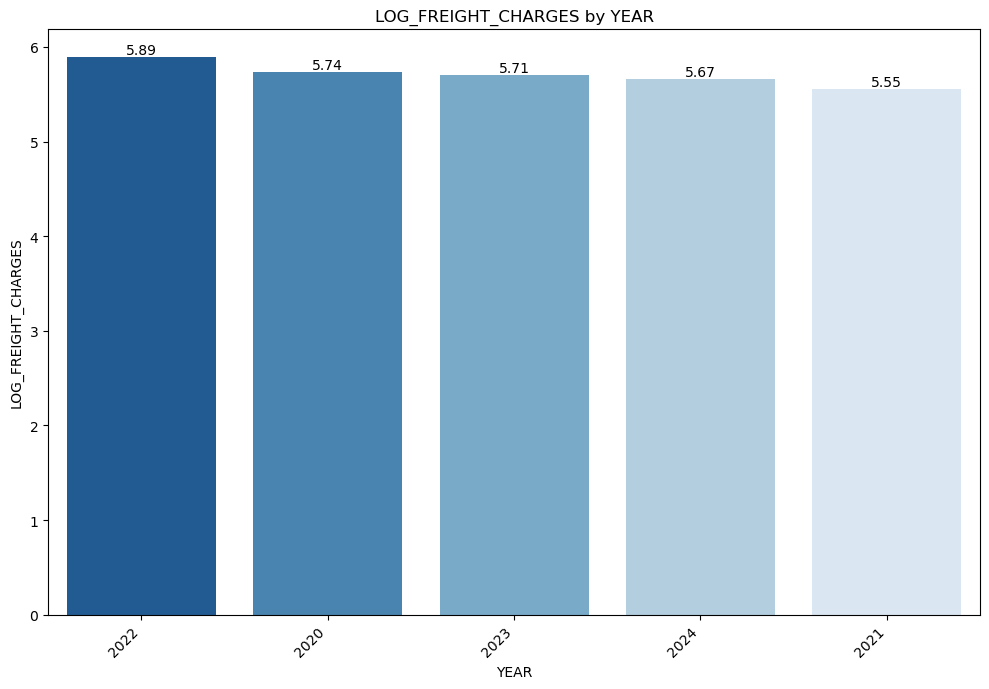

In [161]:
# Subsampling the data
sampled_df = combined_dot1.sample(frac=0.3, random_state=42)  # Adjust the fraction as needed

# List of numerical and categorical variables
numerical_vars = ['LOG_VALUE', 'LOG_SHIPWT', 'LOG_FREIGHT_CHARGES']
categorical_vars = ['TRDTYPE', 'USASTATE', 'DEPE', 'DISAGMOT', 'MEXSTATE', 'CANPROV', 'COUNTRY', 'DF', 'CONTCODE', 'MONTH','YEAR']

# Function to add mean labels on top of the bars
def add_median_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center', 
                    fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')

# Function to handle plotting large categorical variables
def plot_bivariate_with_limit(num_var, cat_var, data, top_n=10):
    # Pre-aggregate the data (group by cat_var and calculate the mean of num_var)
    aggregated_data = data.groupby(cat_var)[num_var].mean().reset_index()
    
    # Sort the aggregated data by the mean of the numerical variable in descending order
    sorted_data = aggregated_data.sort_values(by=num_var, ascending=False)
    
    # Limit to top N categories
    top_categories = sorted_data.head(top_n)
    
    # Plot the sorted data
    plt.figure(figsize=(10, 7))
    ax = sns.barplot(x=cat_var, y=num_var, data=top_categories, palette='Blues_r')
    plt.title(f'{num_var} by {cat_var}')
    plt.xticks(rotation=45, ha='right')  
    plt.tight_layout()  
    
    # Add mean labels on top of each bar
    add_median_labels(ax)
    
    # Show the plot
    plt.show()

# Loop through the variables
for num_var in numerical_vars:
    for cat_var in categorical_vars:
        # For DEPE and USASTATE, limit the categories to the top 10
        if cat_var in ['DEPE', 'USASTATE','MEXSTATE']:
            plot_bivariate_with_limit(num_var, cat_var, sampled_df, top_n=10)
        else:
            # For the rest of the categorical variables, plot all categories
            plt.figure(figsize=(10, 7))
            aggregated_data = sampled_df.groupby(cat_var)[num_var].median().reset_index()
            sorted_data = aggregated_data.sort_values(by=num_var, ascending=False)
            ax = sns.barplot(x=cat_var, y=num_var, data=sorted_data, palette='Blues_r')
            plt.title(f'{num_var} by {cat_var}')
            plt.xticks(rotation=45, ha='right')  
            plt.tight_layout()  
            
            # Add mean labels on top of each bar
            add_median_labels(ax)
            
            # Show the plot
            plt.show()


### 4.5 Multivariate Analysis

In [74]:
"""# Subsample the data (using 10% of the data for faster plotting)
sampled_data = combined_dot1[['VALUE', 'SHIPWT', 'FREIGHT_CHARGES']].sample(frac=0.3, random_state=42)

# Create the pairplot
sns.pairplot(sampled_data)
plt.suptitle('Pairplot of Numerical Variables', y=1.02)  # Adjust title position
plt.tight_layout()  # Ensure the plot does not overlap
plt.show()"""

"# Subsample the data (using 10% of the data for faster plotting)\nsampled_data = combined_dot1[['VALUE', 'SHIPWT', 'FREIGHT_CHARGES']].sample(frac=0.3, random_state=42)\n\n# Create the pairplot\nsns.pairplot(sampled_data)\nplt.suptitle('Pairplot of Numerical Variables', y=1.02)  # Adjust title position\nplt.tight_layout()  # Ensure the plot does not overlap\nplt.show()"

### 5. Hypothesis
Hypothetical Questions:

### 1. If the VALUE column represents the total value of goods shipped, does the value correlate with shipment weight (SHIPWT)?
Null Hypothesis (H₀): There is no significant correlation between VALUE and SHIPWT (i.e., the correlation coefficient is zero).

H₀:ρ = 0
Where 

ρ is the population correlation coefficient.

Alternative Hypothesis (H₁): There is a significant correlation between VALUE and SHIPWT (i.e., the correlation coefficient is not zero).

H₁:ρ != 0


In [75]:
# Calculate Pearson correlation coefficient and the p-value
corr_coefficient, p_value = stats.pearsonr(combined_dot1['LOG_VALUE'], combined_dot1['LOG_SHIPWT'])

# Significance level (alpha)
alpha = 0.05

# Print the results
print(f"Pearson correlation coefficient: {corr_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

# Hypothesis testing decision
if p_value <= alpha:
    print("Reject the null hypothesis: There is a significant correlation between VALUE and SHIPWT.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between VALUE and SHIPWT.")


Pearson correlation coefficient: 0.2685
P-value: 0.0000
Reject the null hypothesis: There is a significant correlation between VALUE and SHIPWT.


In [76]:
# Calculate the correlation coefficient between VALUE and SHIPWT
correlation_value_shipwt = combined_dot1[['LOG_VALUE', 'LOG_SHIPWT']].corr().iloc[0, 1]

# Print the correlation coefficient
print(f"The correlation coefficient between VALUE and SHIPWT is: {correlation_value_shipwt:.2f}")

The correlation coefficient between VALUE and SHIPWT is: 0.27


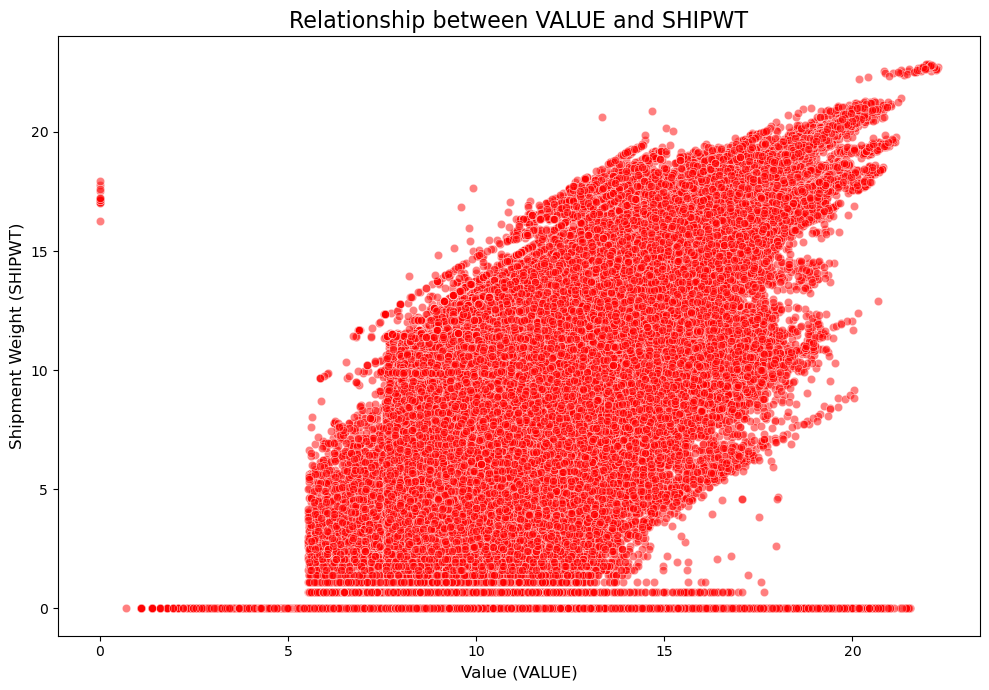

In [77]:
# Create a scatter plot to visualize the relationship between VALUE and SHIPWT
plt.figure(figsize=(10, 7))
sns.scatterplot(x='LOG_VALUE', y='LOG_SHIPWT', data=combined_dot1, color='red', alpha=0.5)

# Adding title and labels
plt.title('Relationship between VALUE and SHIPWT', fontsize=16)
plt.xlabel('Value (VALUE)', fontsize=12)
plt.ylabel('Shipment Weight (SHIPWT)', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

### 2. Do larger shipments (in terms of weight) tend to have higher freight charges?
The correlation coefficient (typically Pearson's correlation) measures the strength and direction of the linear relationship between two variables. The value ranges from -1 (perfect negative correlation) to 1 (perfect positive correlation). A value of 0 indicates no linear relationship.

Null Hypothesis (H₀): Larger shipments do not tend to have higher freight charges.


Alternative Hypothesis (H₁):  Larger shipments do tend to have higher freight charges.

In [78]:
# Calculate Pearson correlation coefficient and the p-value
corr_coefficient, p_value = stats.pearsonr(combined_dot1['LOG_SHIPWT'], combined_dot1['LOG_FREIGHT_CHARGES'])

# Significance level (alpha)
alpha = 0.05

# Print the results
print(f"Pearson correlation coefficient: {corr_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

# Hypothesis testing decision
if p_value <= alpha:
    print("Reject the null hypothesis: Larger shipments tend to have higher freight charges.")
else:
    print("Fail to reject the null hypothesis: Larger shipments do not tend to have higher freight charges..")


Pearson correlation coefficient: 0.4975
P-value: 0.0000
Reject the null hypothesis: Larger shipments tend to have higher freight charges.


In [79]:
# Calculate the correlation coefficient between SHIPWT and FREIGHT_CHARGES
correlation = combined_dot1[['LOG_SHIPWT', 'LOG_FREIGHT_CHARGES']].corr().iloc[0, 1]

# Print the correlation coefficient
print(f"The correlation coefficient between SHIPWT and FREIGHT_CHARGES is: {correlation:.2f}")

The correlation coefficient between SHIPWT and FREIGHT_CHARGES is: 0.50


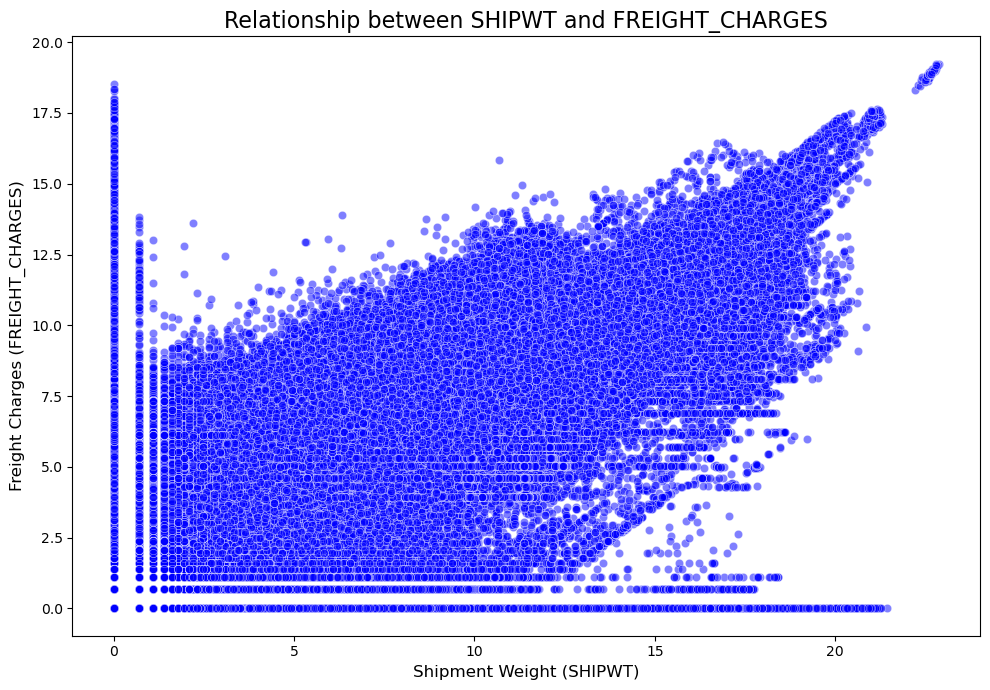

In [80]:
# Create a scatter plot to visualize the relationship between SHIPWT and FREIGHT_CHARGES
plt.figure(figsize=(10, 7))
sns.scatterplot(x='LOG_SHIPWT', y='LOG_FREIGHT_CHARGES', data=combined_dot1, color='blue', alpha=0.5)

# Adding title and labels
plt.title('Relationship between SHIPWT and FREIGHT_CHARGES', fontsize=16)
plt.xlabel('Shipment Weight (SHIPWT)', fontsize=12)
plt.ylabel('Freight Charges (FREIGHT_CHARGES)', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

### 3. Is there a specific month where shipment values peak across different countries?

Null Hypothesis (H₀): There is no significant difference in shipment values across different months for different countries.

Alternative Hypothesis (H₁): Shipment values peak significantly in a specific month for at least one country.

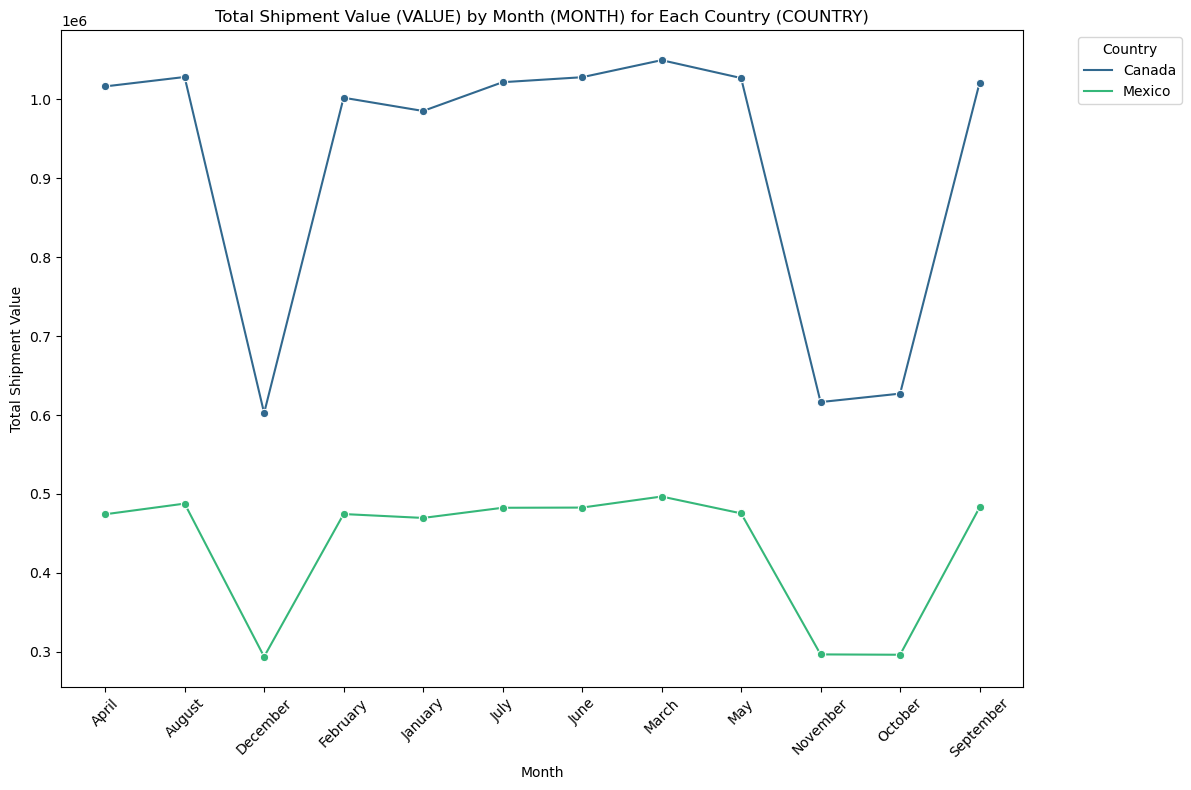

In [81]:
# Group the data by 'COUNTRY' and 'MONTH' and aggregate the total 'VALUE'
country_month_value = combined_dot1.groupby(['COUNTRY', 'MONTH'])['LOG_VALUE'].sum().reset_index()

# Create the plot
plt.figure(figsize=(12, 8))
sns.lineplot(x="MONTH", y="LOG_VALUE", hue="COUNTRY", data=country_month_value,  marker="o", palette='Blues')

# Customize the plot
plt.title('Total Shipment Value (VALUE) by Month (MONTH) for Each Country (COUNTRY)')
plt.xlabel('Month')
plt.ylabel('Total Shipment Value')
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


#### Observations:

- Canada has higher shipment values – The shipment value for Canada is consistently above Mexico’s across all months.
- Seasonal dips in December & November – Both Canada and Mexico show a noticeable drop in total shipment value during 
- December and November. This could be due to holiday season slowdowns or year-end inventory adjustments.
- Recovery trends – After dips in November and December, there is a recovery in January and February.
- More volatility in Canada's trade – The shipment values for Canada show larger fluctuations compared to Mexico, which has a more stable pattern.

### 4. Are shipments from specific countries or states more likely to have higher or lower freight charges?

In [82]:
# solution 4

# Group by 'COUNTRY' and calculate the mean 'FREIGHT_CHARGES'
country_freight = combined_dot1.groupby('COUNTRY')['LOG_FREIGHT_CHARGES'].mean().reset_index()

# Group by 'USASTATE' and calculate the mean 'FREIGHT_CHARGES'
usastate_freight = combined_dot1.groupby('USASTATE')['LOG_FREIGHT_CHARGES'].mean().reset_index()

# Group by 'MEXSTATE' and calculate the mean 'FREIGHT_CHARGES'
mexstate_freight = combined_dot1.groupby('MEXSTATE')['LOG_FREIGHT_CHARGES'].mean().reset_index()

# Group by 'CANPROV' and calculate the mean 'FREIGHT_CHARGES'
canprov_freight = combined_dot1.groupby('CANPROV')['LOG_FREIGHT_CHARGES'].mean().reset_index()

# Sorting data in descending order of average freight charges)
country_freight_sorted = country_freight.sort_values(by='LOG_FREIGHT_CHARGES', ascending=False)
usastate_freight_sorted = usastate_freight.sort_values(by='LOG_FREIGHT_CHARGES', ascending=False)
mexstate_freight_sorted = mexstate_freight.sort_values(by='LOG_FREIGHT_CHARGES', ascending=False)
canprov_freight_sorted = canprov_freight.sort_values(by='LOG_FREIGHT_CHARGES', ascending=False)


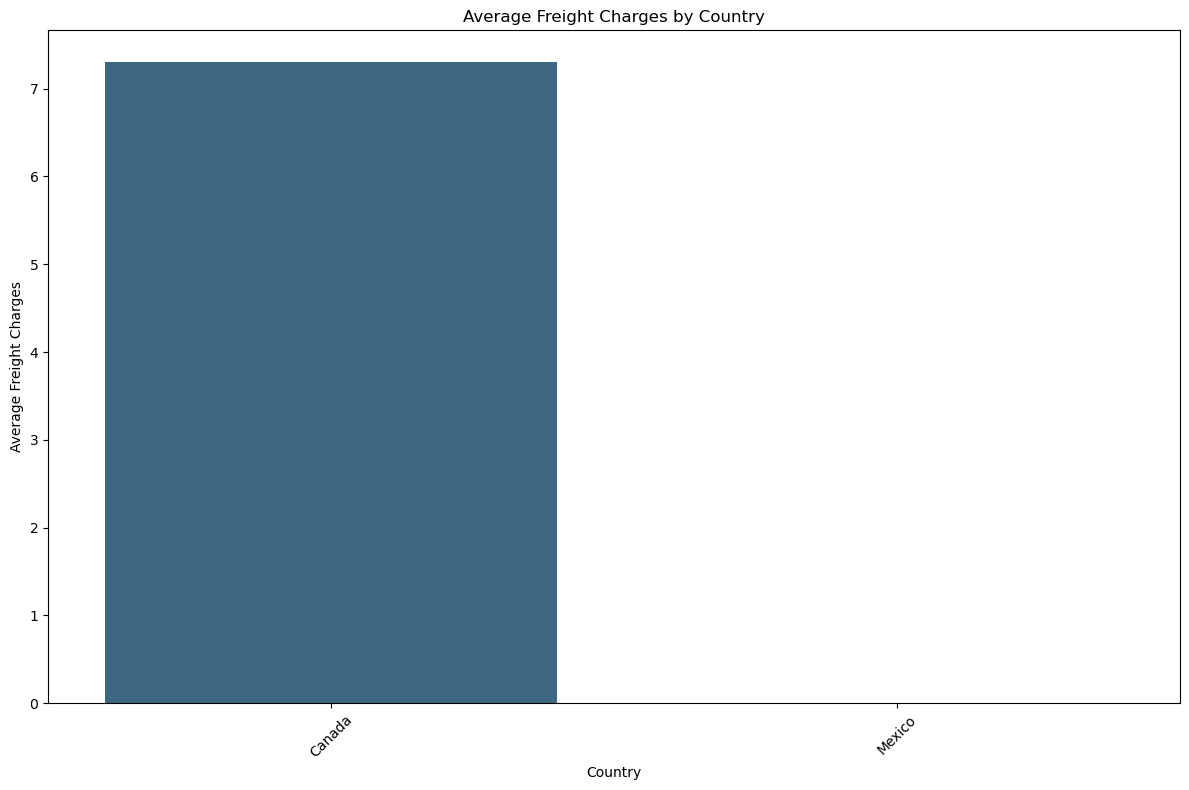

In [83]:
# Plot for COUNTRY
plt.figure(figsize=(12, 8))
sns.barplot(x='COUNTRY', y='LOG_FREIGHT_CHARGES', data=country_freight_sorted, palette='viridis')
plt.title('Average Freight Charges by Country')
plt.xlabel('Country')
plt.ylabel('Average Freight Charges')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [163]:
print(combined_dot1[combined_dot1["COUNTRY"] == "Mexico"]["FREIGHT_CHARGES"].describe())


count    439277.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: FREIGHT_CHARGES, dtype: float64


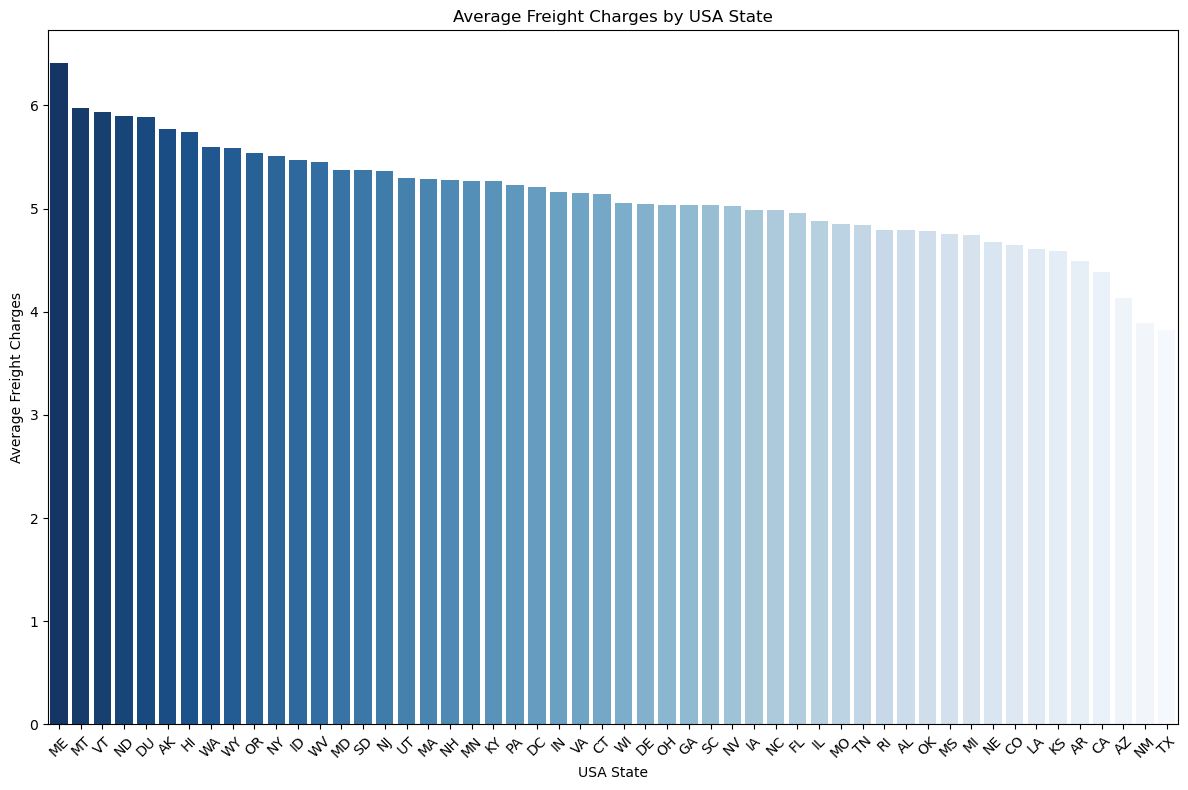

In [165]:
# Plot for USASTATE
plt.figure(figsize=(12, 8))
sns.barplot(x='USASTATE', y='LOG_FREIGHT_CHARGES', data=usastate_freight_sorted, palette='Blues_r')
plt.title('Average Freight Charges by USA State')
plt.xlabel('USA State')
plt.ylabel('Average Freight Charges')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

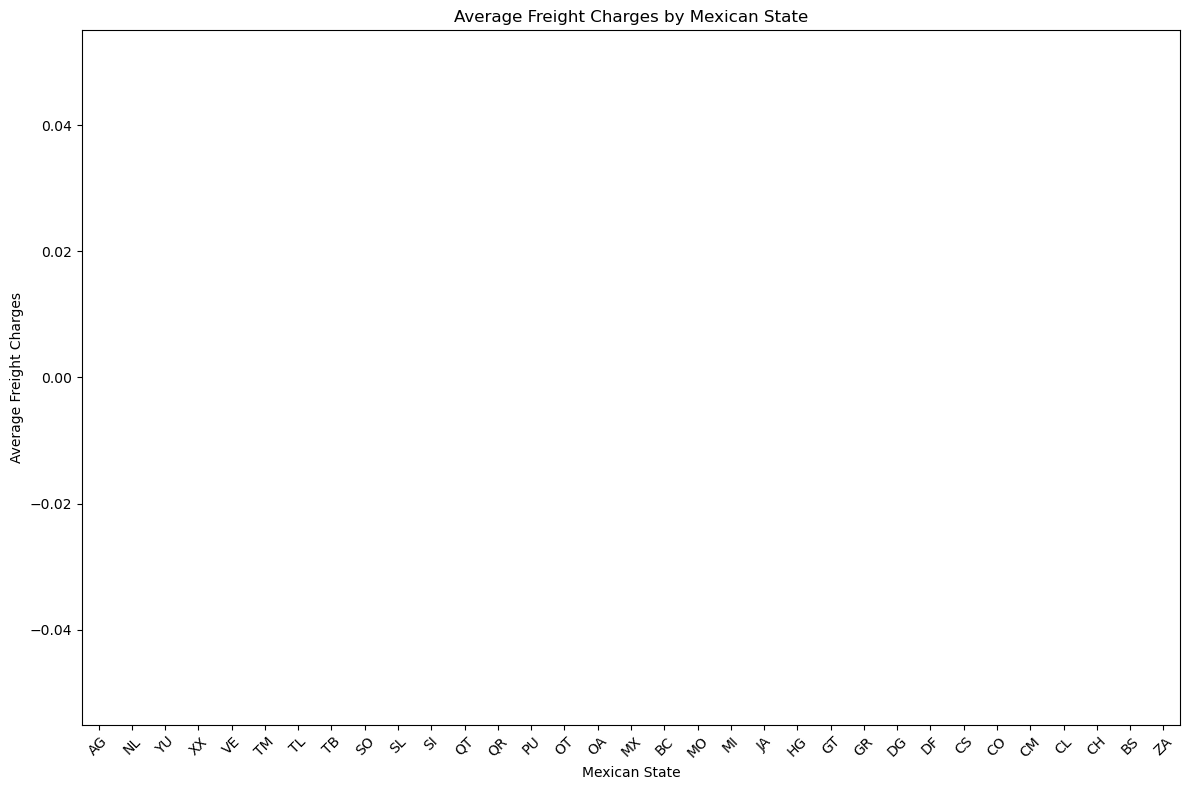

In [85]:
# Plot for MEXSTATE
plt.figure(figsize=(12, 8))
sns.barplot(x='MEXSTATE', y='LOG_FREIGHT_CHARGES', data=mexstate_freight_sorted, palette='Blues')
plt.title('Average Freight Charges by Mexican State')
plt.xlabel('Mexican State')
plt.ylabel('Average Freight Charges')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

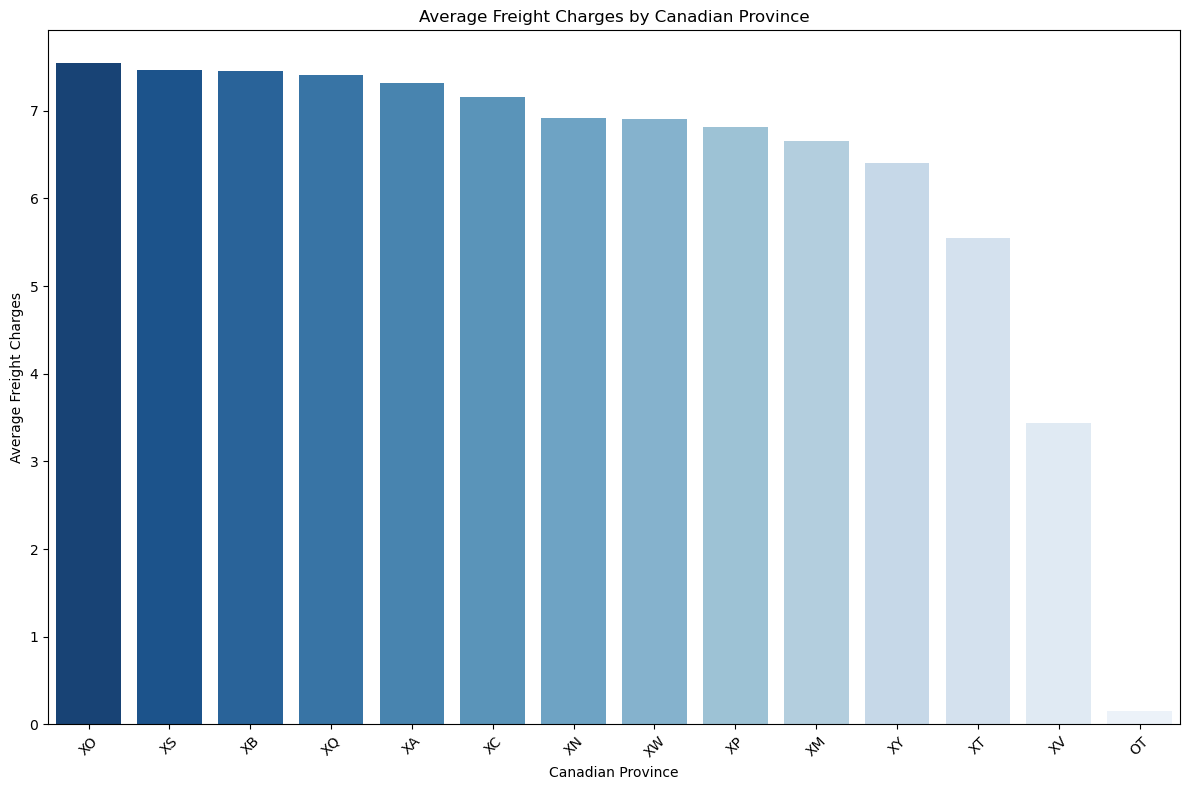

In [166]:
# Plot for CANPROV
plt.figure(figsize=(12, 8))
sns.barplot(x='CANPROV', y='LOG_FREIGHT_CHARGES', data=canprov_freight_sorted, palette='Blues_r')
plt.title('Average Freight Charges by Canadian Province')
plt.xlabel('Canadian Province')
plt.ylabel('Average Freight Charges')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 6. Analytical Questions


### 1. How does trade volume and value fluctuate over time

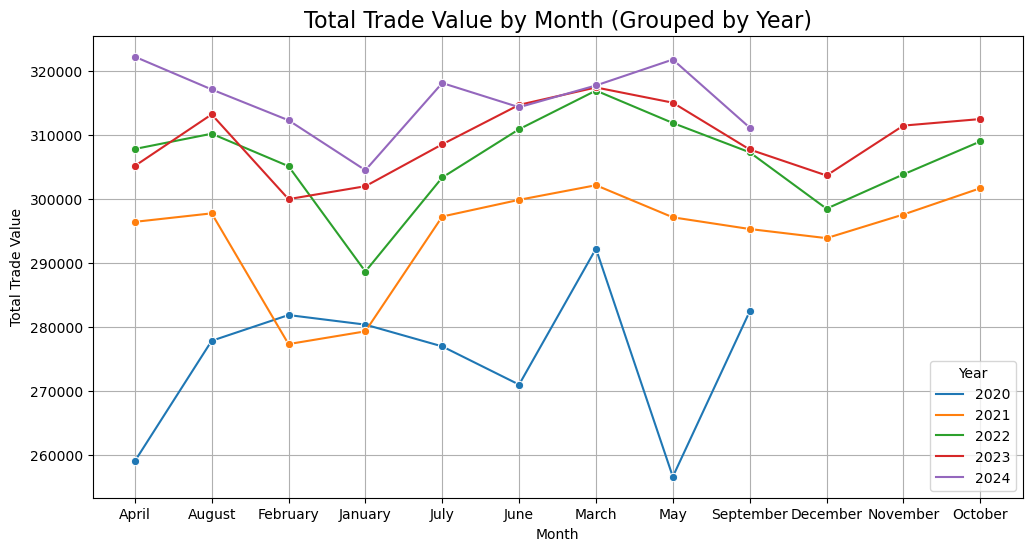

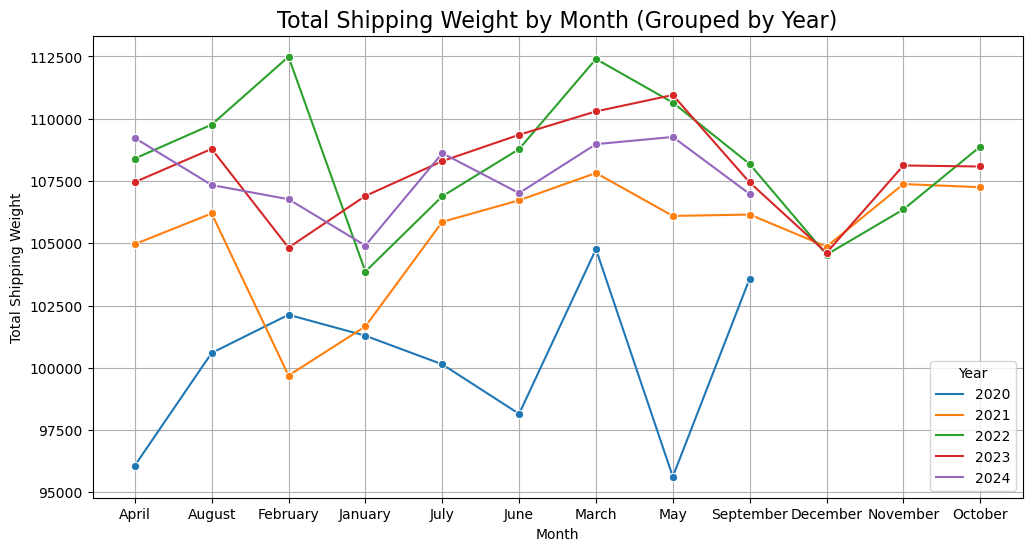

In [87]:
# Aggregate by YEAR and MONTH for total value and shipping weight
monthly_trade = combined_dot1.groupby(['YEAR', 'MONTH']).agg({
    'LOG_VALUE': 'sum',
    'LOG_SHIPWT': 'sum'
}).reset_index()

# Plot the total trade value and shipping weight over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trade, x='MONTH', y='LOG_VALUE', hue='YEAR', marker='o')
plt.title('Total Trade Value by Month (Grouped by Year)', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Total Trade Value')
plt.legend(title='Year', loc='lower right')
plt.grid(True)
plt.show()

# Plot the total shipping weight over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trade, x='MONTH', y='LOG_SHIPWT', hue='YEAR', marker='o')
plt.title('Total Shipping Weight by Month (Grouped by Year)', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Total Shipping Weight')
plt.legend(title='Year', loc='lower right')
plt.grid(True)
plt.show()

### 2. What are the key trends in freight movement across different transportation modes (road, rail, air, water) over the past five years?


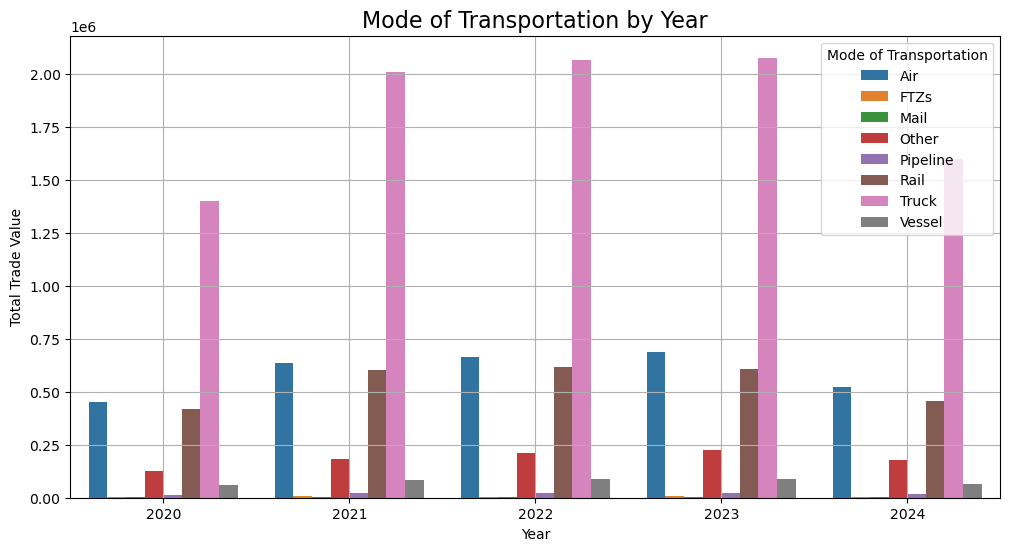

In [88]:
# Mode of transportation distribution by YEAR
mode_by_year = combined_dot1.groupby(['YEAR', 'DISAGMOT']).agg({
    'LOG_VALUE': 'sum'
}).reset_index()

# Plot the mode of transportation by year
plt.figure(figsize=(12, 6))
sns.barplot(data=mode_by_year, x='YEAR', y='LOG_VALUE', hue='DISAGMOT')
plt.title('Mode of Transportation by Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Total Trade Value')
plt.legend(title='Mode of Transportation')
plt.grid(True)
plt.show()

### 3. What are the primary causes of congestion or delays at key border crossings, and how can we alleviate them?


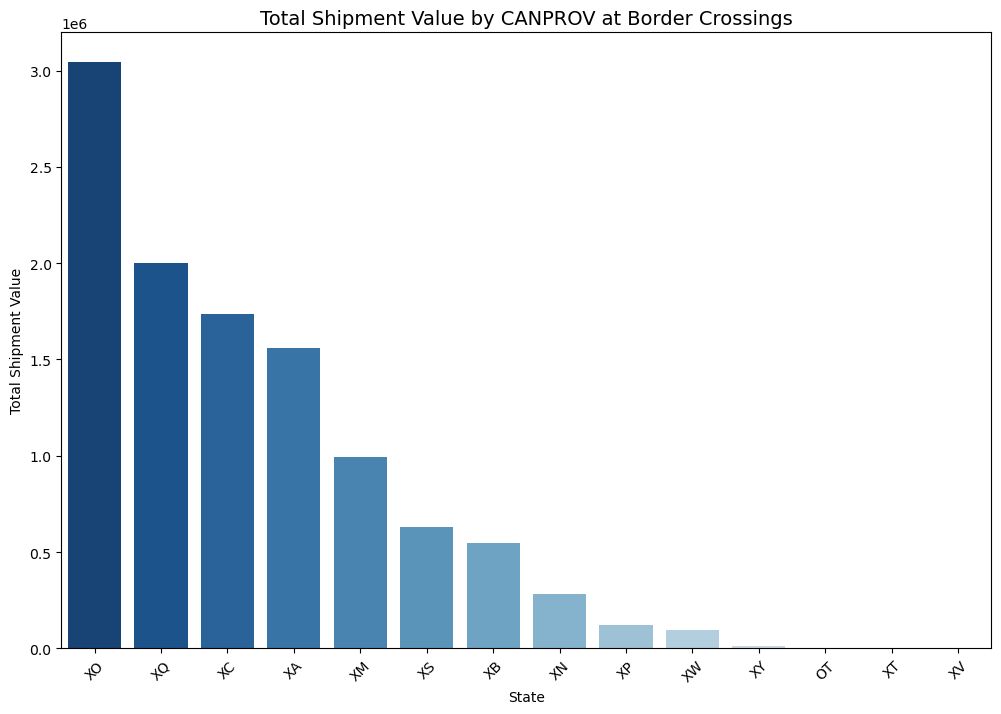

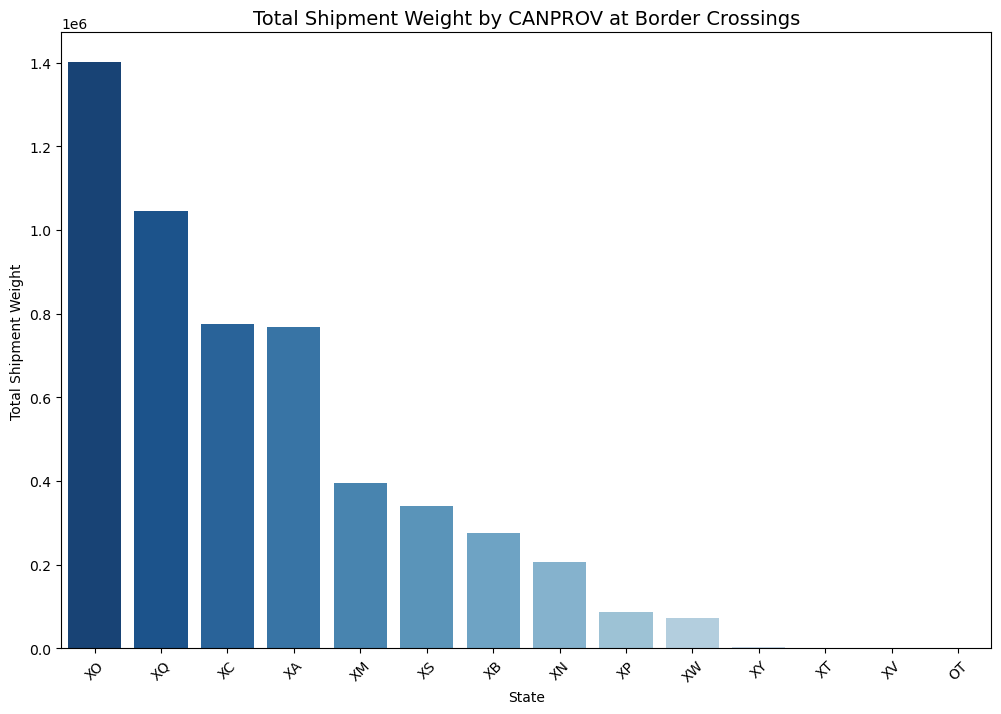

In [168]:
# Group by state and calculate the total shipment value and weight
state_shipment_value = combined_dot1.groupby('CANPROV')['LOG_VALUE'].sum()
state_shipment_weight = combined_dot1.groupby('CANPROV')['LOG_SHIPWT'].sum()

# Sort the values in descending order for better visualization
state_shipment_value = state_shipment_value.sort_values(ascending=False)
state_shipment_weight = state_shipment_weight.sort_values(ascending=False)

# Plotting Total Shipment Value by State (CANPROV)
plt.figure(figsize=(12, 8))
sns.barplot(x=state_shipment_value.index, y=state_shipment_value.values, palette='Blues_r')
plt.title('Total Shipment Value by CANPROV at Border Crossings', fontsize=14)
plt.xlabel('State')
plt.ylabel('Total Shipment Value')
plt.xticks(rotation=45)
plt.show()

# Plotting Total Shipment Weight by State (CANPROV)
plt.figure(figsize=(12, 8))
sns.barplot(x=state_shipment_weight.index, y=state_shipment_weight.values, palette='Blues_r')
plt.title('Total Shipment Weight by CANPROV at Border Crossings', fontsize=14)
plt.xlabel('State')
plt.ylabel('Total Shipment Weight')
plt.xticks(rotation=45)
plt.show()

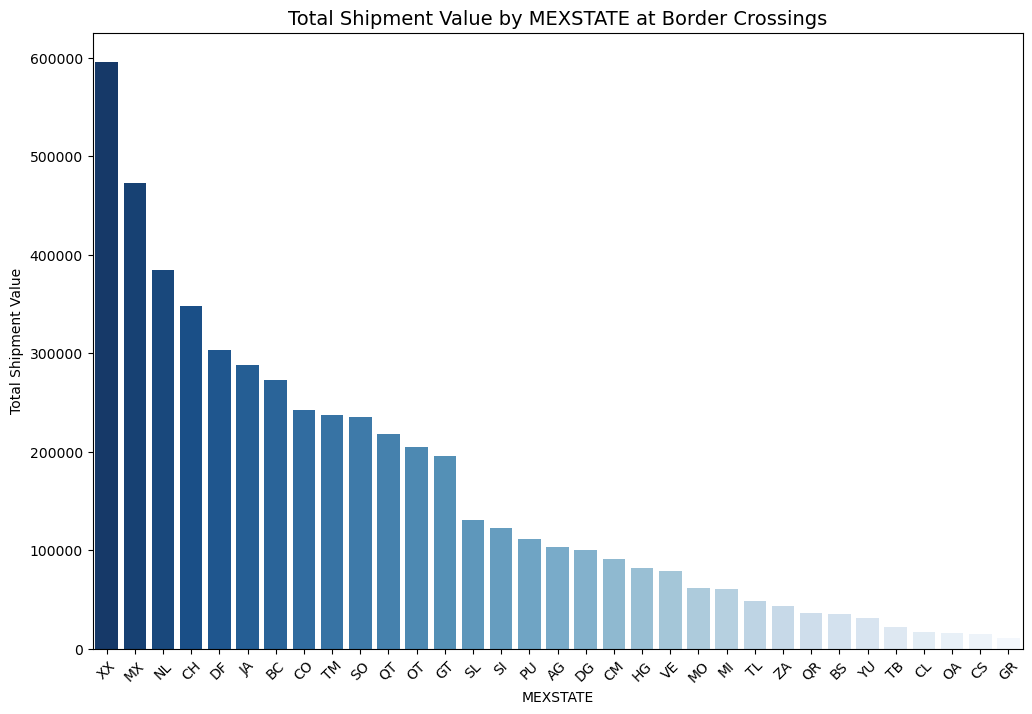

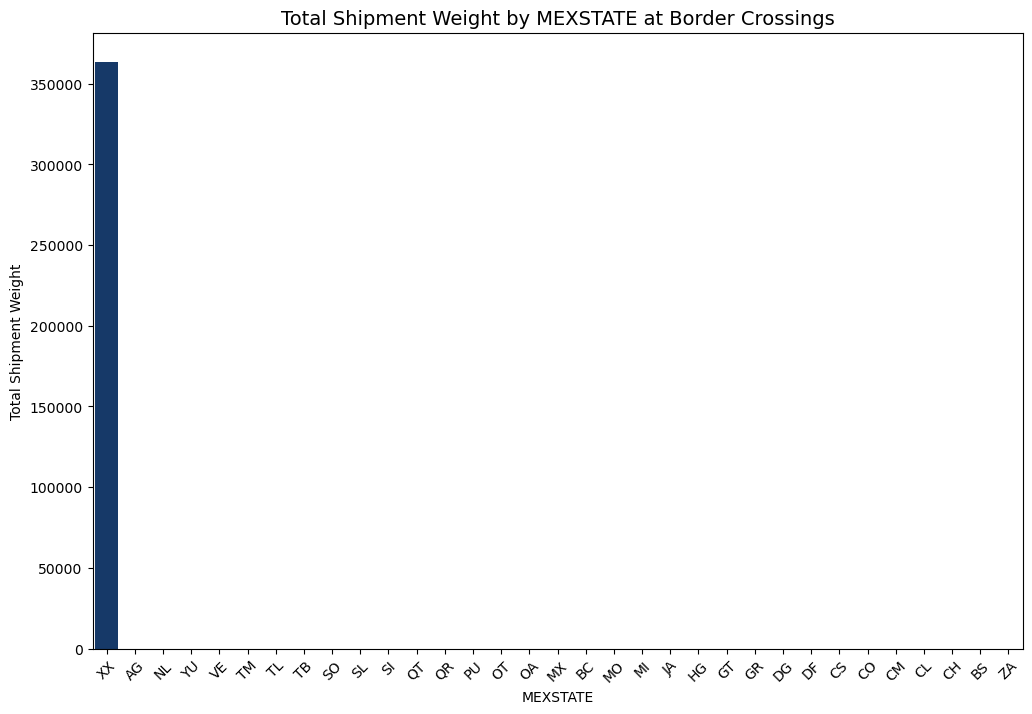

In [169]:
# b. Group by state and calculate the total shipment value and weight
state_shipment_value = combined_dot1.groupby('MEXSTATE')['LOG_VALUE'].sum()
state_shipment_weight = combined_dot1.groupby('MEXSTATE')['LOG_SHIPWT'].sum()

# Sort the values in descending order for better visualization
state_shipment_value = state_shipment_value.sort_values(ascending=False)
state_shipment_weight = state_shipment_weight.sort_values(ascending=False)

# Plotting Total Shipment Value by State (MEXSTATE)
plt.figure(figsize=(12, 8))
sns.barplot(x=state_shipment_value.index, y=state_shipment_value.values, palette='Blues_r')
plt.title('Total Shipment Value by MEXSTATE at Border Crossings', fontsize=14)
plt.xlabel('MEXSTATE')
plt.ylabel('Total Shipment Value')
plt.xticks(rotation=45)
plt.show()

# Plotting Total Shipment Weight by State (MEXSTATE)
plt.figure(figsize=(12, 8))
sns.barplot(x=state_shipment_weight.index, y=state_shipment_weight.values, palette='Blues_r')
plt.title('Total Shipment Weight by MEXSTATE at Border Crossings', fontsize=14)
plt.xlabel('MEXSTATE')
plt.ylabel('Total Shipment Weight')
plt.xticks(rotation=45)
plt.show()

### 4. What is the environmental impact of different freight transportation modes in terms of emissions and fuel consumption?


Since we don’t have actual emissions and fuel consumption data, we will use industry benchmarks for CO₂ emissions and fuel consumption per ton-km for each transportation mode.

Assumptions (Based on Industry Benchmarks)
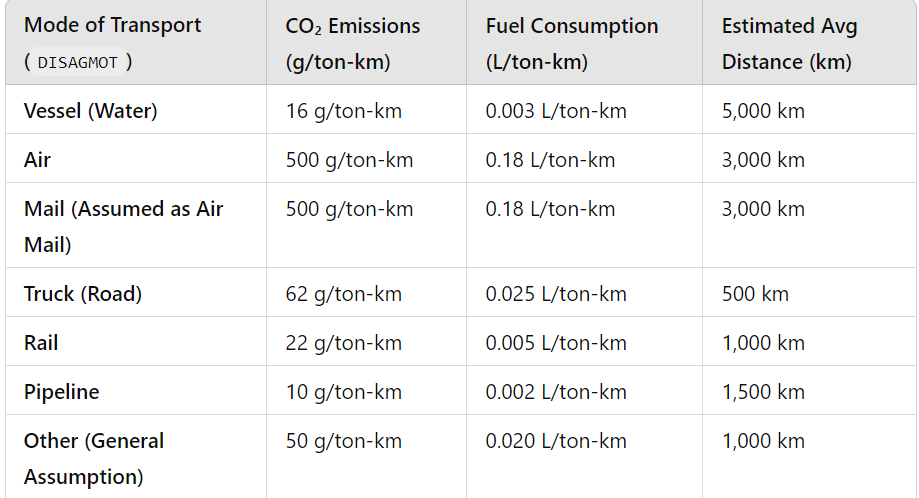
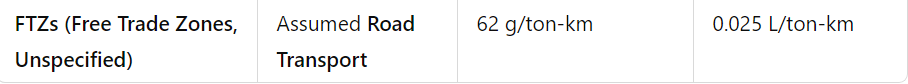

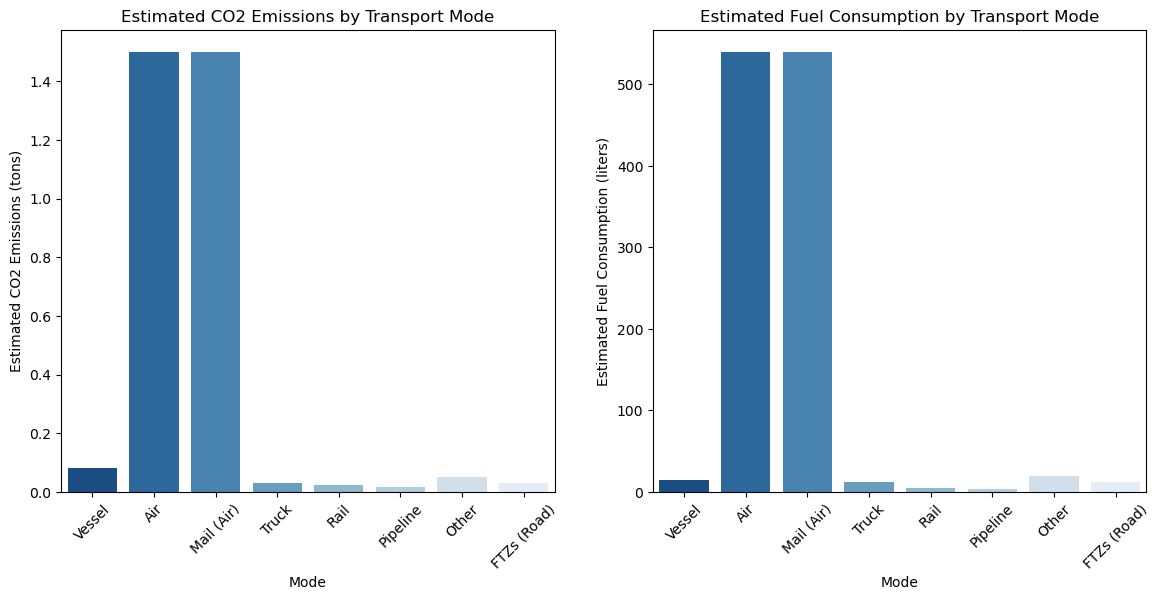

In [170]:
# Industry benchmarks for CO2 emissions and fuel consumption per ton-km
benchmarks = {
    1: {'Mode': 'Vessel', 'CO2_per_ton_km': 16, 'Fuel_per_ton_km': 0.003, 'Avg_Distance': 5000},
    3: {'Mode': 'Air', 'CO2_per_ton_km': 500, 'Fuel_per_ton_km': 0.18, 'Avg_Distance': 3000},
    4: {'Mode': 'Mail (Air)', 'CO2_per_ton_km': 500, 'Fuel_per_ton_km': 0.18, 'Avg_Distance': 3000},
    5: {'Mode': 'Truck', 'CO2_per_ton_km': 62, 'Fuel_per_ton_km': 0.025, 'Avg_Distance': 500},
    6: {'Mode': 'Rail', 'CO2_per_ton_km': 22, 'Fuel_per_ton_km': 0.005, 'Avg_Distance': 1000},
    7: {'Mode': 'Pipeline', 'CO2_per_ton_km': 10, 'Fuel_per_ton_km': 0.002, 'Avg_Distance': 1500},
    8: {'Mode': 'Other', 'CO2_per_ton_km': 50, 'Fuel_per_ton_km': 0.020, 'Avg_Distance': 1000},
    9: {'Mode': 'FTZs (Road)', 'CO2_per_ton_km': 62, 'Fuel_per_ton_km': 0.025, 'Avg_Distance': 500},
}

# Convert benchmark dictionary into a DataFrame
df_benchmarks = pd.DataFrame.from_dict(benchmarks, orient='index').reset_index()
df_benchmarks.rename(columns={'index': 'DISAGMOT'}, inplace=True)

# Estimate total emissions & fuel consumption for each mode
df_benchmarks['Estimated CO2 Emissions (tons)'] = (
    df_benchmarks['CO2_per_ton_km'] * df_benchmarks['Avg_Distance']
) / 1e6  # Convert grams to tons

df_benchmarks['Estimated Fuel Consumption (liters)'] = (
    df_benchmarks['Fuel_per_ton_km'] * df_benchmarks['Avg_Distance']
)

# Visualization
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(data=df_benchmarks, x='Mode', y='Estimated CO2 Emissions (tons)', ax=ax[0], palette='Blues_r')
ax[0].set_title('Estimated CO2 Emissions by Transport Mode')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

sns.barplot(data=df_benchmarks, x='Mode', y='Estimated Fuel Consumption (liters)', ax=ax[1], palette='Blues_r')
ax[1].set_title('Estimated Fuel Consumption by Transport Mode')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

plt.show()

### 5. What safety incidents are most prevalent in freight transportation?

#### Assumptions for Analysis
It is assumed that safety incidents in freight transportation vary by mode of transport due to factors such as:

Road (Truck): High accident rates due to traffic, weather, and driver fatigue.

Rail: Derailments and hazardous material spills.

Air: Rare incidents but severe consequences (e.g., crashes, turbulence).

Water (Vessel): Weather-related accidents, collisions, and cargo losses.

Pipeline: Low accident frequency but high impact (e.g., leaks, explosions).

In [ ]:
# Industry benchmark for safety incidents per 1 million shipments
safety_risk = {
    1: {'Mode': 'Vessel', 'Incidents per million shipments': 20},
    3: {'Mode': 'Air', 'Incidents per million shipments': 5},
    4: {'Mode': 'Mail (Air)', 'Incidents per million shipments': 5},
    5: {'Mode': 'Truck', 'Incidents per million shipments': 120},
    6: {'Mode': 'Rail', 'Incidents per million shipments': 40},
    7: {'Mode': 'Pipeline', 'Incidents per million shipments': 10},
    8: {'Mode': 'Other', 'Incidents per million shipments': 50},
    9: {'Mode': 'FTZs (Road)', 'Incidents per million shipments': 120},
}

# Convert to DataFrame
df_safety = pd.DataFrame.from_dict(safety_risk, orient='index').reset_index()
df_safety.rename(columns={'index': 'DISAGMOT'}, inplace=True)

# Plot Safety Risk by Transport Mode
plt.figure(figsize=(10, 6))
sns.barplot(data=df_safety, x='Mode', y='Incidents per million shipments', palette='Blues')

plt.title("Estimated Safety Incidents by Transport Mode")
plt.xlabel("Mode of Transportation")
plt.ylabel("Incidents per Million Shipments")
plt.xticks(rotation=45)
plt.show()

### 6. How do extreme outliers in shipment value, weight, and freight charges vary across trade types, and what impact do they have on overall freight analysis?

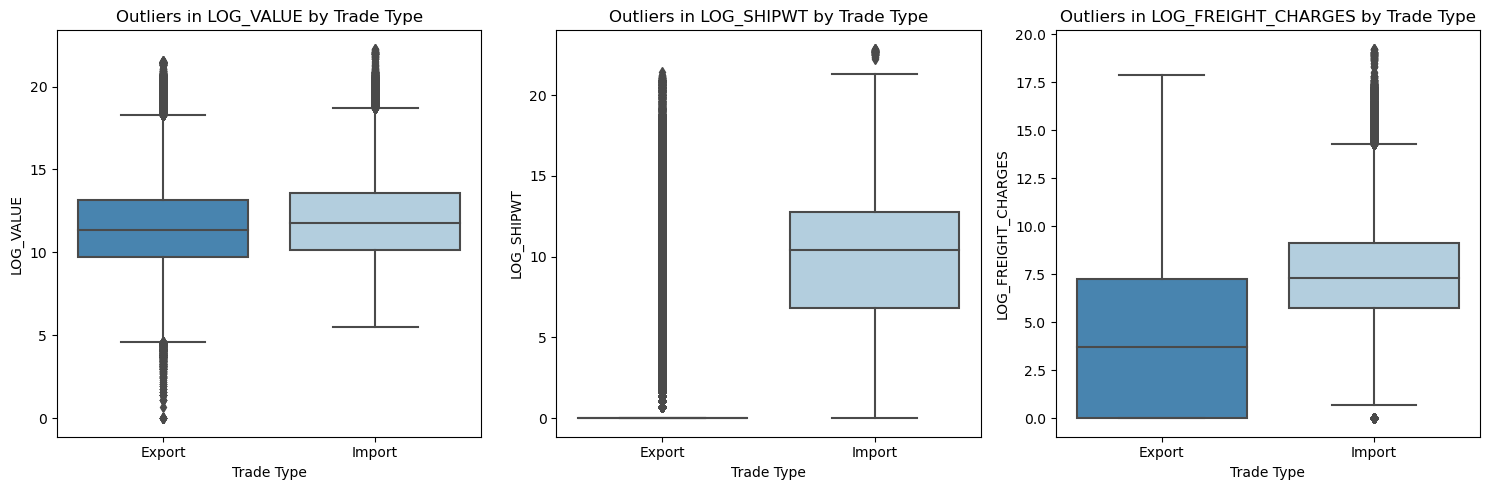

In [171]:
# Define numerical columns
num_cols = ["LOG_VALUE", "LOG_SHIPWT", "LOG_FREIGHT_CHARGES"]

# Create boxplots by Trade Type (TRDTYPE)
plt.figure(figsize=(15, 5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=combined_dot1, x="TRDTYPE", y=col, palette="Blues_r")
    plt.title(f"Outliers in {col} by Trade Type")
    plt.xlabel("Trade Type")
    plt.ylabel(col)

plt.tight_layout()
plt.show()


### 7. How do freight charges vary by trade type (TRDTYPE)?

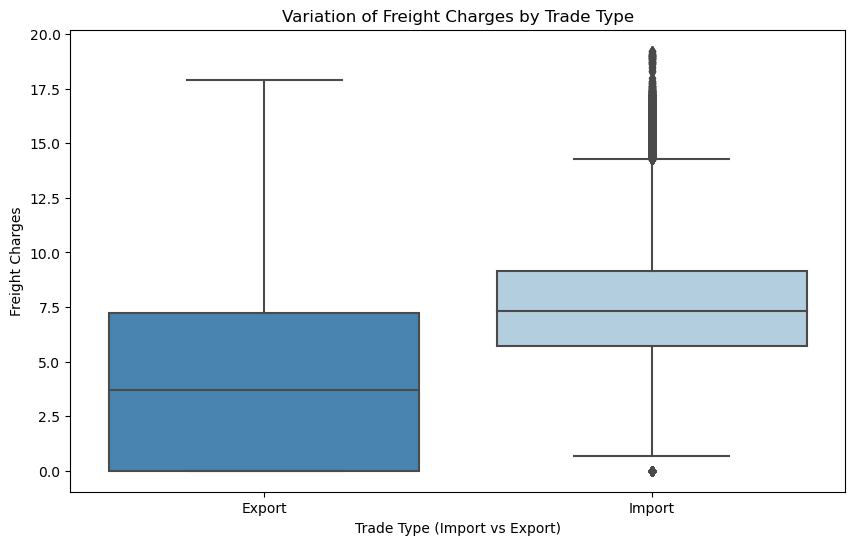

In [172]:
# Assuming df is your main dataset containing 'TRDTYPE' and 'FREIGHT_CHARGES'
plt.figure(figsize=(10, 6))

# Boxplot to show distribution of freight charges by trade type
sns.boxplot(data=combined_dot1, x='TRDTYPE', y='LOG_FREIGHT_CHARGES', palette='Blues_r')

plt.title("Variation of Freight Charges by Trade Type")
plt.xlabel("Trade Type (Import vs Export)")
plt.ylabel("Freight Charges")
plt.show()


### 8. What is the total shipment value for each TRDTYPE (trade type)?

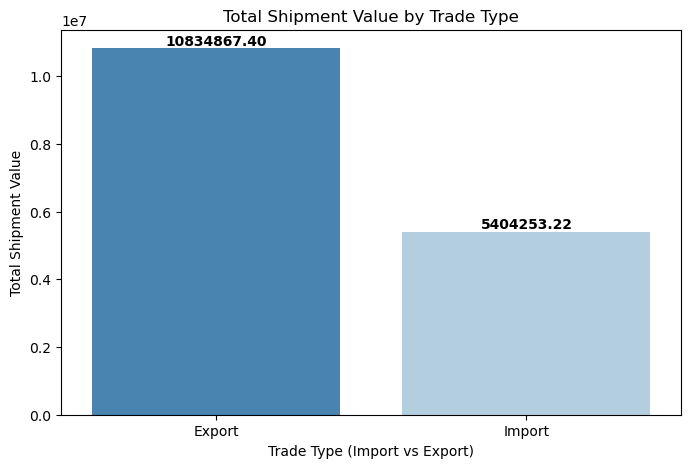

In [173]:
# Grouping data
trade_value = combined_dot1.groupby('TRDTYPE')['LOG_VALUE'].sum().reset_index()

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=trade_value, x='TRDTYPE', y='LOG_VALUE', palette='Blues_r')

plt.title("Total Shipment Value by Trade Type")
plt.xlabel("Trade Type (Import vs Export)")
plt.ylabel("Total Shipment Value")
plt.xticks(rotation=0)

# Add value labels on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.show()


## Analyzing Combined_Dot2 Data

In [103]:
combined_dot2.head()

TRDTYPE USASTATE  COMMODITY2  DISAGMOT MEXSTATE CANPROV  COUNTRY   VALUE  \
0        1       AK           2         5       NL     NaN     2010   22370   
1        1       AK           3         1      NaN      XB     1220  108133   
2        1       AK           3         1      NaN      XC     1220  809104   
3        1       AK           3         5      NaN      XC     1220  887888   
4        1       AK           3         5      NaN      XO     1220   76006   

   SHIPWT  FREIGHT_CHARGES   DF CONTCODE  MONTH  YEAR  
0       0                0  1.0        0      4  2020  
1   24698             1482  1.0        X      4  2020  
2   99790            15864  1.0        X      4  2020  
3       0            17546  1.0        X      4  2020  
4       0             1665  1.0        X      4  2020

In [104]:
combined_dot2.tail()

TRDTYPE USASTATE  COMMODITY2  DISAGMOT MEXSTATE CANPROV  COUNTRY  \
4592214        2       WY          97         3      NaN      XC     1220   
4592215        2       WY          98         3      NaN      XO     1220   
4592216        2       WY          98         5      NaN      XA     1220   
4592217        2       WY          98         5      NaN      XO     1220   
4592218        2       WY          98         5      NaN      XS     1220   

           VALUE  SHIPWT  FREIGHT_CHARGES  DF CONTCODE  MONTH  YEAR  
4592214     6149      29               75 NaN        0      9  2024  
4592215    19774     153             1696 NaN        0      9  2024  
4592216    67816    6253             1200 NaN        0      9  2024  
4592217  1629424  234245            10907 NaN        0      9  2024  
4592218   119132    5443              248 NaN        0      9  2024

In [105]:
combined_dot2.shape

(4592219, 14)

In [106]:
combined_dot2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4592219 entries, 0 to 4592218
Data columns (total 14 columns):
 #   Column           Dtype  
---  ------           -----  
 0   TRDTYPE          int64  
 1   USASTATE         object 
 2   COMMODITY2       int64  
 3   DISAGMOT         int64  
 4   MEXSTATE         object 
 5   CANPROV          object 
 6   COUNTRY          int64  
 7   VALUE            int64  
 8   SHIPWT           int64  
 9   FREIGHT_CHARGES  int64  
 10  DF               float64
 11  CONTCODE         object 
 12  MONTH            int64  
 13  YEAR             int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 490.5+ MB


In [107]:
combined_dot2.describe()

TRDTYPE    COMMODITY2      DISAGMOT       COUNTRY         VALUE  \
count  4.592219e+06  4.592219e+06  4.592219e+06  4.592219e+06  4.592219e+06   
mean   1.305485e+00  5.707344e+01  4.777564e+00  1.537321e+03  1.529334e+06   
std    4.606125e-01  2.769354e+01  1.112882e+00  3.872867e+02  2.509797e+07   
min    1.000000e+00  1.000000e+00  1.000000e+00  1.220000e+03  1.000000e+00   
25%    1.000000e+00  3.400000e+01  5.000000e+00  1.220000e+03  1.221500e+04   
50%    1.000000e+00  6.100000e+01  5.000000e+00  1.220000e+03  5.662100e+04   
75%    2.000000e+00  8.400000e+01  5.000000e+00  2.010000e+03  3.022285e+05   
max    2.000000e+00  9.900000e+01  9.000000e+00  2.010000e+03  5.595625e+09   

             SHIPWT  FREIGHT_CHARGES            DF         MONTH          YEAR  
count  4.592219e+06     4.592219e+06  3.189366e+06  4.592219e+06  4.592219e+06  
mean   6.409938e+05     2.019228e+04  1.325470e+00  5.797701e+00  2.021825e+03  
std    2.968710e+07     7.463698e+05  4.685503e-01  3.212274e+00  1.402254e+00  
min    0.000000e+00     0.000000e+00  1.000000e+00  1.000000e+00  2.020000e+03  
25%    0.000000e+00     0.000000e+00  1.000000e+00  3.000000e+00  2.021000e+03  
50%    0.000000e+00     2.000000e+02  1.000000e+00  6.000000e+00  2.022000e+03  
75%    8.650000e+02     2.067000e+03  2.000000e+00  8.000000e+00  2.023000e+03  
max    8.563936e+09     2.487214e+08  2.000000e+00  1.200000e+01  2.024000e+03

In [108]:
combined_dot2.duplicated().sum()

490595

In [109]:
# dropping duplicate values
combined_dot2 = combined_dot2.drop_duplicates()

In [110]:
combined_dot2.shape

(4101624, 14)

In [111]:
combined_dot2.isna().sum()

TRDTYPE                  0
USASTATE                 0
COMMODITY2               0
DISAGMOT                 0
MEXSTATE           2700940
CANPROV            1651792
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                 1251187
CONTCODE                 0
MONTH                    0
YEAR                     0
dtype: int64

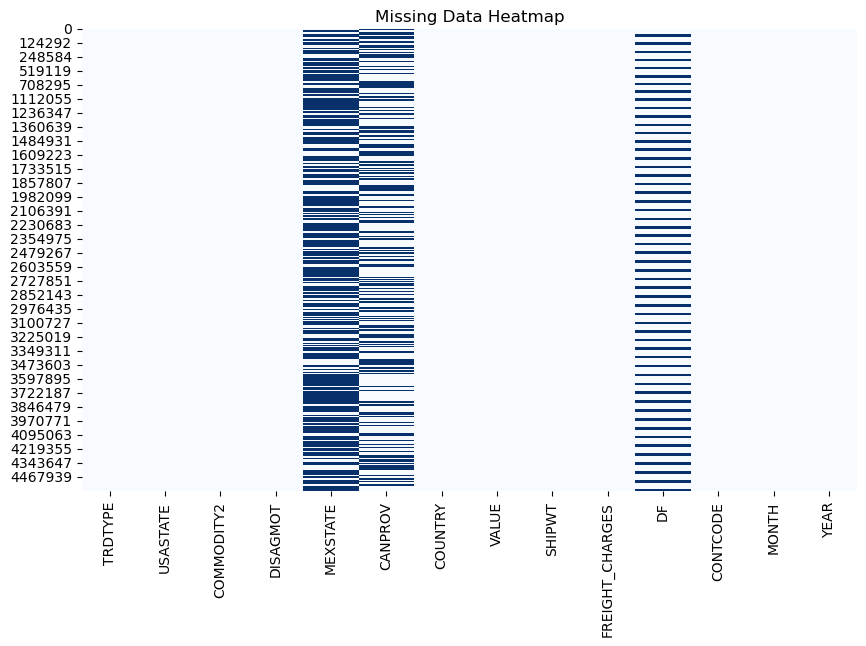

In [112]:
#Heatmap of missing data 
plt.figure(figsize=(10, 6))
sns.heatmap(combined_dot2.isnull(), cbar=False, cmap='Blues')
plt.title('Missing Data Heatmap')
plt.show()

### Handling missing values in dot2

#### Missing values in 'MEXSTATE' and 'CANPROV'

In [113]:
#percentage of missing values per 'MEXSTATE' column
combined_dot2['MEXSTATE'].isnull().sum()/len(combined_dot2)*100

65.85050214256597

In [114]:
#percentage of missing values per 'CANPROV' column
combined_dot2['CANPROV'].isnull().sum()/len(combined_dot2)*100

40.2716582504881

In [115]:
# Rows where both 'MEXSTATE' and 'CANPROV' are missing
both_missing2 = combined_dot2[pd.isnull(combined_dot2['MEXSTATE']) & pd.isnull(combined_dot2['CANPROV'])]

# Count the number of rows where both 'MEXSTATE' and 'CANPROV' are missing
missing_count2 = both_missing2.shape[0]

# Display the rows where both MEXSTATE and CANPROV are missing
print("Rows where both MEXSTATE and CANPROV are missing:")
print(both_missing2)

# Display the count of rows where both MEXSTATE and CANPROV are missing
print(f"\nTotal number of rows where both MEXSTATE and CANPROV are missing: {missing_count2}")

Rows where both MEXSTATE and CANPROV are missing:
         TRDTYPE USASTATE  COMMODITY2  DISAGMOT MEXSTATE CANPROV  COUNTRY  \
3339           1       CA          39         5      NaN     NaN     2010   
3553           1       CA          48         5      NaN     NaN     2010   
4625           1       CA          87         5      NaN     NaN     2010   
8485           1       FL          89         5      NaN     NaN     2010   
9197           1       GA          40         5      NaN     NaN     2010   
...          ...      ...         ...       ...      ...     ...      ...   
4592169        2       WY          84         5      NaN     NaN     2010   
4592185        2       WY          87         1      NaN     NaN     2010   
4592186        2       WY          87         5      NaN     NaN     2010   
4592200        2       WY          94         5      NaN     NaN     2010   
4592207        2       WY          95         5      NaN     NaN     2010   

          VALUE  SHIPWT  

In [116]:
# Filter rows where both 'MEXSTATE' and 'CANPROV' are NaN
condition1 = pd.isnull(combined_dot2['MEXSTATE']) & pd.isnull(combined_dot2['CANPROV'])

# Drop the rows where both 'MEXSTATE' and 'CANPROV' are NaN
combined_dot2 = combined_dot2[~condition1]

In [117]:
combined_dot2.isnull().sum()

TRDTYPE                  0
USASTATE                 0
COMMODITY2               0
DISAGMOT                 0
MEXSTATE           2449832
CANPROV            1400684
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                 1001574
CONTCODE                 0
MONTH                    0
YEAR                     0
dtype: int64

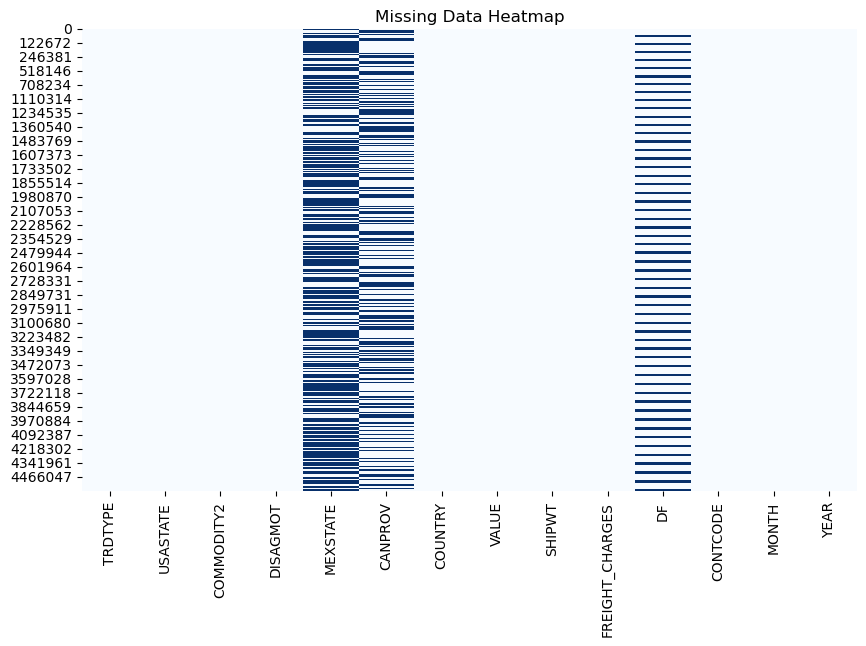

In [118]:
#Heatmap of missing data 
plt.figure(figsize=(10, 6))
sns.heatmap(combined_dot2.isnull(), cbar=False, cmap='Blues')
plt.title('Missing Data Heatmap')
plt.show()

#### Handling missing values in 'DF' for dot

In [119]:
#percentage of missing values per 'DF' column
combined_dot2['DF'].isnull().sum()/len(combined_dot2)*100

26.011422884621176

In [120]:
# this was done using the mode of 'DF' grouped by 'USASTATE'

# checking the missing values in the 'DF' column
missing_values1 = combined_dot2['DF'].isna().sum()
print(f"Missing values: {missing_values}")


# Imputing missing values based on 'USASTATE' column
combined_dot2['DF'] = combined_dot2.groupby(['USASTATE'], group_keys=False)['DF'].apply(lambda x: x.fillna(x.mode()[0]))

# If you still have missing values, you can fallback to imputing the mode of the entire column:
#imputer = SimpleImputer(strategy='most_frequent')
#combined_dot1['DF'] = imputer.fit_transform(combined_dot1[['DF']])

print(combined_dot2.head())

# checking the missing values in the 'DF' column after handling missing values
missing_values = combined_dot2['DF'].isna().sum()
print(f"Missing values: {missing_values1}")

Missing values: 0
   TRDTYPE USASTATE  COMMODITY2  DISAGMOT MEXSTATE CANPROV  COUNTRY   VALUE  \
0        1       AK           2         5       NL     NaN     2010   22370   
1        1       AK           3         1      NaN      XB     1220  108133   
2        1       AK           3         1      NaN      XC     1220  809104   
3        1       AK           3         5      NaN      XC     1220  887888   
4        1       AK           3         5      NaN      XO     1220   76006   

   SHIPWT  FREIGHT_CHARGES   DF CONTCODE  MONTH  YEAR  
0       0                0  1.0        0      4  2020  
1   24698             1482  1.0        X      4  2020  
2   99790            15864  1.0        X      4  2020  
3       0            17546  1.0        X      4  2020  
4       0             1665  1.0        X      4  2020  
Missing values: 1001574


In [121]:
combined_dot2['DF'].isna().sum()

0

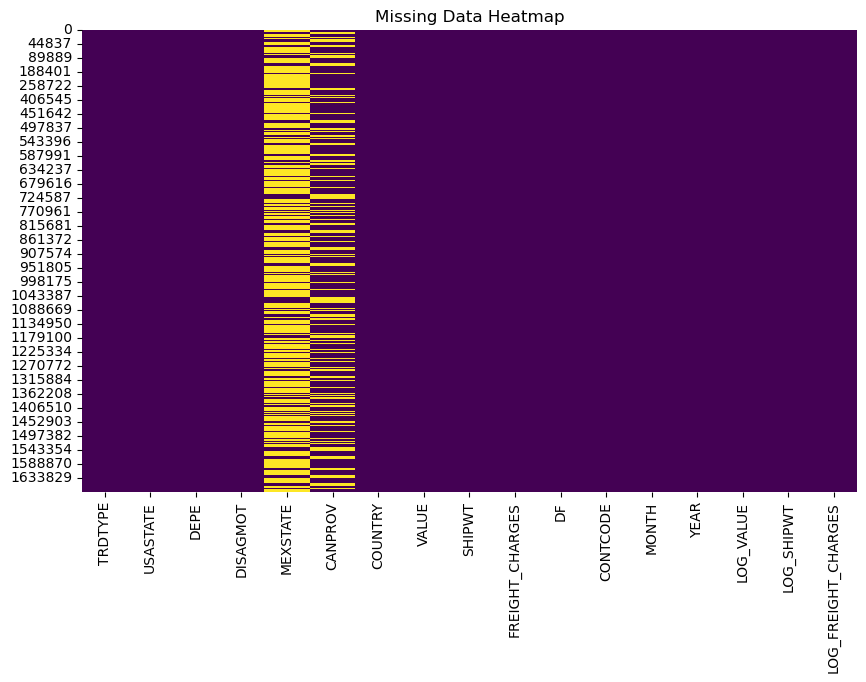

In [122]:
#Heatmap of missing data after handling missing values in 'DF'
plt.figure(figsize=(10, 6))
sns.heatmap(combined_dot1.isnull(), cbar=False, cmap='Blues')
plt.title('Missing Data Heatmap')
plt.show()

In [123]:
combined_dot2['TRDTYPE'].value_counts()

1    2848942
2    1001574
Name: TRDTYPE, dtype: int64

In [124]:
# Renaming values in theb 'TRDTYPE' column
combined_dot2["TRDTYPE"] = combined_dot1["TRDTYPE"].replace({1: 'Export',
    2: 'Import'})

In [125]:
combined_dot2['USASTATE'].value_counts()

TX    246444
CA    211016
IL    172316
OH    137603
PA    132327
NY    130864
FL    129525
MI    124926
NJ    119844
GA    117631
WI    114754
NC    112558
IN    104489
MN    100034
TN     99360
MA     93366
WA     90723
MO     87395
AZ     83766
KY     79318
SC     77976
VA     70761
CO     70323
CT     69132
IA     65626
OR     64798
AL     62519
UT     61945
KS     60735
MD     59880
NV     51435
LA     50285
OK     49683
MS     45985
AR     45686
NH     43649
NE     41906
ID     38315
ME     37784
RI     33438
ND     30452
DE     28805
MT     28113
VT     27934
NM     26747
SD     25874
DU     24729
WV     23827
WY     16007
AK     14395
HI      7943
DC      5570
Name: USASTATE, dtype: int64

In [126]:
combined_dot2['COMMODITY2'].value_counts()

84    206512
85    178333
39    176167
87    146021
90    135976
       ...  
24      2628
45      2600
46      2581
50       759
99        54
Name: COMMODITY2, Length: 98, dtype: int64

In [127]:
combined_dot2['DISAGMOT'].value_counts()

5    2773401
3     593783
6     321104
8      97891
1      51530
9       4527
4       4431
7       3849
Name: DISAGMOT, dtype: int64

In [128]:
# renaming values in the 'DISAGMOT' column #FTZ = Foreign Trade Zones
combined_dot2["DISAGMOT"] = combined_dot2["DISAGMOT"].replace({1: 'Vessel',
    3: 'Air',
    4: 'Mail',
    5: 'Truck',
    6: 'Rail',
    7: 'Pipeline',
    8: 'Other',
    9: 'FTZs'
    })

In [129]:
combined_dot2['MEXSTATE'].value_counts()

MX    143074
NL    139685
XX     98197
BC     89604
CH     85716
DF     77535
JA     75522
CO     69644
SO     65151
QT     63478
GT     63421
TM     61515
OT     60143
SL     49461
CM     42289
PU     33381
AG     31580
SI     19623
DG     18162
HG     16417
VE     14582
MO     14576
TL     12177
BS     10559
MI     10321
ZA      8941
QR      6805
YU      5695
TB      4259
CL      2876
CS      2294
GR      2155
OA      1846
Name: MEXSTATE, dtype: int64

In [130]:
combined_dot2['CANPROV'].value_counts()

XO    702442
XQ    454919
XC    384835
XA    317418
XM    274502
XS    134577
XB    103990
XN     46198
XP     15738
XW      7924
OT      5551
XY      1443
XT       240
XV        55
Name: CANPROV, dtype: int64

In [131]:
combined_dot2['COUNTRY'].value_counts()

1220    2449832
2010    1400684
Name: COUNTRY, dtype: int64

In [132]:
# Renaming values in the 'COUNTRY' column
combined_dot2["COUNTRY"] = combined_dot2["COUNTRY"].replace({1220: 'Canada',
    2010: 'Mexico'})

In [133]:
combined_dot2['VALUE'].count()

3850516

In [134]:
combined_dot2['SHIPWT'].count()

3850516

In [135]:
combined_dot2['FREIGHT_CHARGES'].count()

3850516

In [136]:
combined_dot2['DF'].value_counts()

1.0    2920342
2.0     930174
Name: DF, dtype: int64

In [137]:
# Renaming values in the 'DF' column
combined_dot2["DF"] = combined_dot2["DF"].replace({1.0: 'Domestic',
    2.0: 'Foreign'})

In [138]:
combined_dot2['CONTCODE'].value_counts()

0    2139090
X    1502694
1     208732
Name: CONTCODE, dtype: int64

In [139]:
# Renaming values in the 'CONTCODE' column
combined_dot2["CONTCODE"] = combined_dot2["CONTCODE"].replace({'X': 'Containerized',
    '0':'Non_Containerized', '1':'Others'})

In [140]:
combined_dot2['MONTH'].value_counts()

3     367952
8     360316
6     358338
9     357364
7     355603
5     354885
4     354232
2     349354
1     346961
10    219057
11    215979
12    210475
Name: MONTH, dtype: int64

In [141]:
# renaming the values of the month column
combined_dot2["MONTH"] = combined_dot2["MONTH"].replace({1.0: 'January',
    2.0: 'February',
    3.0: 'March',
    4.0: 'April',
    5.0: 'May',
    6.0: 'June',
    7.0: 'July',
    8.0: 'August',
    9.0: 'September',
    10.0: 'October',
    11.0: 'November',
    12.0: 'December'})

In [142]:
combined_dot2['YEAR'].value_counts()

2023    875637
2022    866447
2021    847089
2024    665679
2020    595664
Name: YEAR, dtype: int64

In [143]:
combined_dot2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3850516 entries, 0 to 4592218
Data columns (total 14 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   TRDTYPE          object
 1   USASTATE         object
 2   COMMODITY2       int64 
 3   DISAGMOT         object
 4   MEXSTATE         object
 5   CANPROV          object
 6   COUNTRY          object
 7   VALUE            int64 
 8   SHIPWT           int64 
 9   FREIGHT_CHARGES  int64 
 10  DF               object
 11  CONTCODE         object
 12  MONTH            object
 13  YEAR             int64 
dtypes: int64(5), object(9)
memory usage: 440.7+ MB


#### Changing datatypes

In [146]:
#Changing datatypes
combined_dot2 = combined_dot2.astype({'TRDTYPE':'str',
                                      'COMMODITY2':'str',
                                      'DISAGMOT':'str',
                                      'COUNTRY':'str',
                                      'DF':'str',
                                      'CONTCODE':'str',
                                      'MONTH':'str',
                                      'YEAR':'str'
    
})

In [147]:
combined_dot2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3850516 entries, 0 to 4592218
Data columns (total 14 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   TRDTYPE          object
 1   USASTATE         object
 2   COMMODITY2       object
 3   DISAGMOT         object
 4   MEXSTATE         object
 5   CANPROV          object
 6   COUNTRY          object
 7   VALUE            int64 
 8   SHIPWT           int64 
 9   FREIGHT_CHARGES  int64 
 10  DF               object
 11  CONTCODE         object
 12  MONTH            object
 13  YEAR             object
dtypes: int64(3), object(11)
memory usage: 440.7+ MB


In [148]:
#describing the categorical variables
combined_dot2.describe(include='object')

TRDTYPE USASTATE COMMODITY2 DISAGMOT MEXSTATE  CANPROV  COUNTRY  \
count   3850516  3850516    3850516  3850516  1400684  2449832  3850516   
unique        3       52         98        8       33       14        2   
top         nan       TX         84    Truck       MX       XO   Canada   
freq    2948586   246444     206512  2773401   143074   702442  2449832   

              DF           CONTCODE    MONTH     YEAR  
count    3850516            3850516  3850516  3850516  
unique         2                  3       12        5  
top     Domestic  Non_Containerized    March     2023  
freq     2920342            2139090   367952   875637

In [149]:
#describing the numerical variables
combined_dot2.describe()

VALUE        SHIPWT  FREIGHT_CHARGES
count  3.850516e+06  3.850516e+06     3.850516e+06
mean   1.173092e+06  5.296138e+05     1.717559e+04
std    1.839322e+07  2.968595e+07     7.733212e+05
min    1.000000e+00  0.000000e+00     0.000000e+00
25%    1.200000e+04  0.000000e+00     0.000000e+00
50%    5.460000e+04  0.000000e+00     1.530000e+02
75%    2.839122e+05  3.130000e+02     1.740000e+03
max    4.932180e+09  8.563936e+09     2.487214e+08

#### Checking for outliers in numerical data

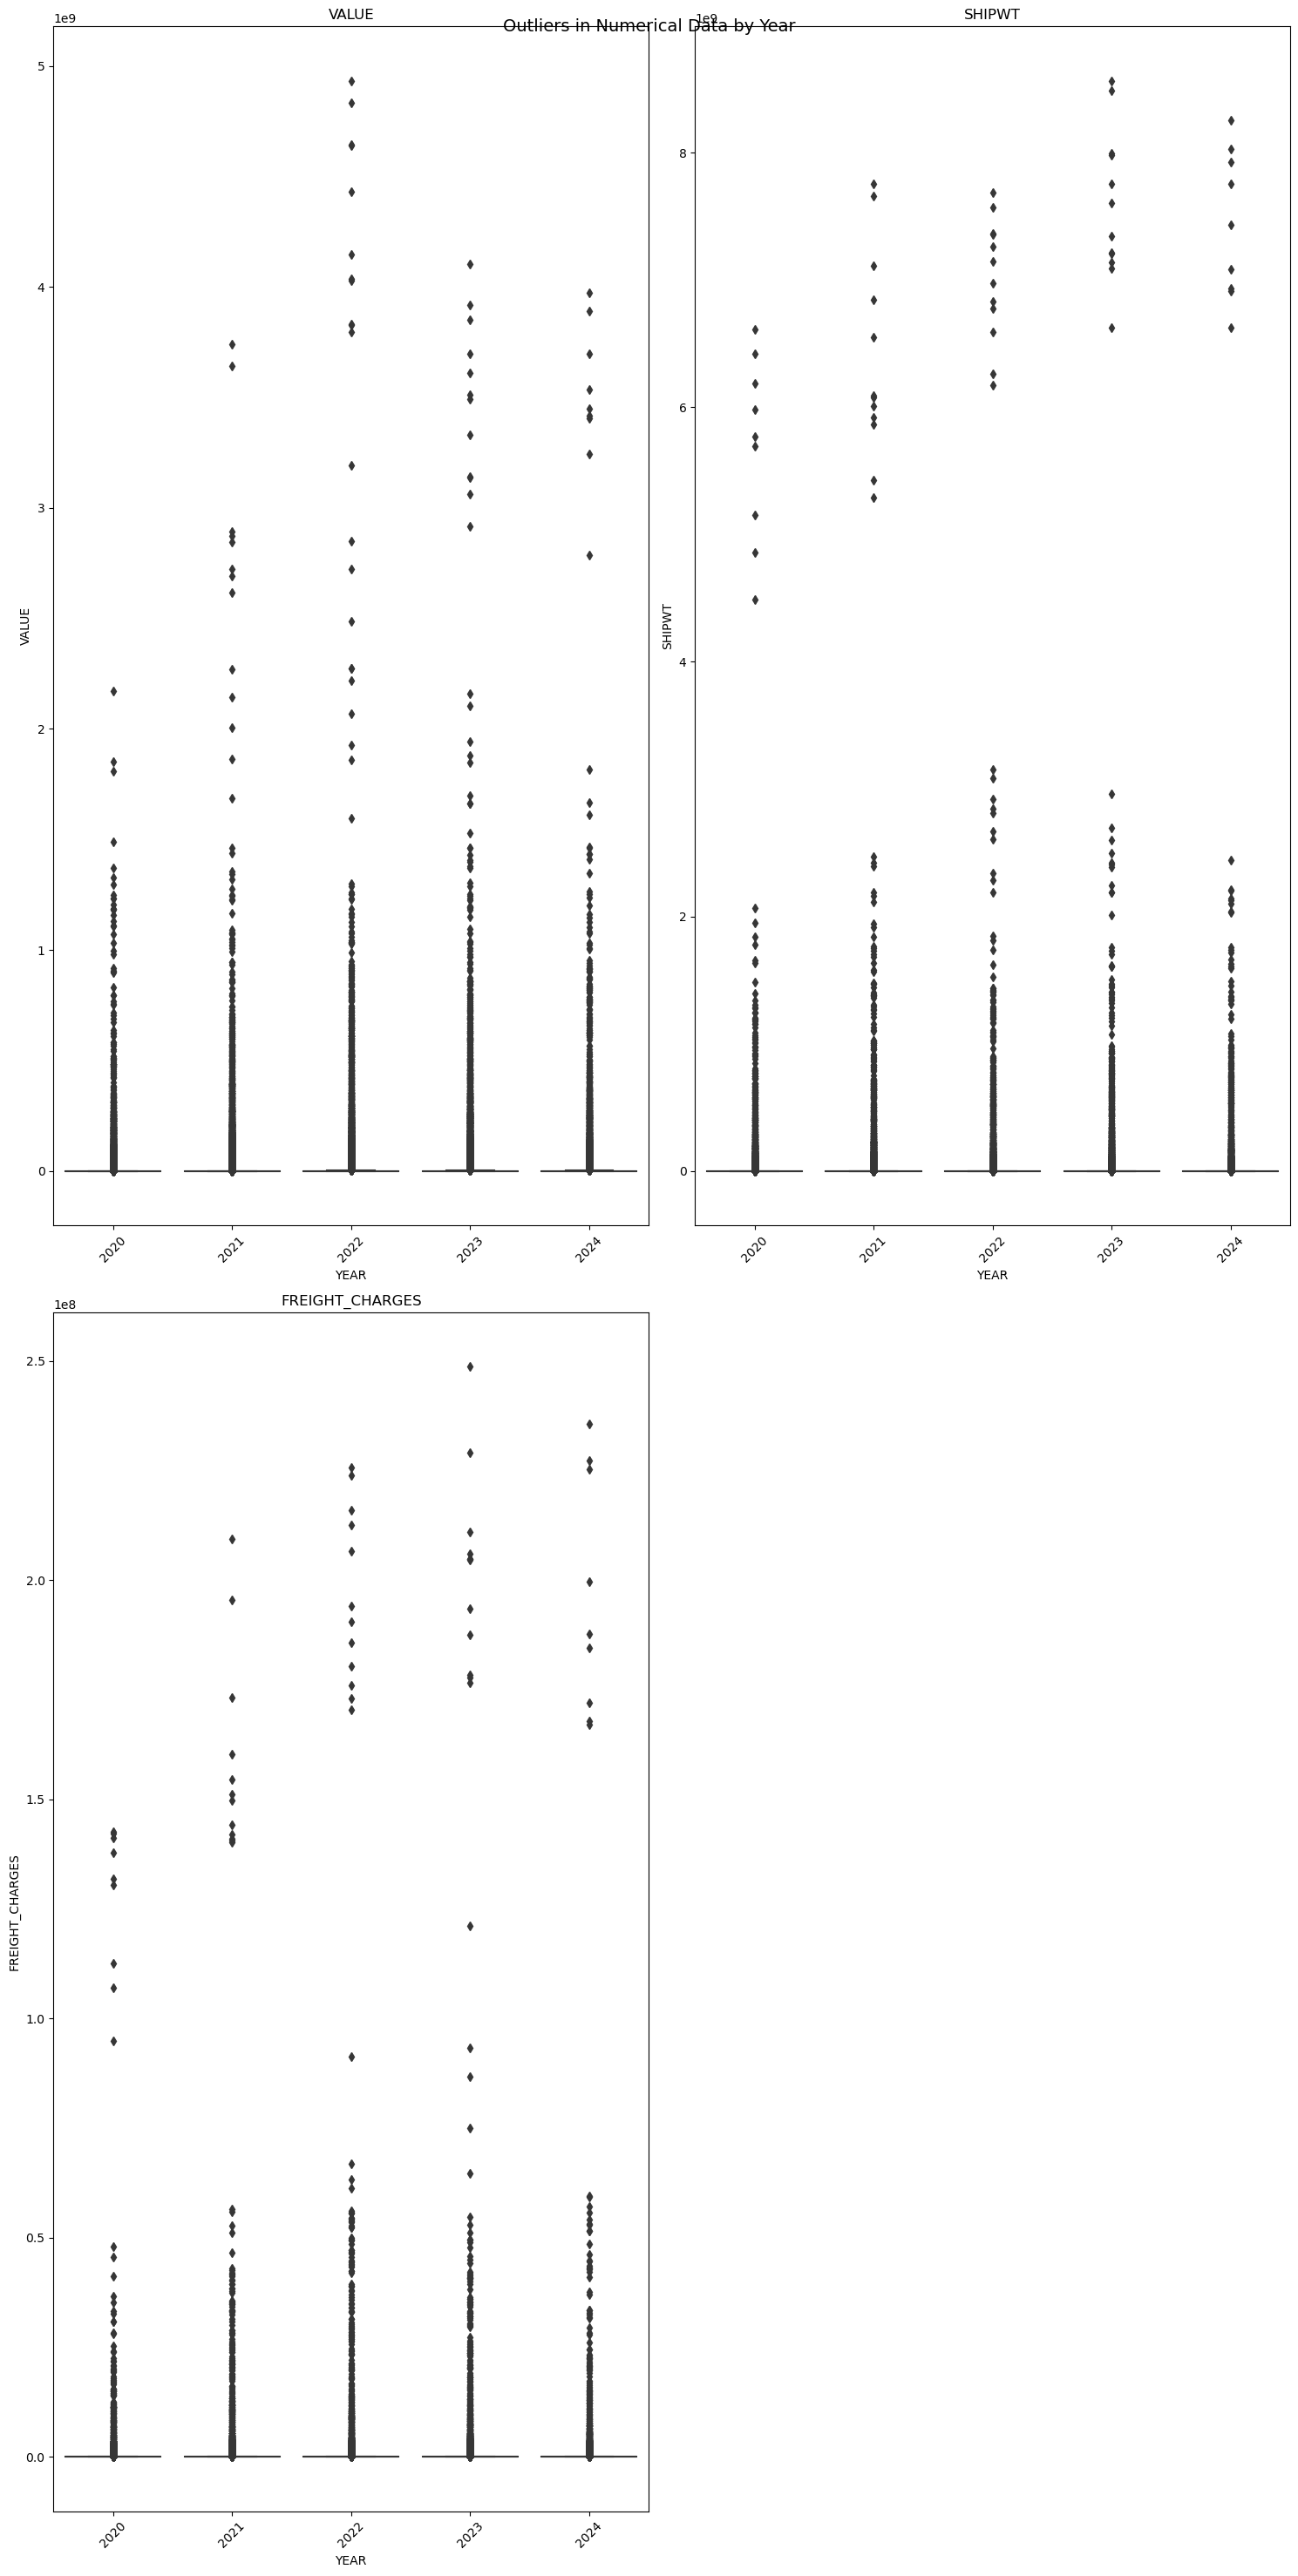

In [150]:
# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 30))
plt.suptitle('Outliers in Numerical Data by Year', fontsize=14)

# Plot VALUE by year (boxplot)
sns.boxplot(x='YEAR', y='VALUE', data=combined_dot2, palette='Blues', ax=axes[0, 0])
axes[0, 0].set_title('VALUE')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)

# Plot SHIPWT by year (boxplot)
sns.boxplot(x='YEAR', y='SHIPWT', data=combined_dot2, palette='Blues', ax=axes[0, 1])
axes[0, 1].set_title('SHIPWT')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)

# Plot FREIGHT_CHARGES by year (boxplot)
sns.boxplot(x='YEAR', y='FREIGHT_CHARGES', data=combined_dot2, palette='Blues', ax=axes[1, 0])
axes[1, 0].set_title('FREIGHT_CHARGES')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)

# Hide the bottom right subplot since it's not needed
axes[1, 1].axis('off')

# Improve layout to prevent overlapping labels
plt.tight_layout()
plt.show()


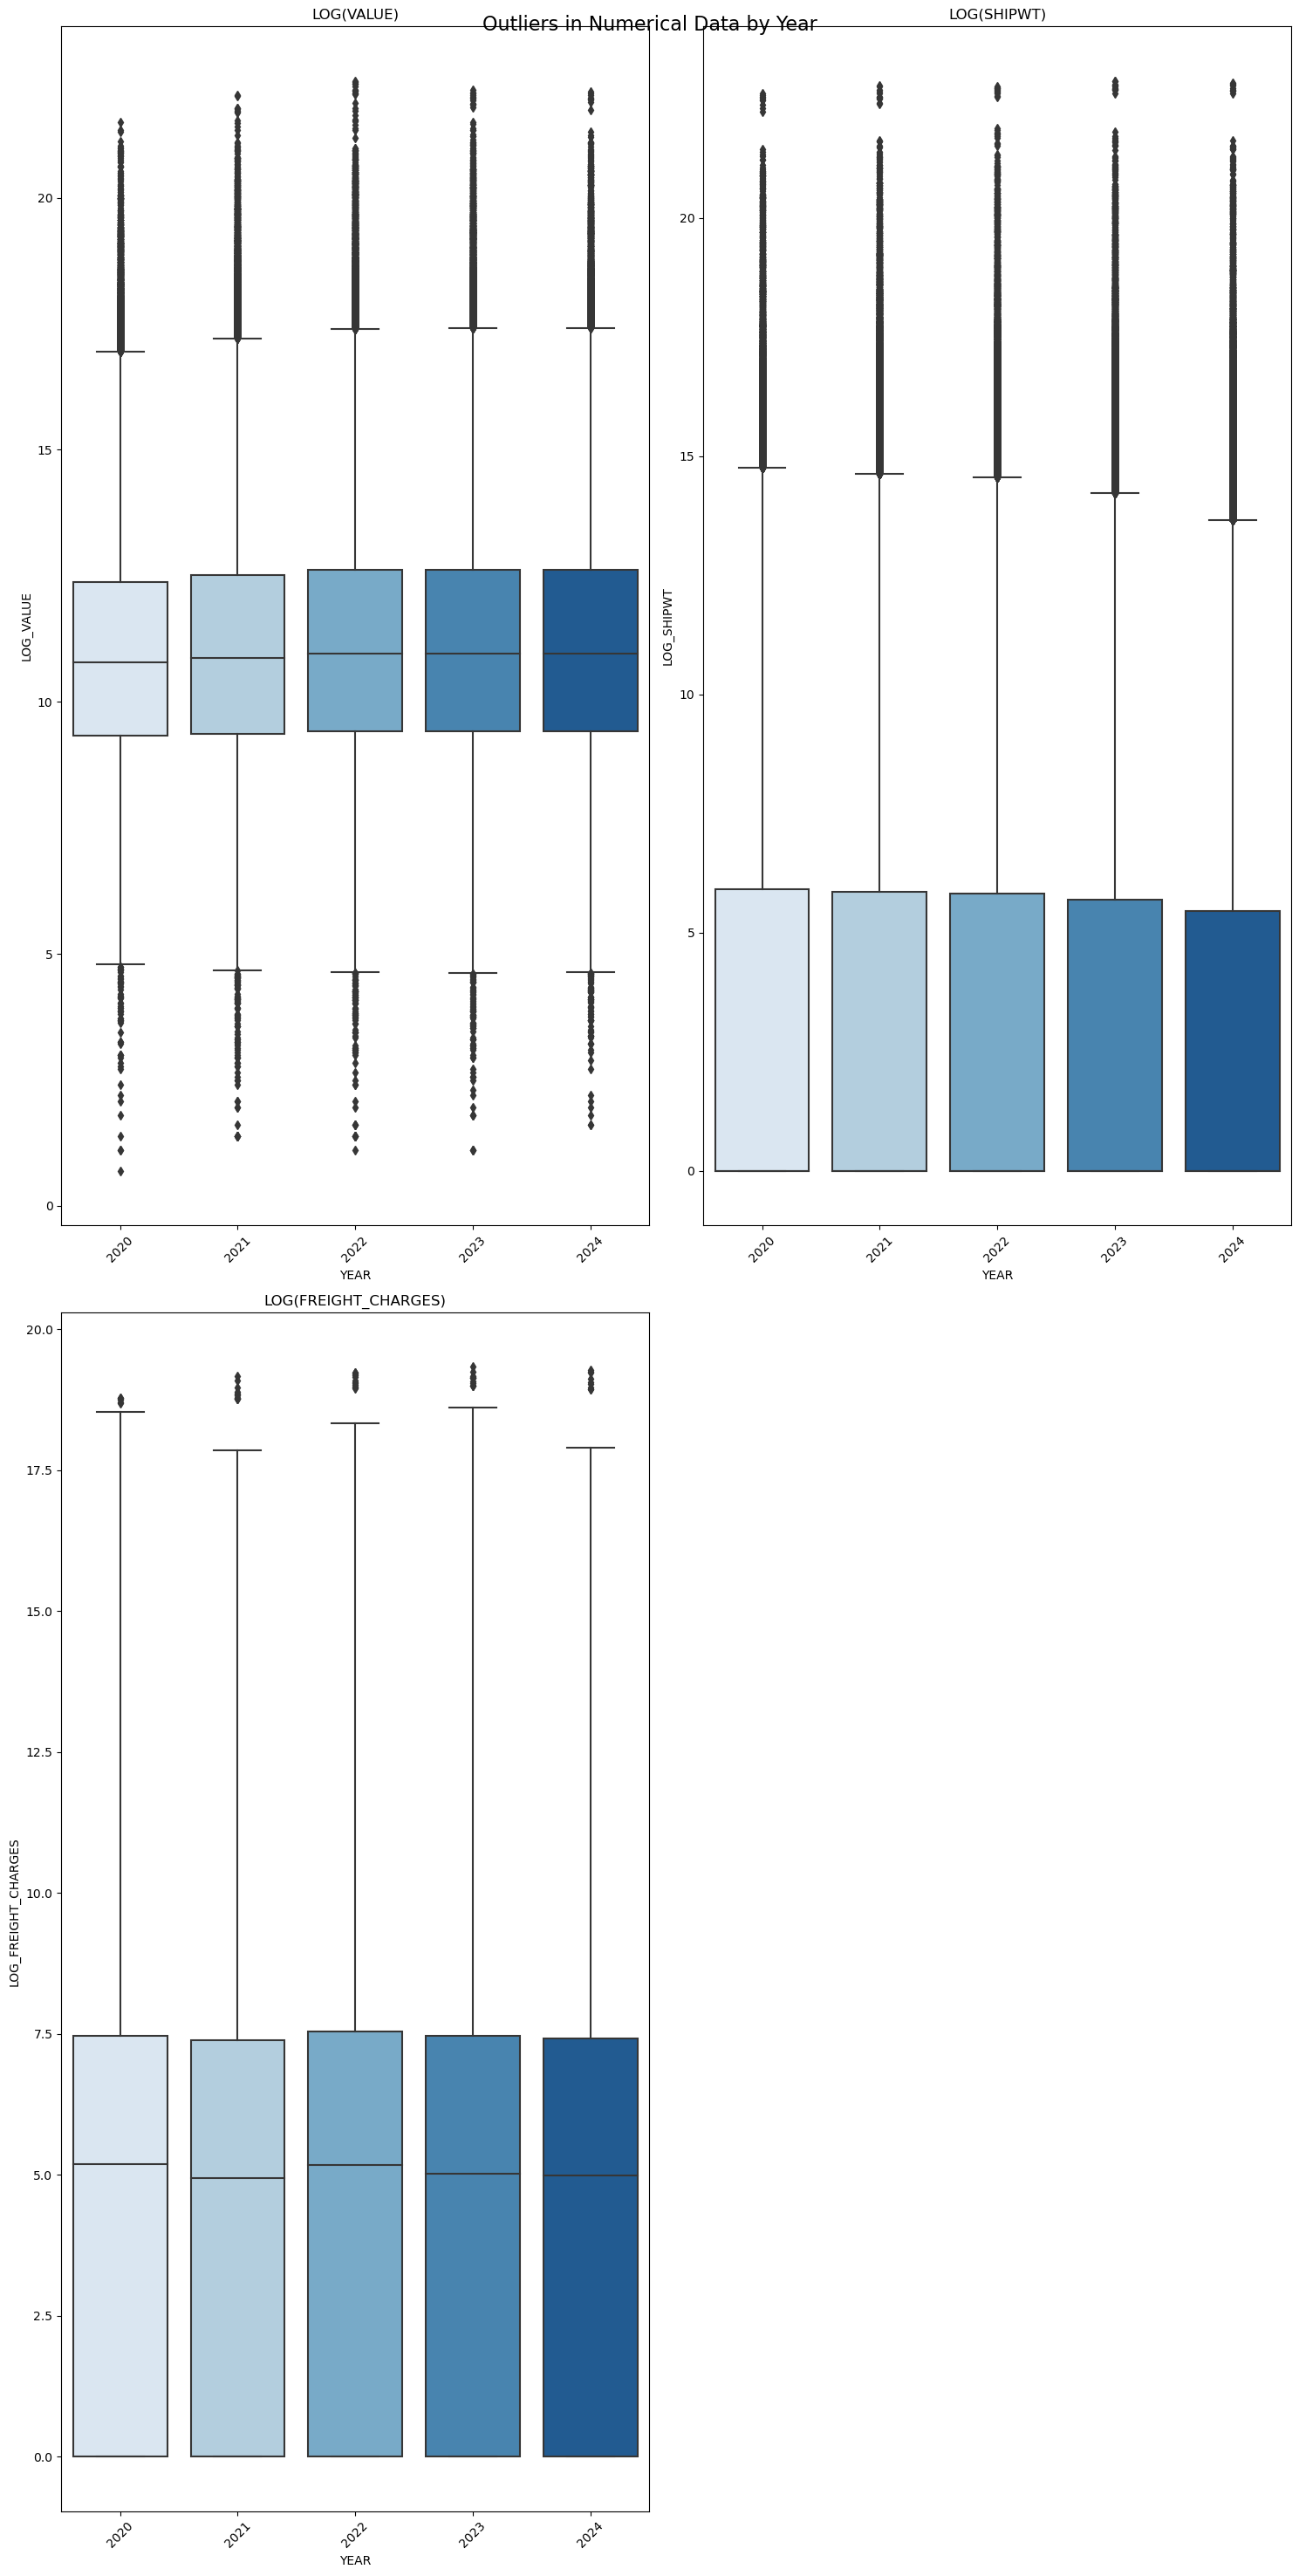

In [151]:
#Handling ouliers

# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 30))
plt.suptitle('Outliers in Numerical Data by Year', fontsize=16)

# Apply log transformation to the data (if values are positive)
combined_dot2['LOG_VALUE'] = np.log(combined_dot2['VALUE'] + 1) 
combined_dot2['LOG_SHIPWT'] = np.log(combined_dot2['SHIPWT'] + 1)
combined_dot2['LOG_FREIGHT_CHARGES'] = np.log(combined_dot2['FREIGHT_CHARGES'] + 1)

# Plot VALUE by year (boxplot)
sns.boxplot(x='YEAR', y='LOG_VALUE', data=combined_dot2, palette='Blues', ax=axes[0, 0])
axes[0, 0].set_title('LOG(VALUE)')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)

# Plot SHIPWT by year (boxplot)
sns.boxplot(x='YEAR', y='LOG_SHIPWT', data=combined_dot2, palette='Blues', ax=axes[0, 1])
axes[0, 1].set_title('LOG(SHIPWT)')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)

# Plot FREIGHT_CHARGES by year (boxplot)
sns.boxplot(x='YEAR', y='LOG_FREIGHT_CHARGES', data=combined_dot2, palette='Blues', ax=axes[1, 0])
axes[1, 0].set_title('LOG(FREIGHT_CHARGES)')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)

# Hide the bottom right subplot since it's not needed
axes[1, 1].axis('off')

# Improve layout to prevent overlapping labels
plt.tight_layout()
plt.show()

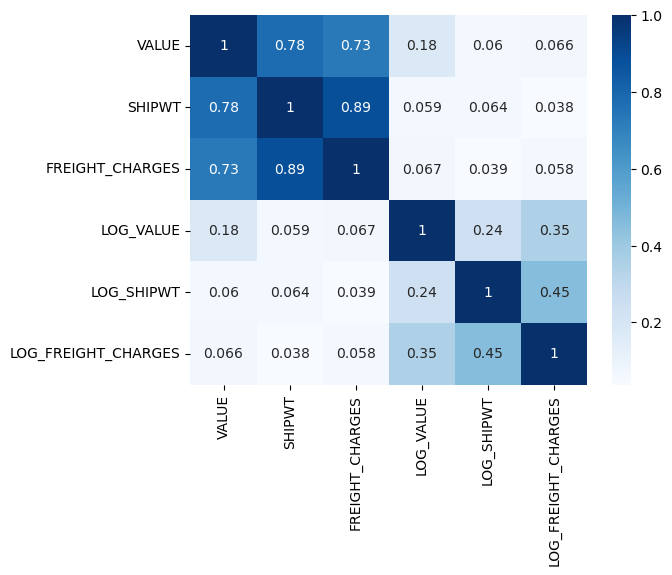

In [152]:
#Finding the correlation between numerical variables
# Create correlation matrix
correlation = combined_dot2.select_dtypes("number").corr()
correlation

# Plot heatmap of `correlation`
sns.heatmap(correlation,annot = correlation,cmap = 'Blues');

### Univariate Analysis

#### Numerical

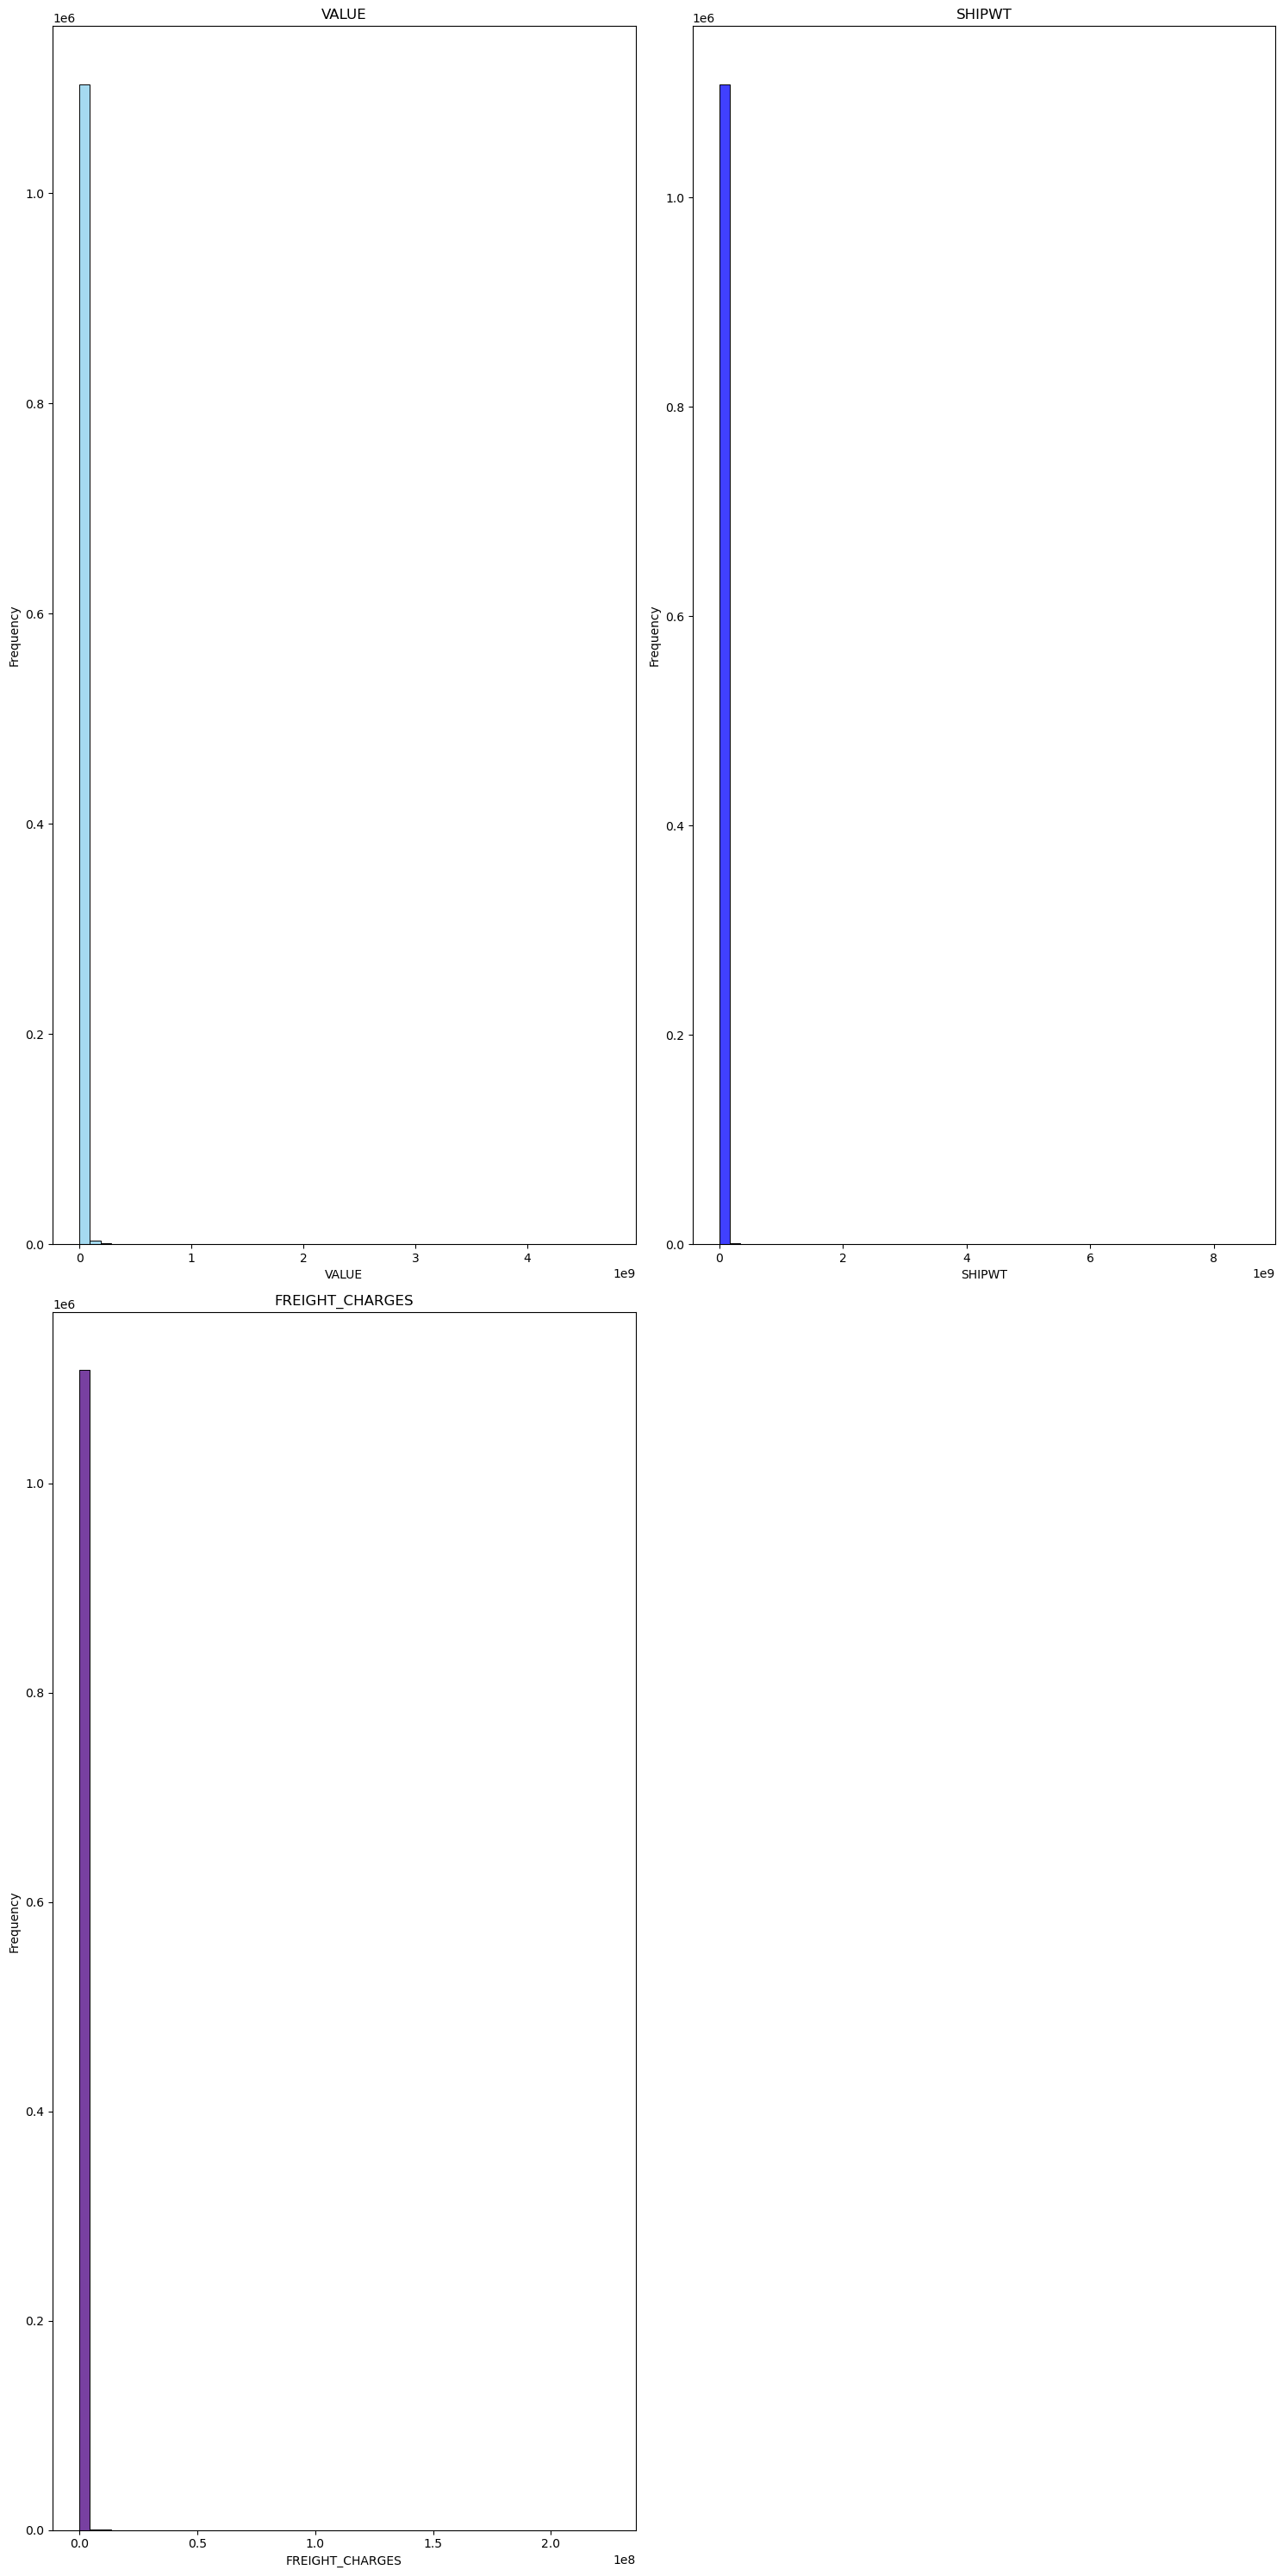

In [153]:
sampled_data = combined_dot1.sample(frac=0.8, random_state=42)  # 10% sample

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 30))

# Plot 'VALUE' as a histogram for the sampled dataset
sns.histplot(data=sampled_data, x='VALUE', kde=False, color='skyblue', ax=axes[0, 0], bins=50)
axes[0, 0].set_title('VALUE')
axes[0, 0].set_xlabel('VALUE')
axes[0, 0].set_ylabel('Frequency')

# Plot 'SHIPWT' as a histogram for the sampled dataset
sns.histplot(data=sampled_data, x='SHIPWT', kde=False, color='Blue', ax=axes[0, 1], bins=50)
axes[0, 1].set_title('SHIPWT')
axes[0, 1].set_xlabel('SHIPWT')
axes[0, 1].set_ylabel('Frequency')

# Plot 'FREIGHT_CHARGES' as a histogram for the sampled dataset
sns.histplot(data=sampled_data, x='FREIGHT_CHARGES', kde=False, color='indigo', ax=axes[1, 0], bins=50)
axes[1, 0].set_title('FREIGHT_CHARGES')
axes[1, 0].set_xlabel('FREIGHT_CHARGES')
axes[1, 0].set_ylabel('Frequency')

axes[1,1].axis('off')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


#### Categorical

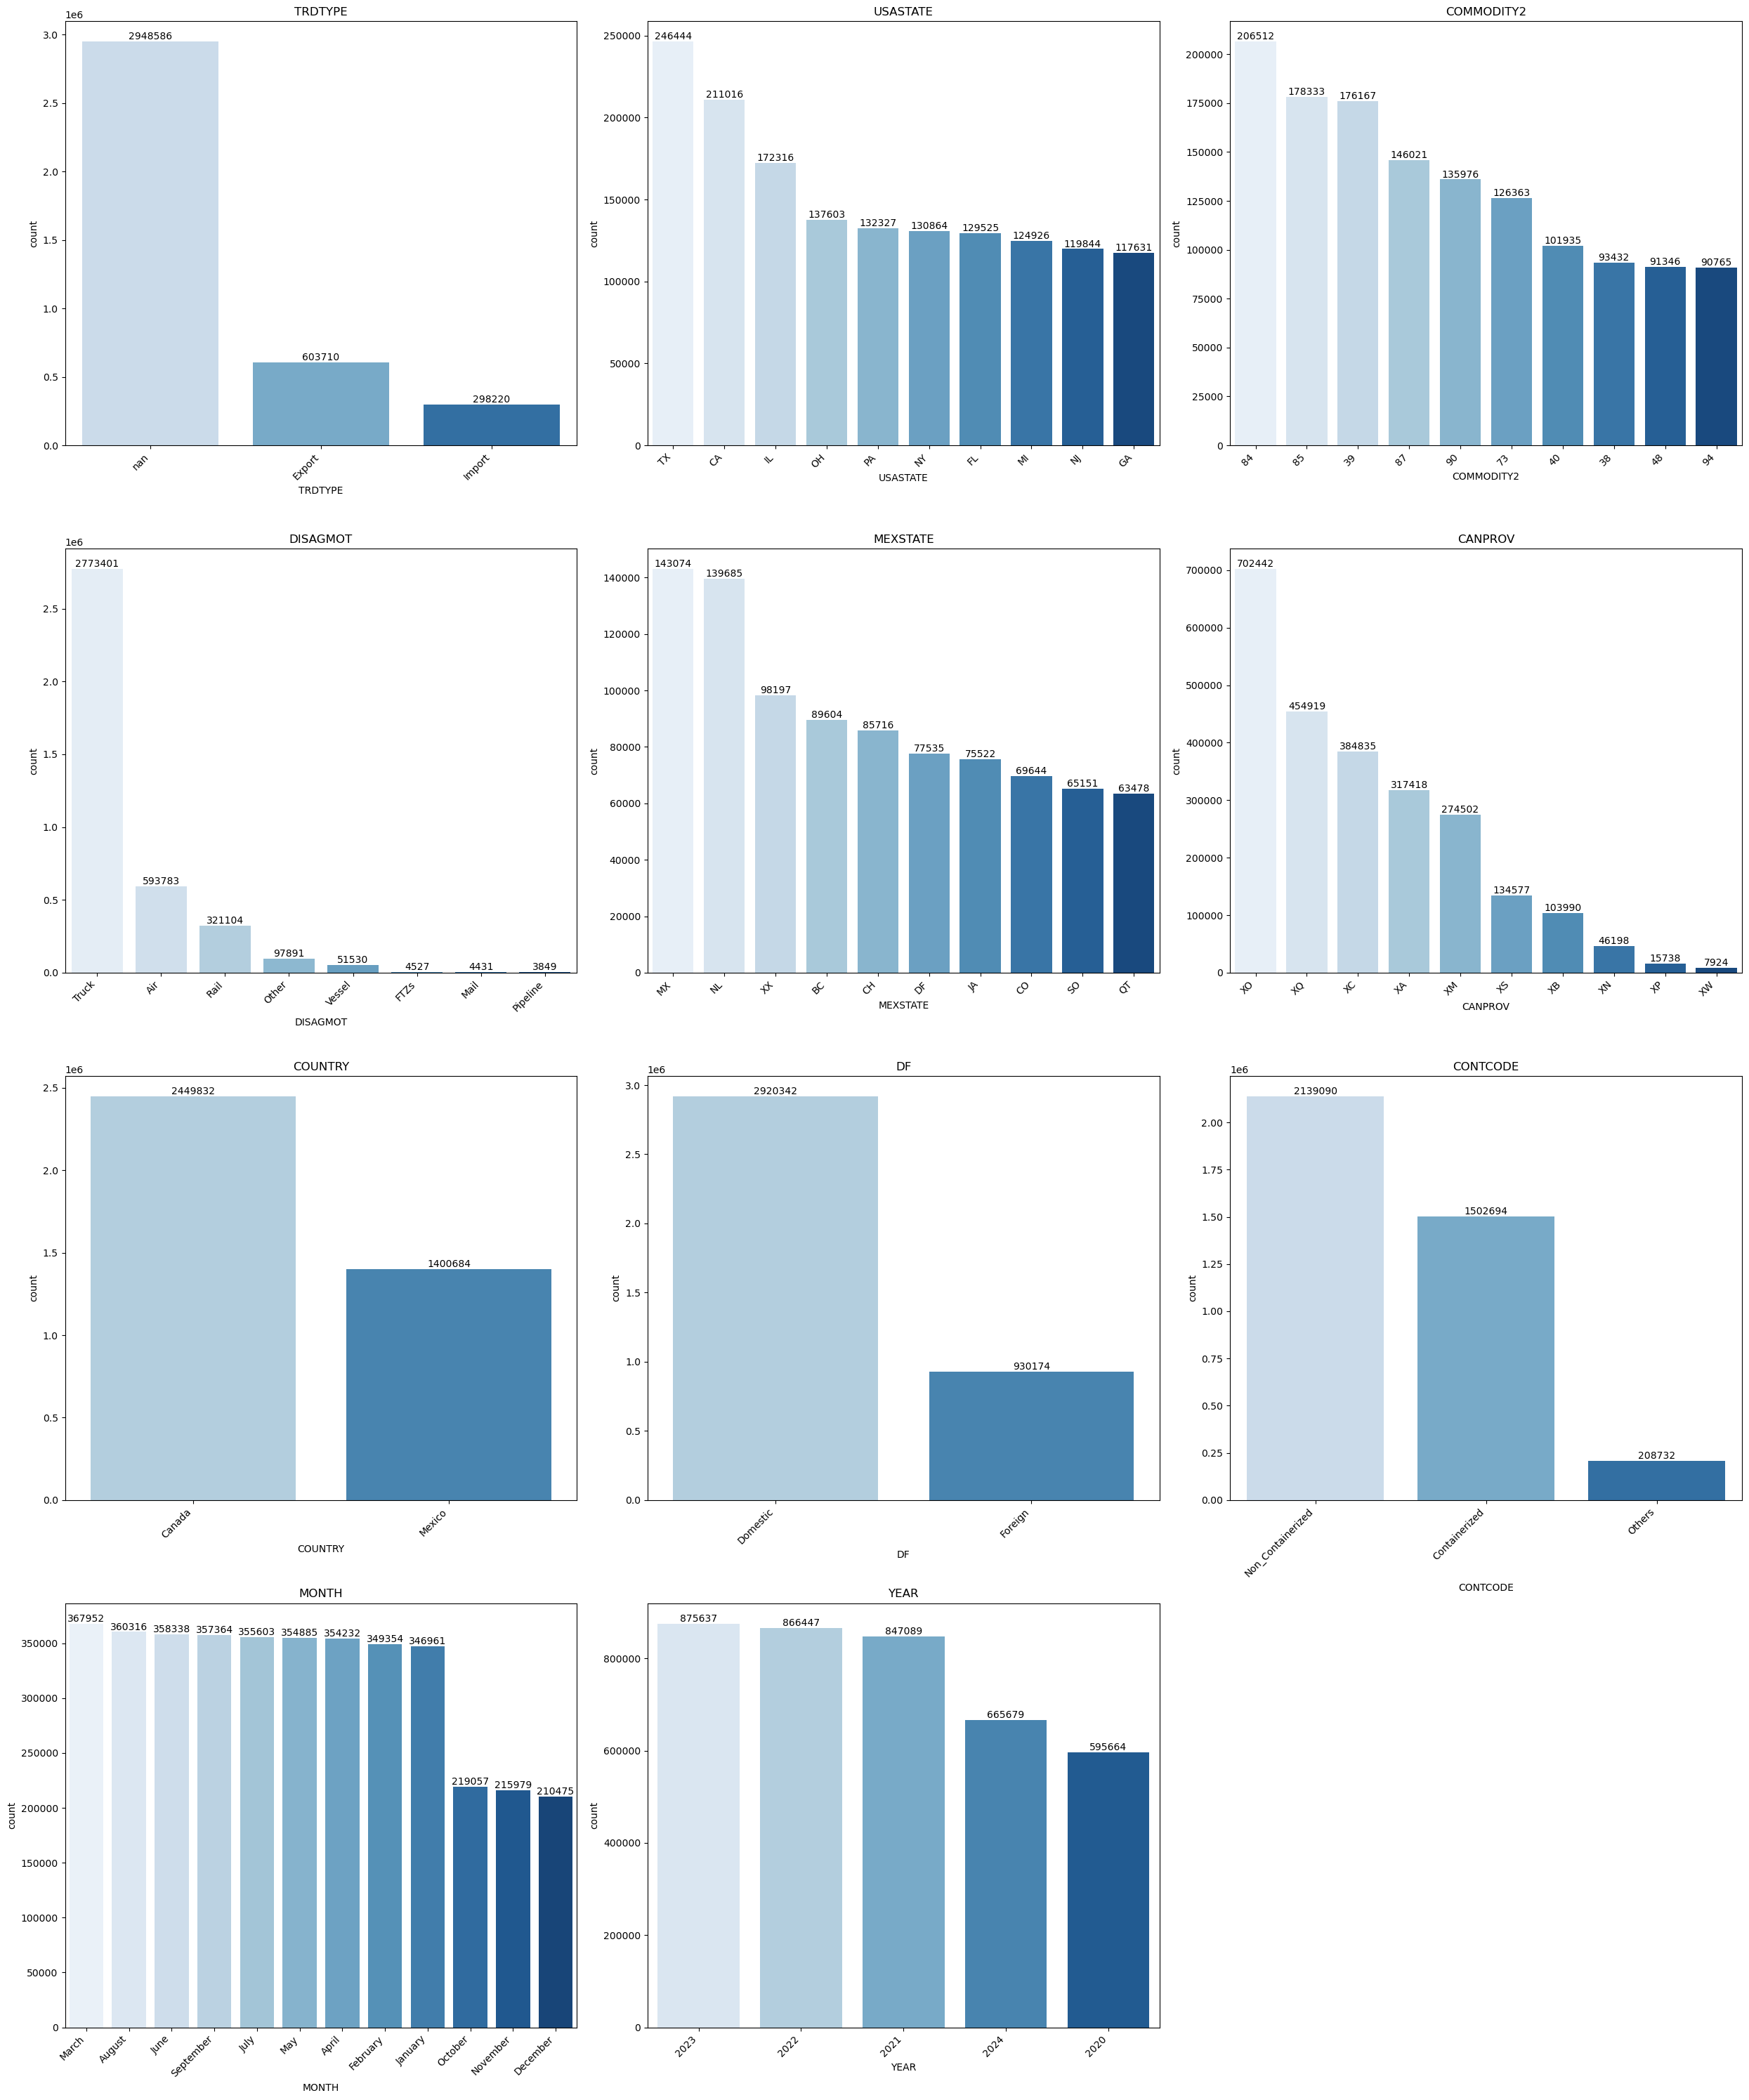

In [154]:
# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25, 30))

# Define a function to add count labels to the bars
def add_count_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')

# Plot 'TRDTYPE'
sns.countplot(x="TRDTYPE", data=combined_dot2, palette='Blues', ax=axes[0, 0], order=combined_dot2['TRDTYPE'].value_counts().index)
axes[0, 0].set_title('TRDTYPE')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')
add_count_labels(axes[0, 0])

# Plot 'USASTATE' (Top 10)
top_usa_states = combined_dot2['USASTATE'].value_counts().nlargest(10).index
sns.countplot(x="USASTATE", data=combined_dot2, palette='Blues', ax=axes[0, 1], order=top_usa_states)
axes[0, 1].set_title('USASTATE')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')
add_count_labels(axes[0, 1])

# Plot 'DEPE' (Top 10)
top_depe = combined_dot2['COMMODITY2'].value_counts().nlargest(10).index
sns.countplot(x="COMMODITY2", data=combined_dot2, palette='Blues', ax=axes[0, 2], order=top_depe)
axes[0, 2].set_title('COMMODITY2')
axes[0, 2].set_xticklabels(axes[0, 2].get_xticklabels(), rotation=45, ha='right')
add_count_labels(axes[0, 2])

# Plot 'DISAGMOT'
sns.countplot(x="DISAGMOT", data=combined_dot2, palette='Blues', ax=axes[1, 0], order=combined_dot2['DISAGMOT'].value_counts().index)
axes[1, 0].set_title('DISAGMOT')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')
add_count_labels(axes[1, 0])

# Plot 'MEXSTATE'
top_mexstate = combined_dot2['MEXSTATE'].value_counts().nlargest(10).index
sns.countplot(x="MEXSTATE", data=combined_dot2, palette='Blues', ax=axes[1, 1], order=top_mexstate)
axes[1, 1].set_title('MEXSTATE')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')
add_count_labels(axes[1, 1])

# Plot 'CANPROV' (Top 10)
top_canprov = combined_dot2['CANPROV'].value_counts().nlargest(10).index
sns.countplot(x="CANPROV", data=combined_dot2, palette='Blues', ax=axes[1, 2], order=top_canprov)
axes[1, 2].set_title('CANPROV')
axes[1, 2].set_xticklabels(axes[1, 2].get_xticklabels(), rotation=45, ha='right')
add_count_labels(axes[1, 2])

# Plot 'COUNTRY'
sns.countplot(x="COUNTRY", data=combined_dot2, palette='Blues', ax=axes[2, 0], order=combined_dot2['COUNTRY'].value_counts().index)
axes[2, 0].set_title("COUNTRY")
axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=45, ha='right')
add_count_labels(axes[2, 0])

# Plot 'DF'
sns.countplot(x="DF", data=combined_dot2, palette='Blues', ax=axes[2, 1], order=combined_dot2['DF'].value_counts().index)
axes[2, 1].set_title("DF")
axes[2, 1].set_xticklabels(axes[2, 1].get_xticklabels(), rotation=45, ha='right')
add_count_labels(axes[2, 1])

# Plot 'CONTCODE'
sns.countplot(x="CONTCODE", data=combined_dot2, palette='Blues', ax=axes[2, 2], order=combined_dot2['CONTCODE'].value_counts().index)
axes[2, 2].set_title("CONTCODE")
axes[2, 2].set_xticklabels(axes[2, 2].get_xticklabels(), rotation=45, ha='right')
add_count_labels(axes[2, 2])

# Plot 'MONTH'
sns.countplot(x="MONTH", data=combined_dot2, palette='Blues', ax=axes[3, 0], order=combined_dot2['MONTH'].value_counts().index)
axes[3, 0].set_title("MONTH")
axes[3, 0].set_xticklabels(axes[3, 0].get_xticklabels(), rotation=45, ha='right')
add_count_labels(axes[3, 0])

# Plot 'YEAR'
sns.countplot(x="YEAR", data=combined_dot2, palette='Blues', ax=axes[3, 1], order=combined_dot2['YEAR'].value_counts().index)
axes[3, 1].set_title("YEAR")
axes[3, 1].set_xticklabels(axes[3, 1].get_xticklabels(), rotation=45, ha='right')
add_count_labels(axes[3, 1])

# Turn off unnecessary axes
axes[3, 2].axis('off')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


### Bivariate Analysis

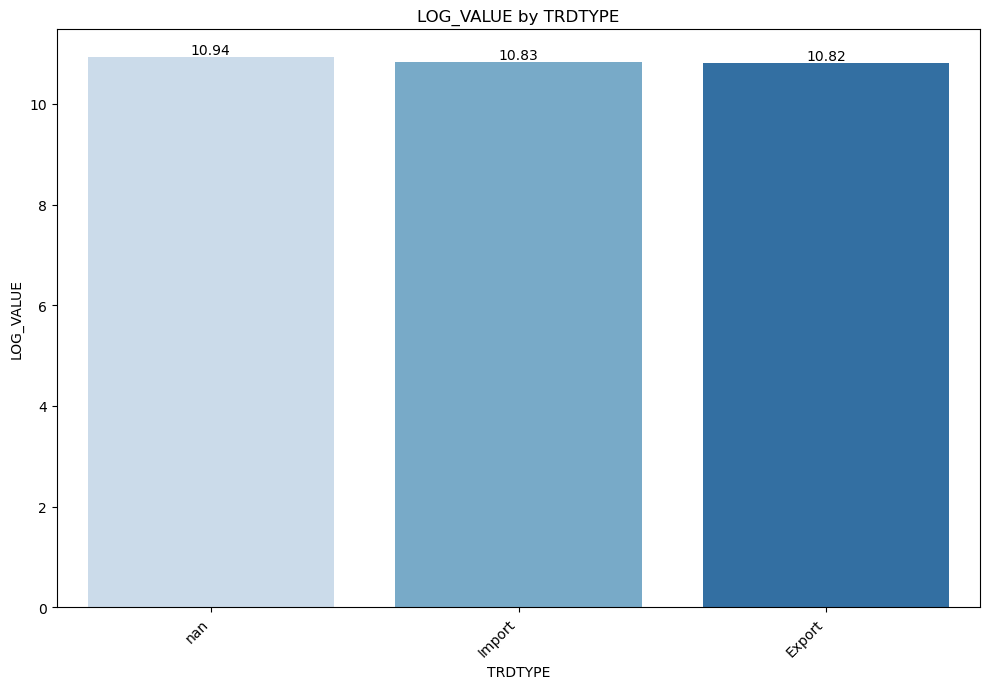

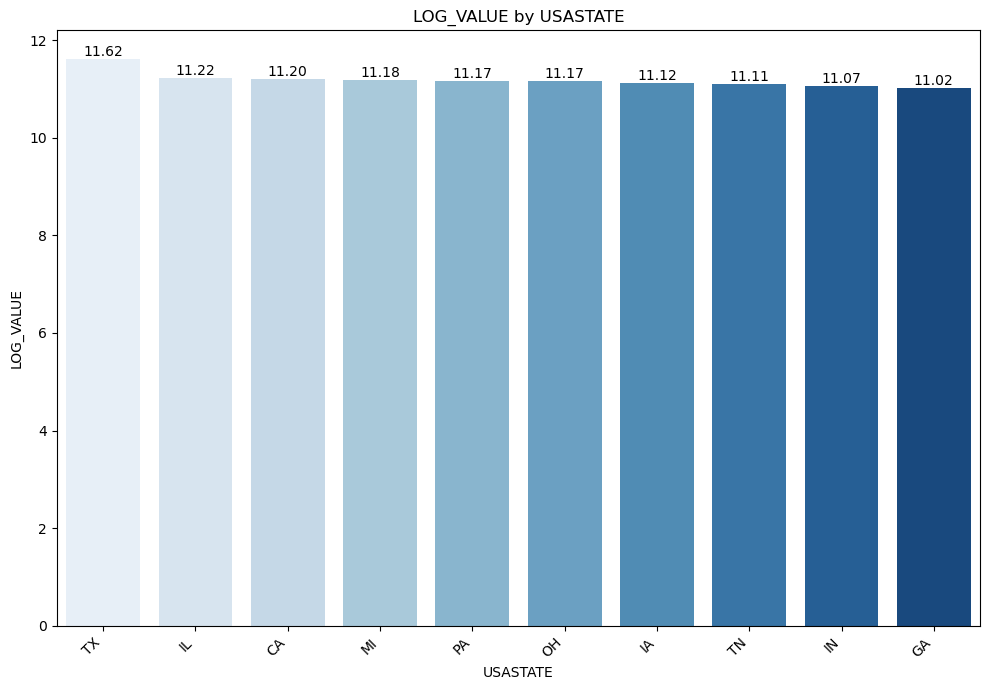

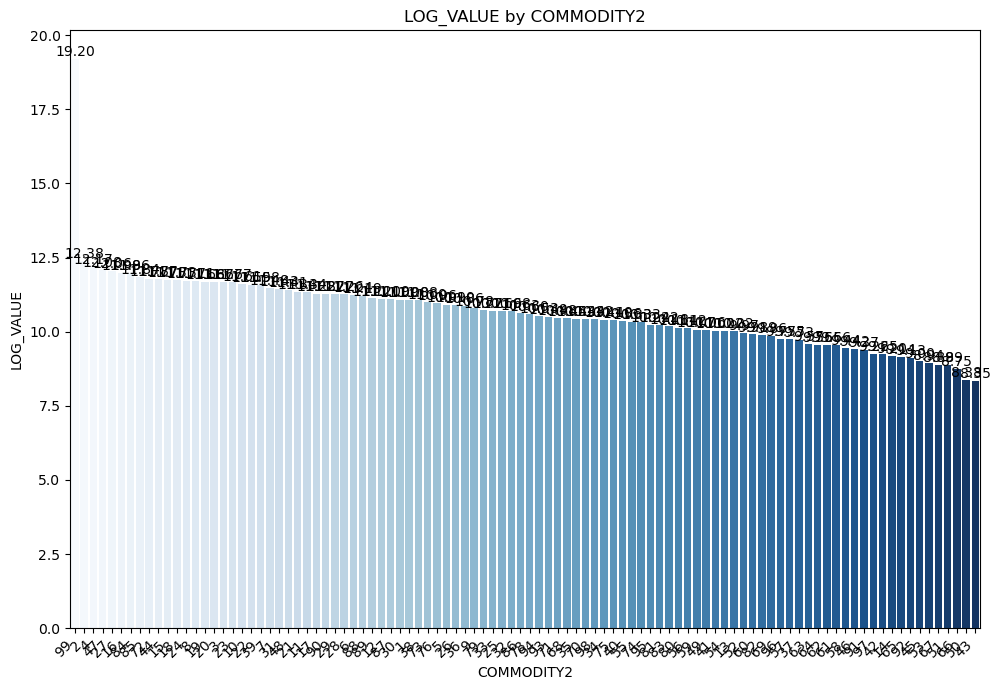

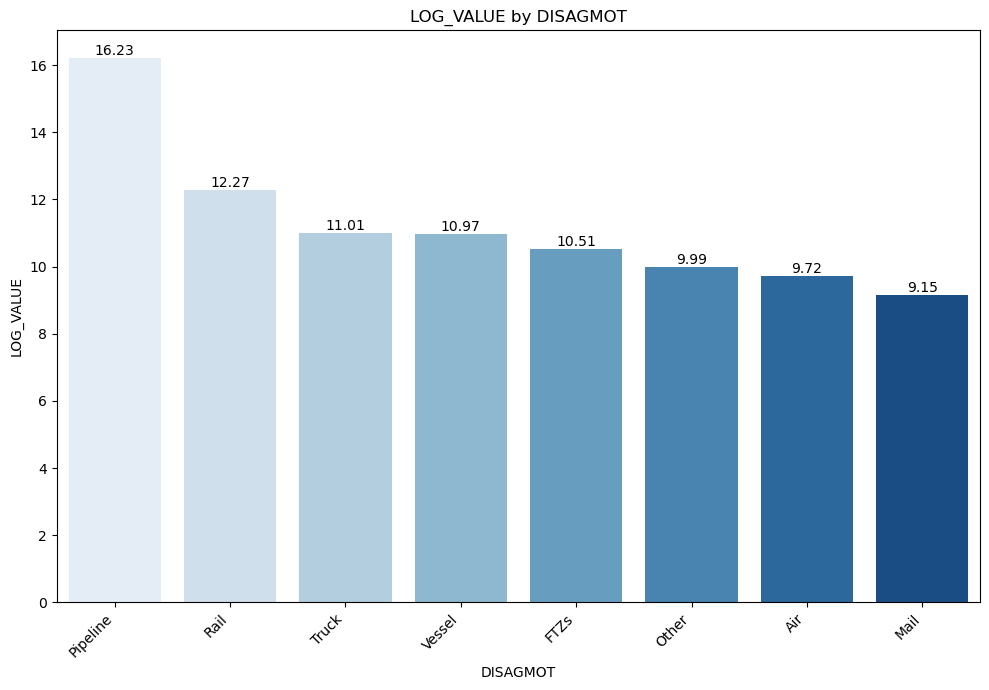

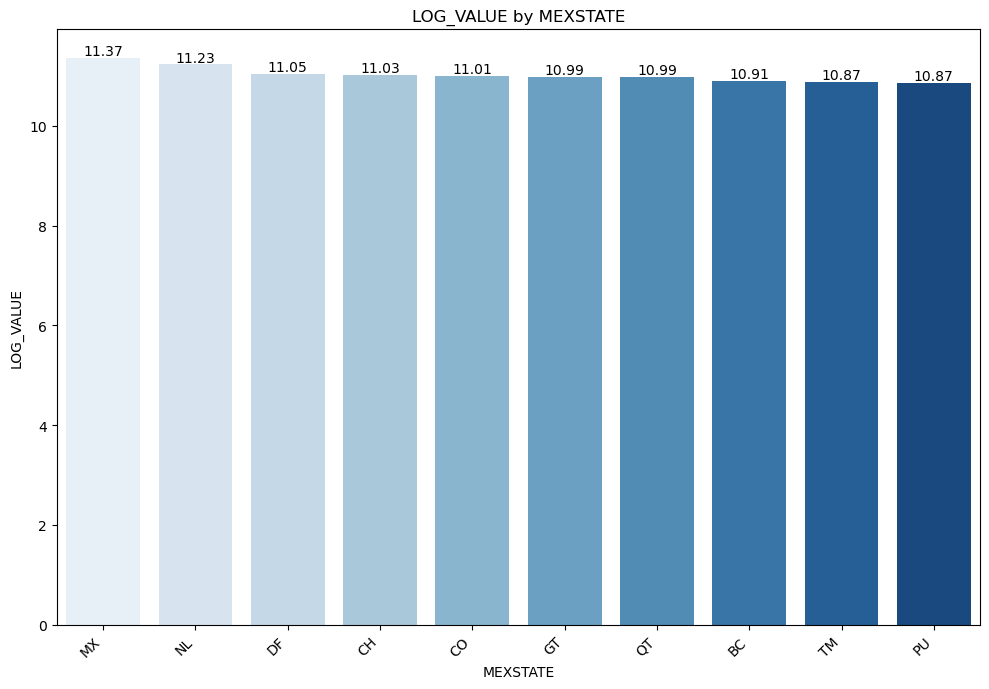

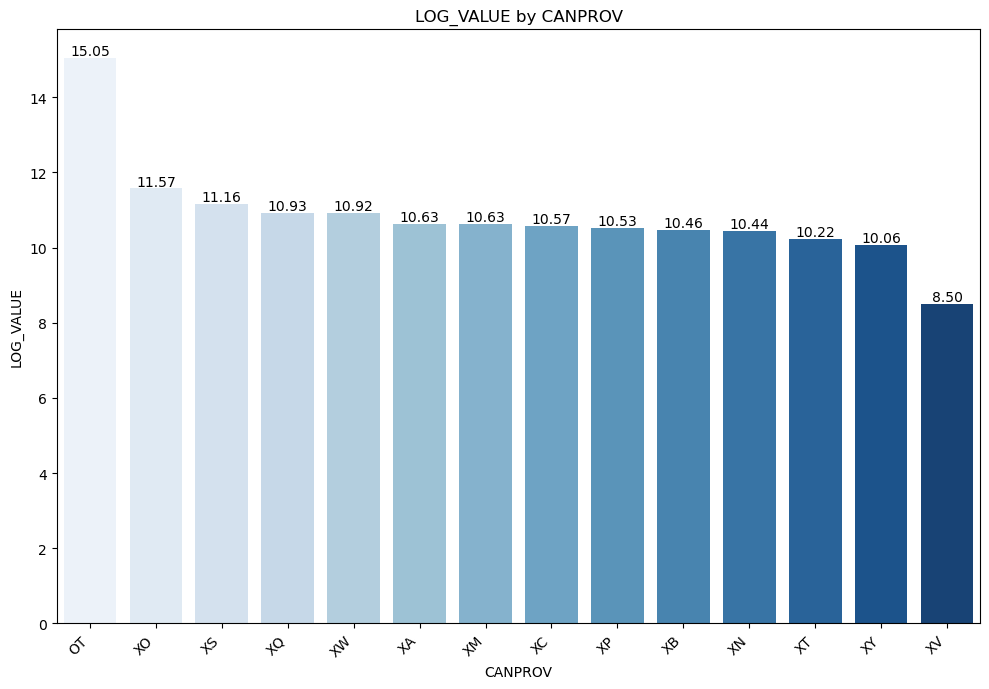

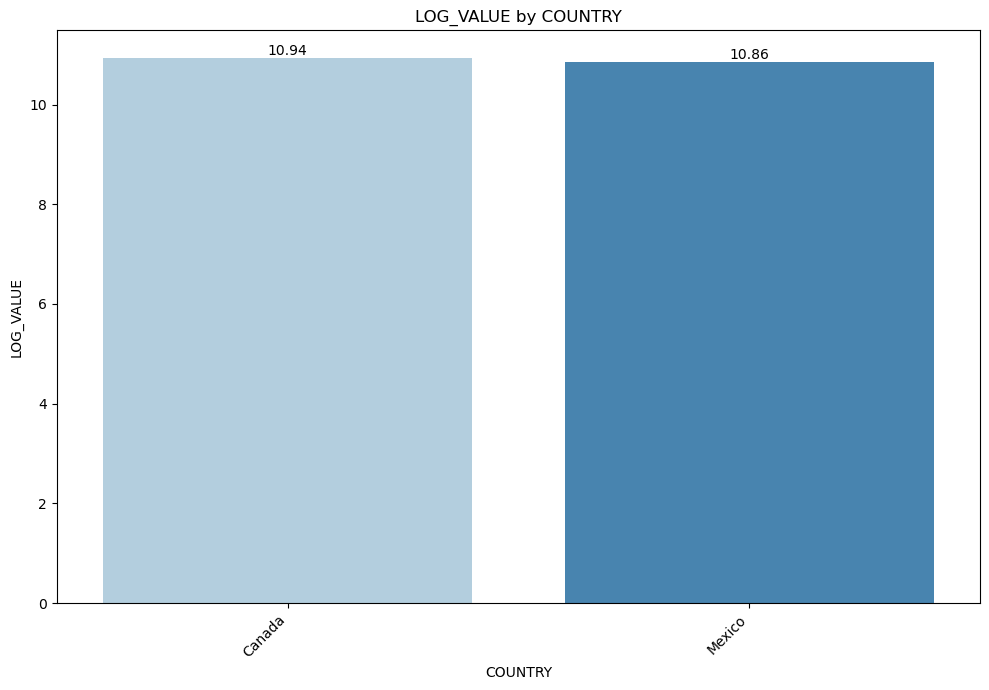

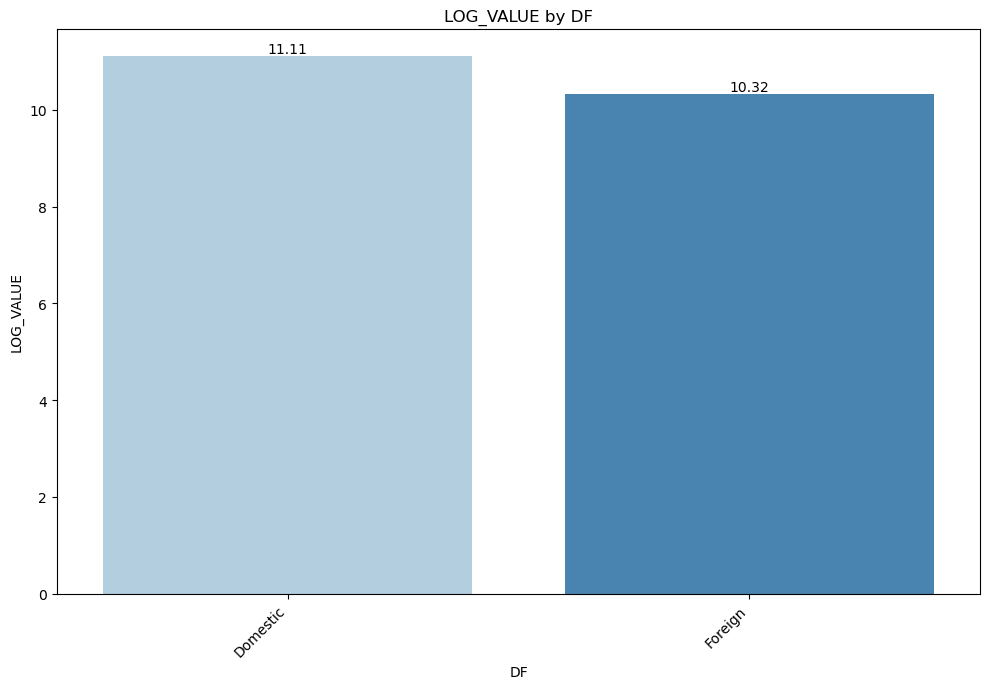

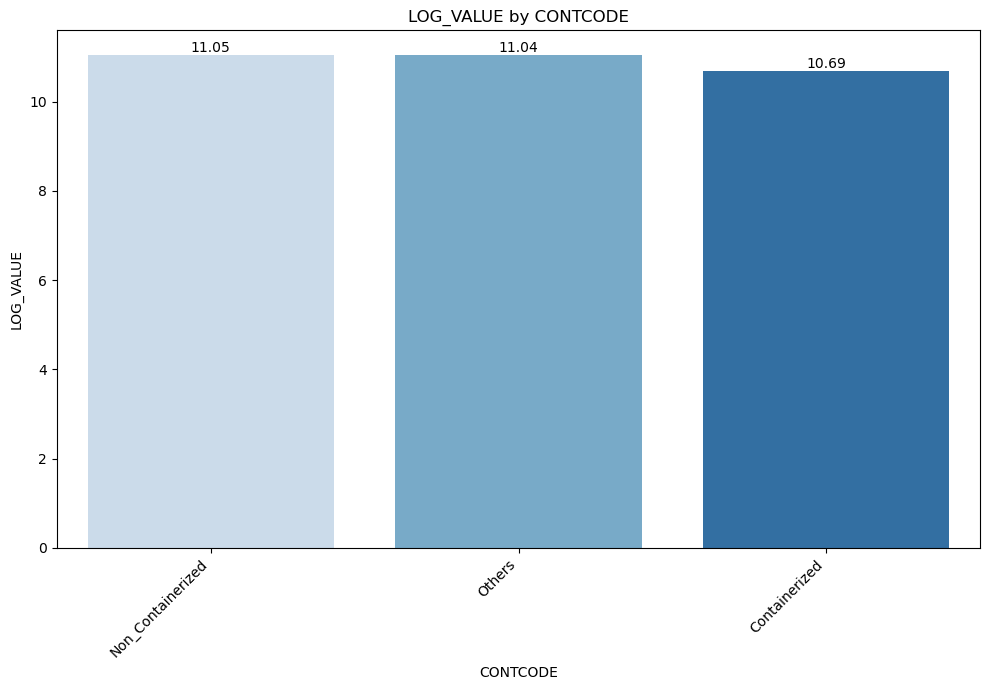

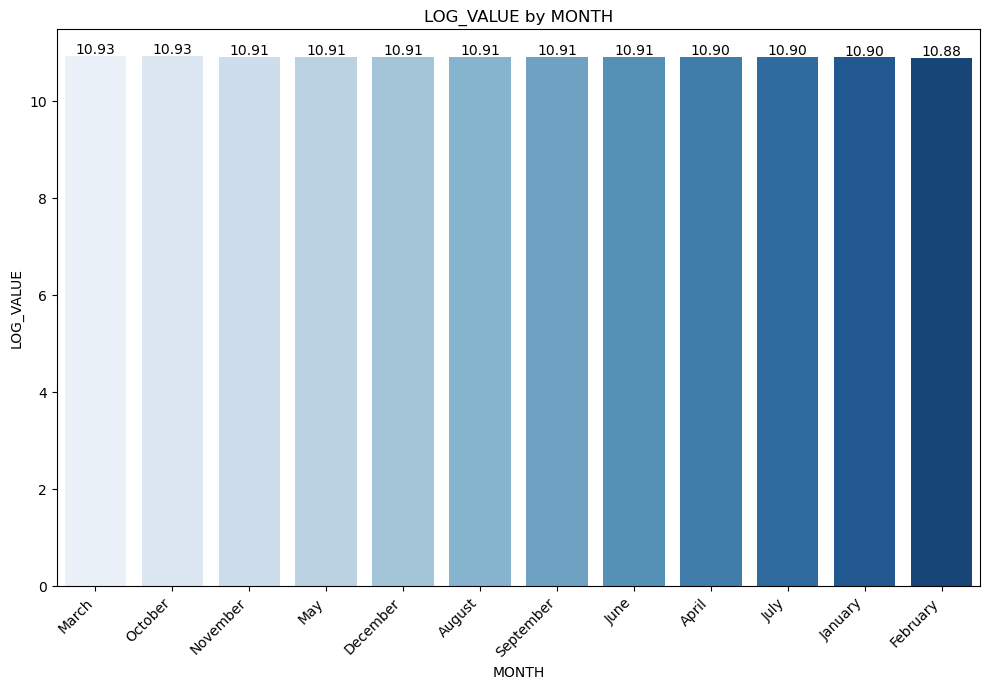

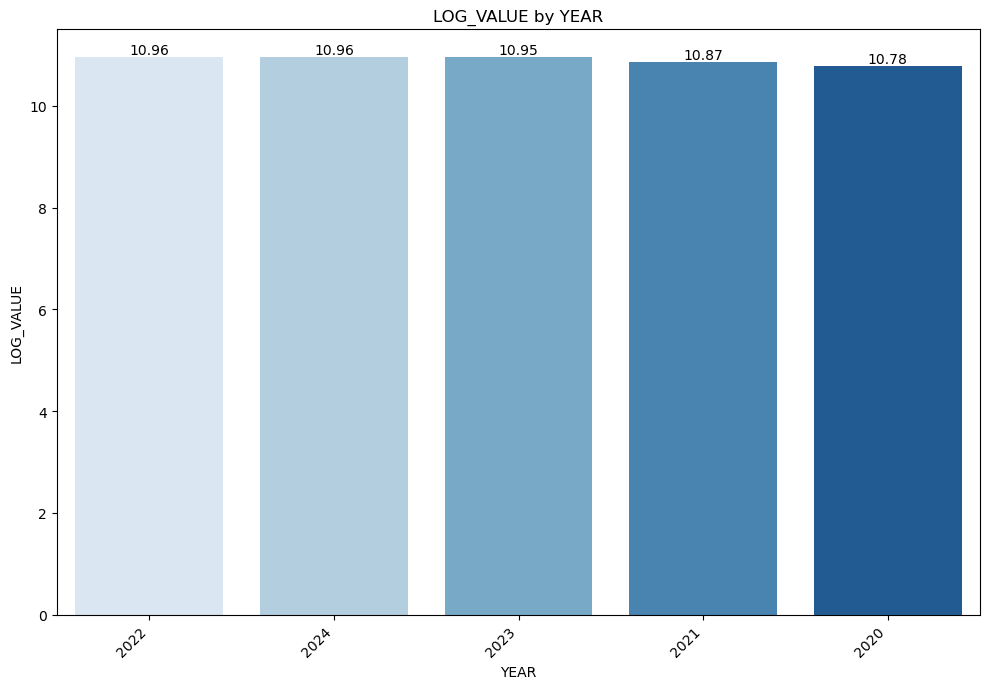

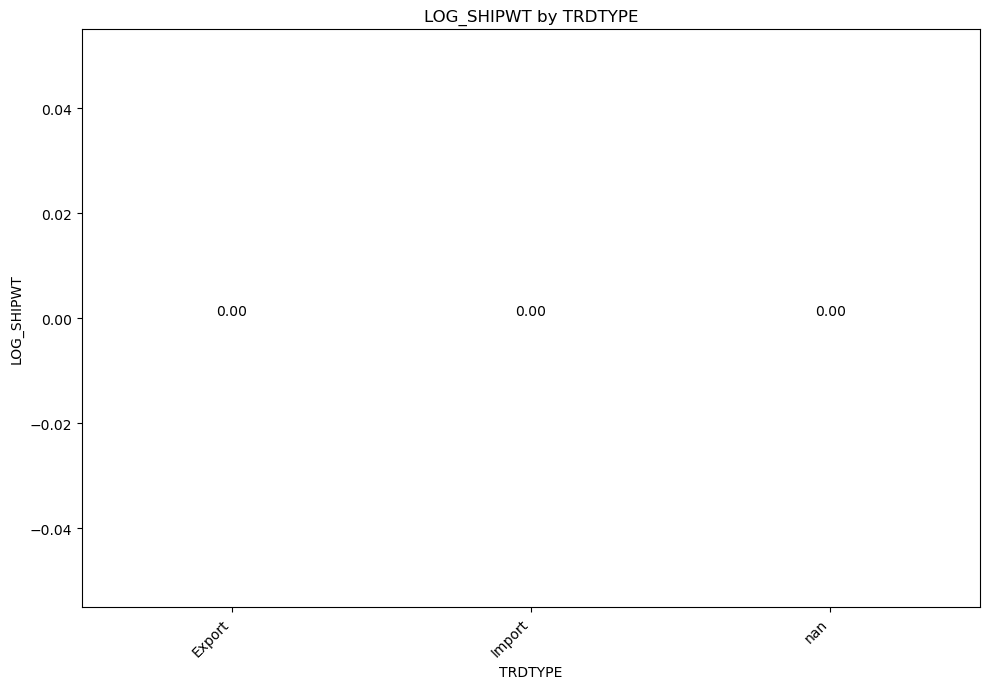

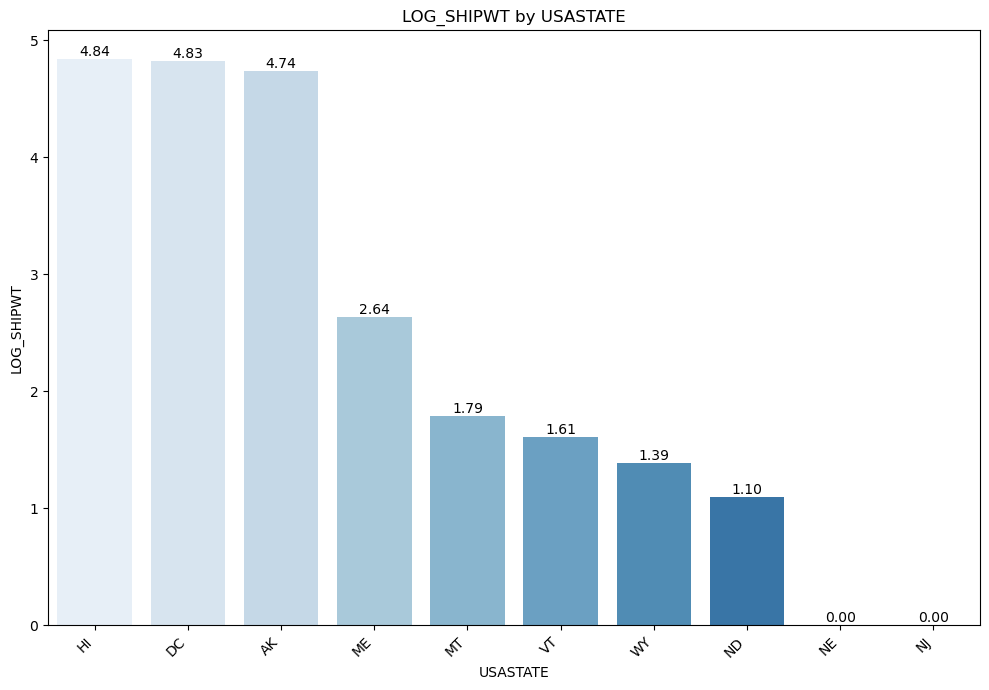

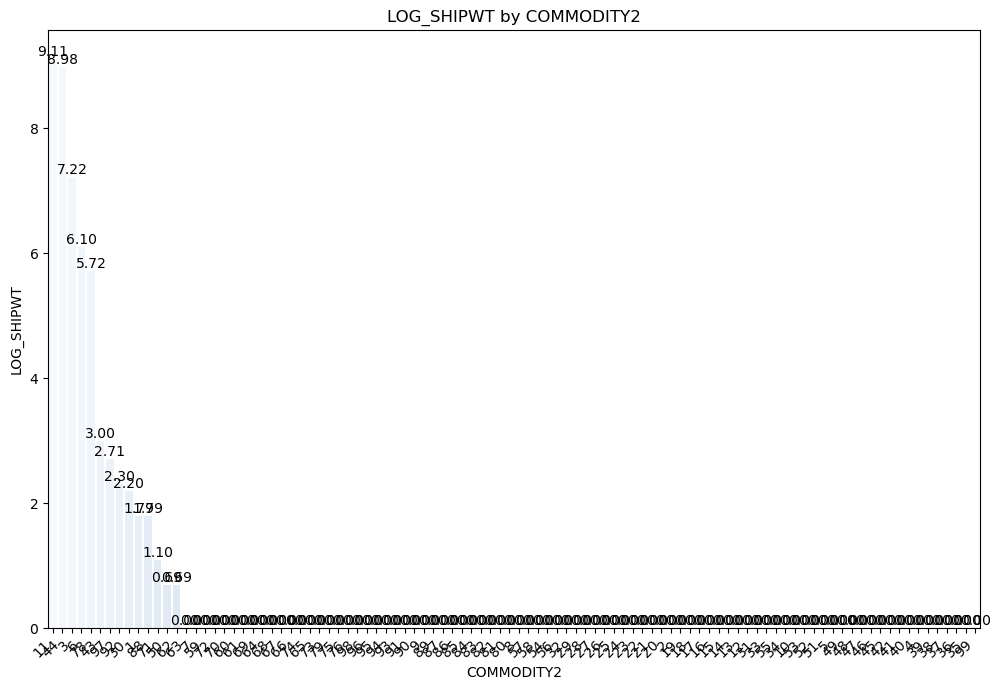

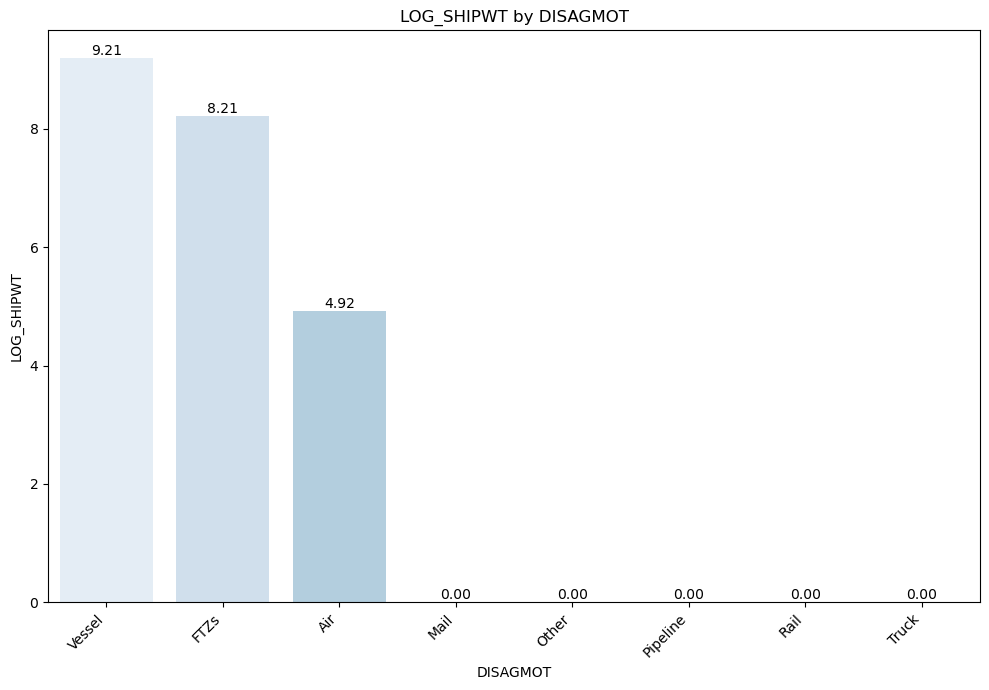

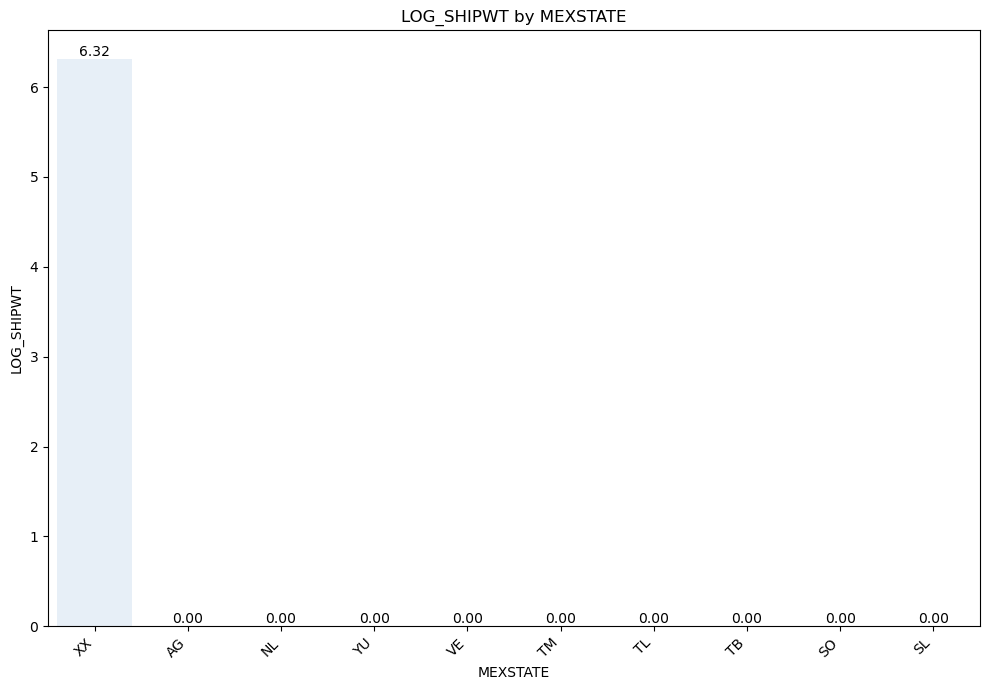

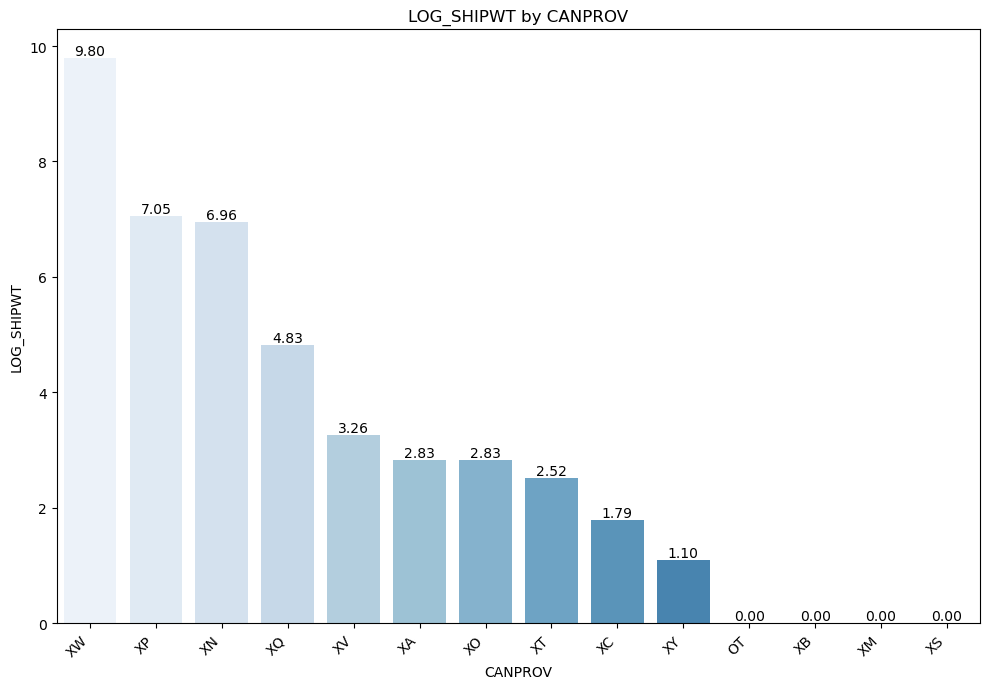

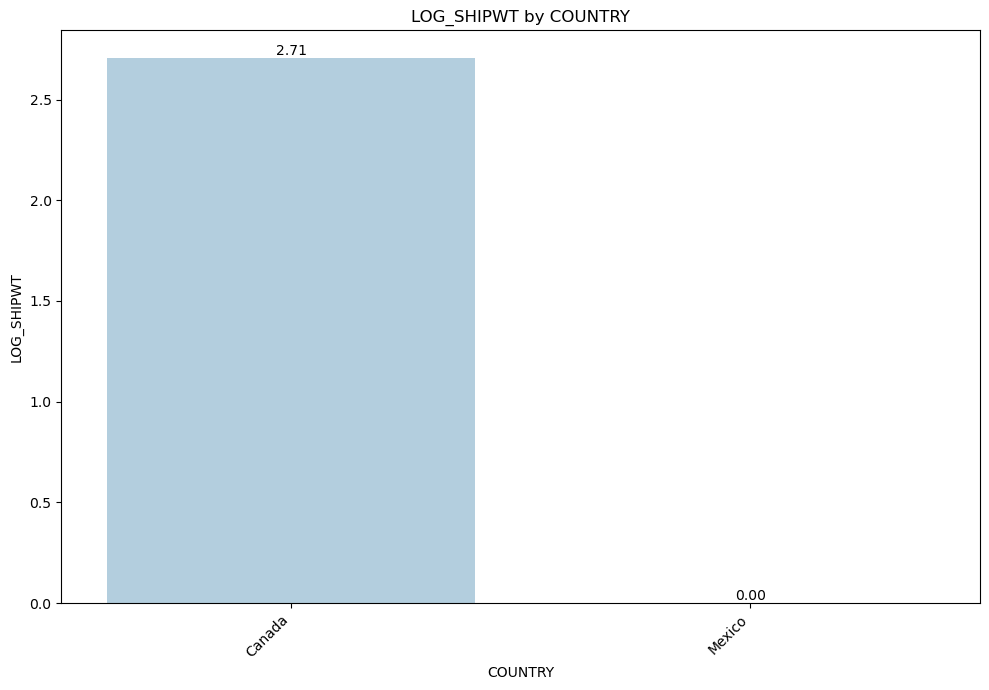

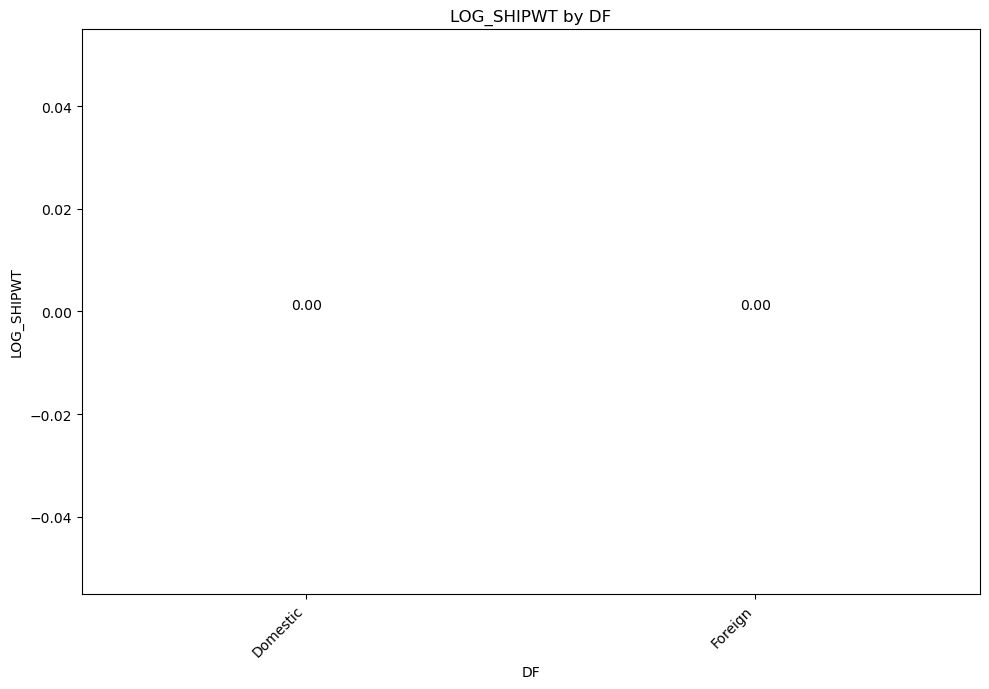

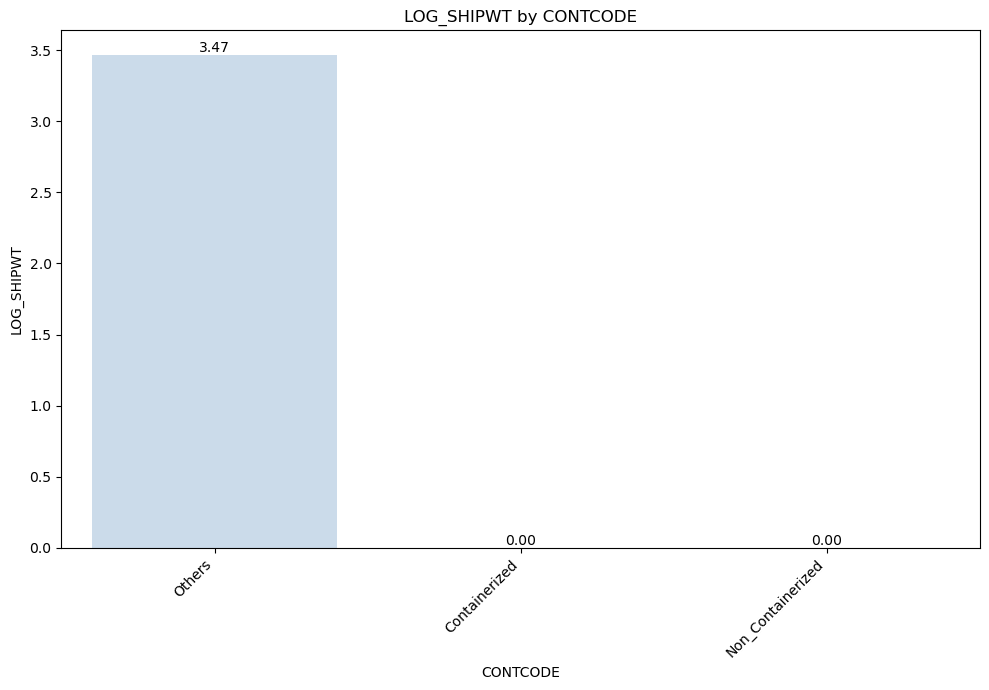

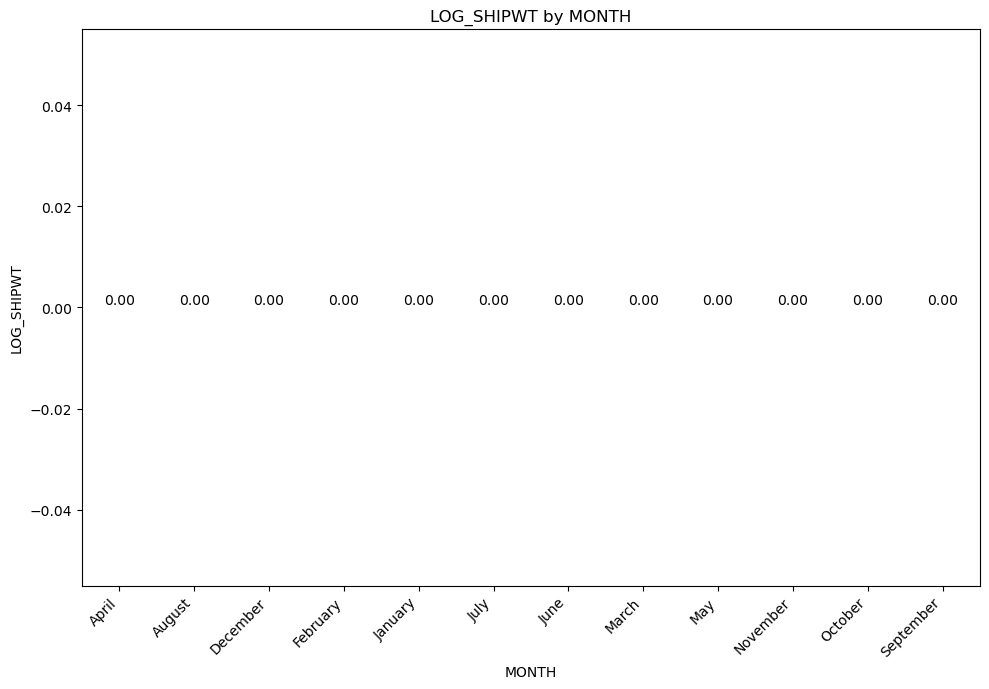

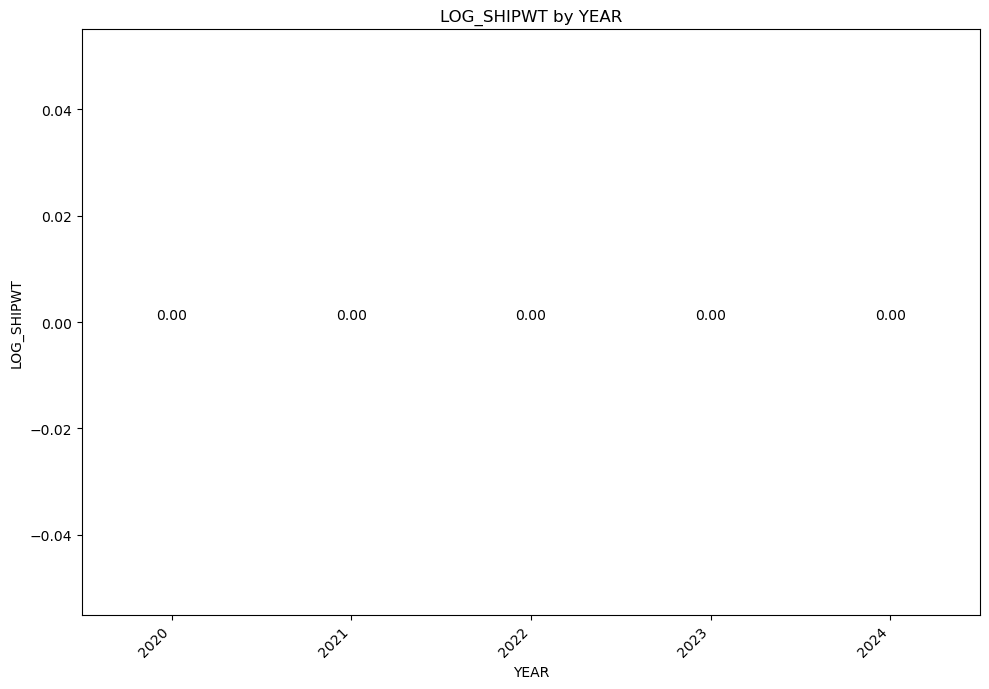

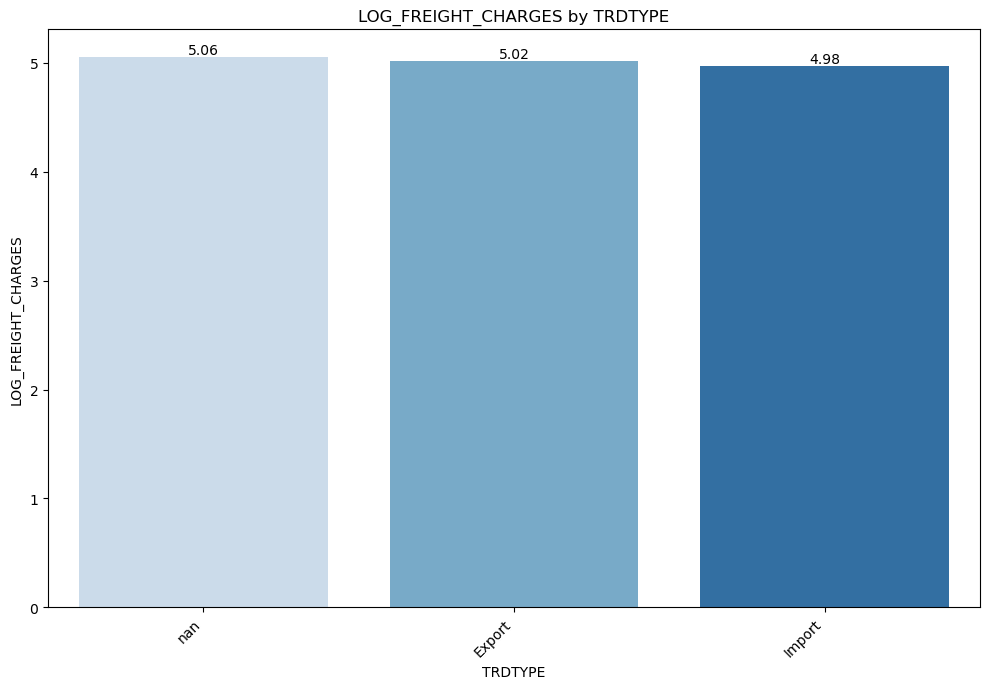

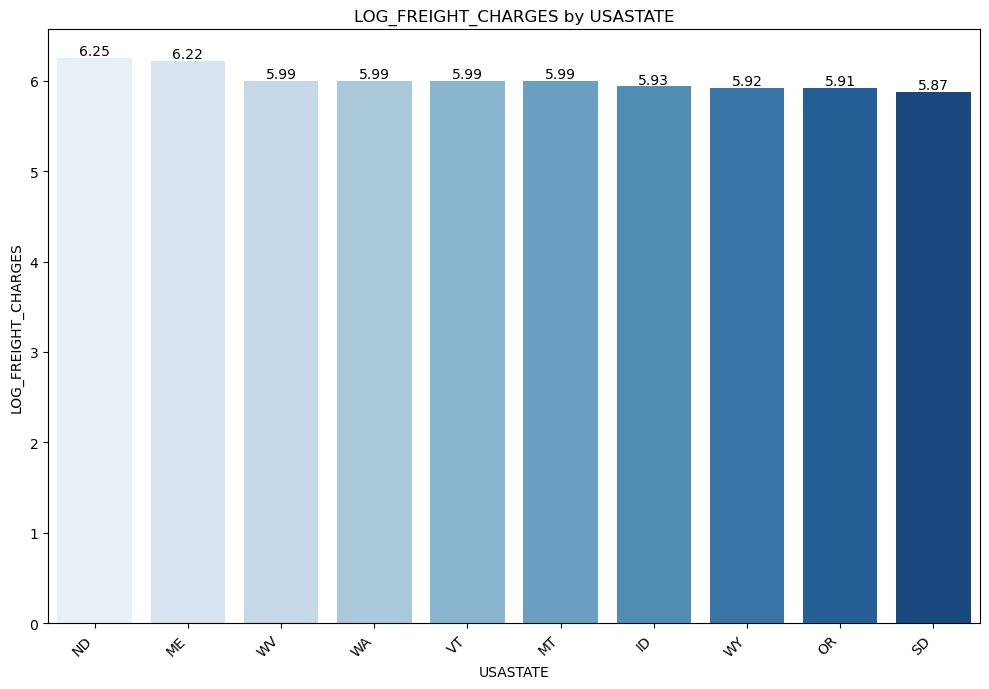

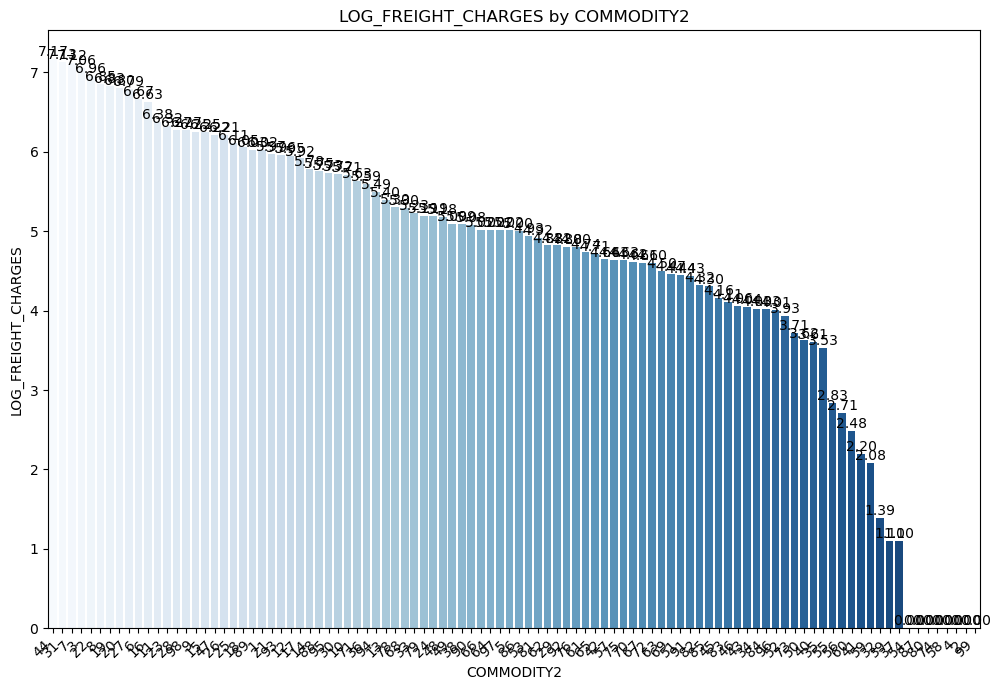

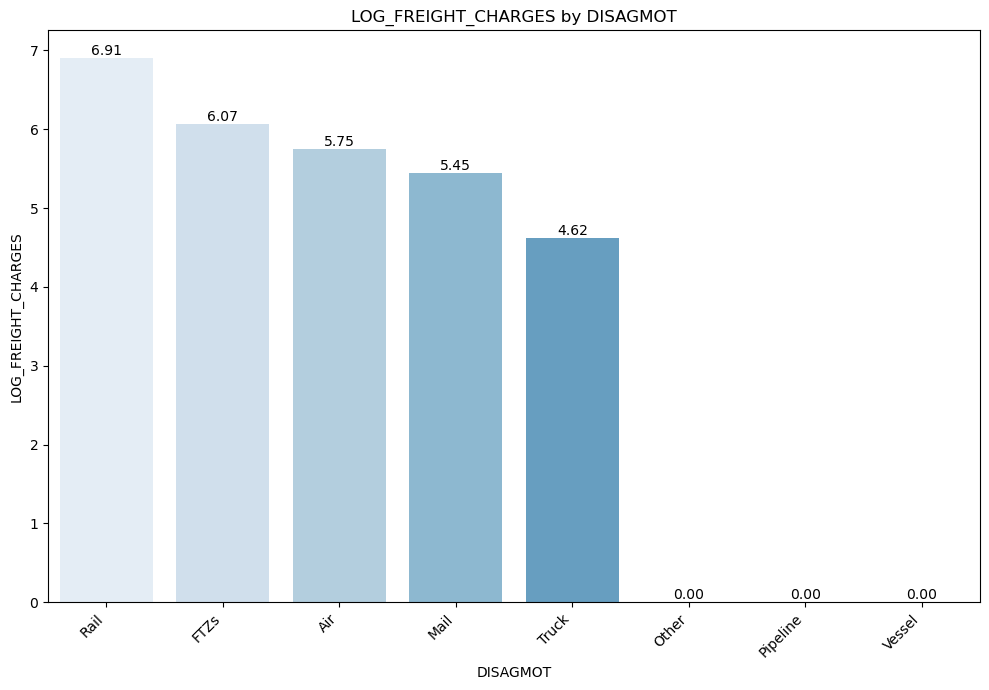

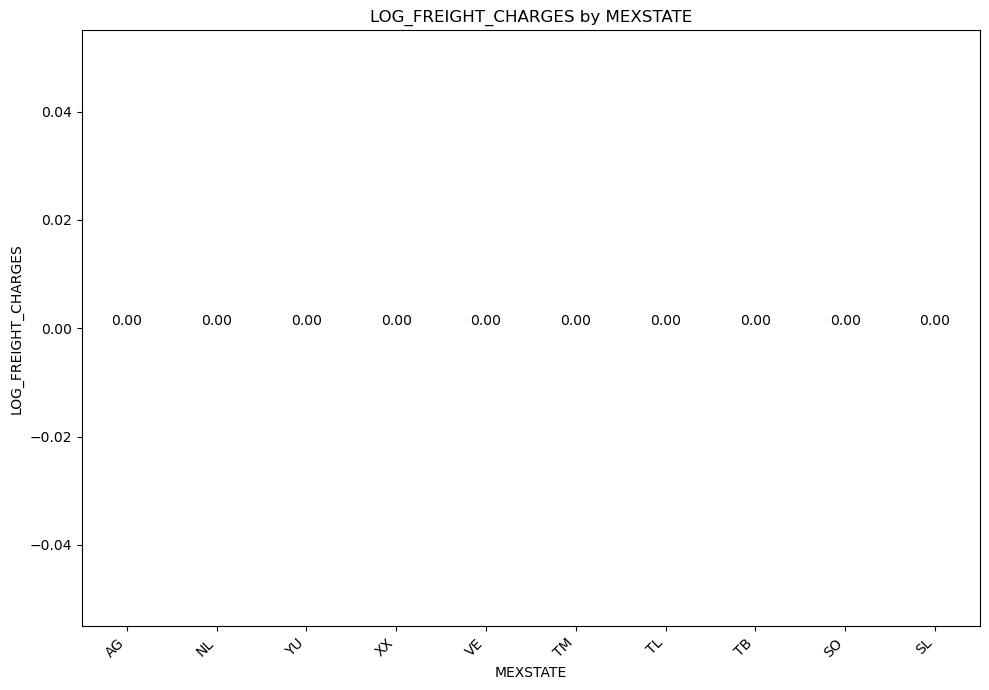

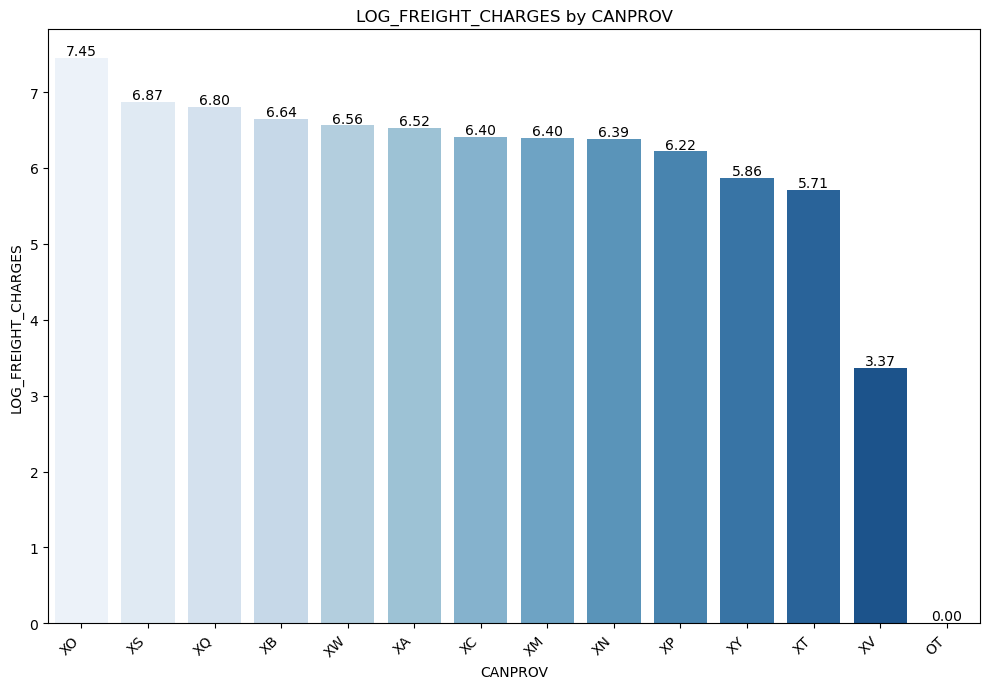

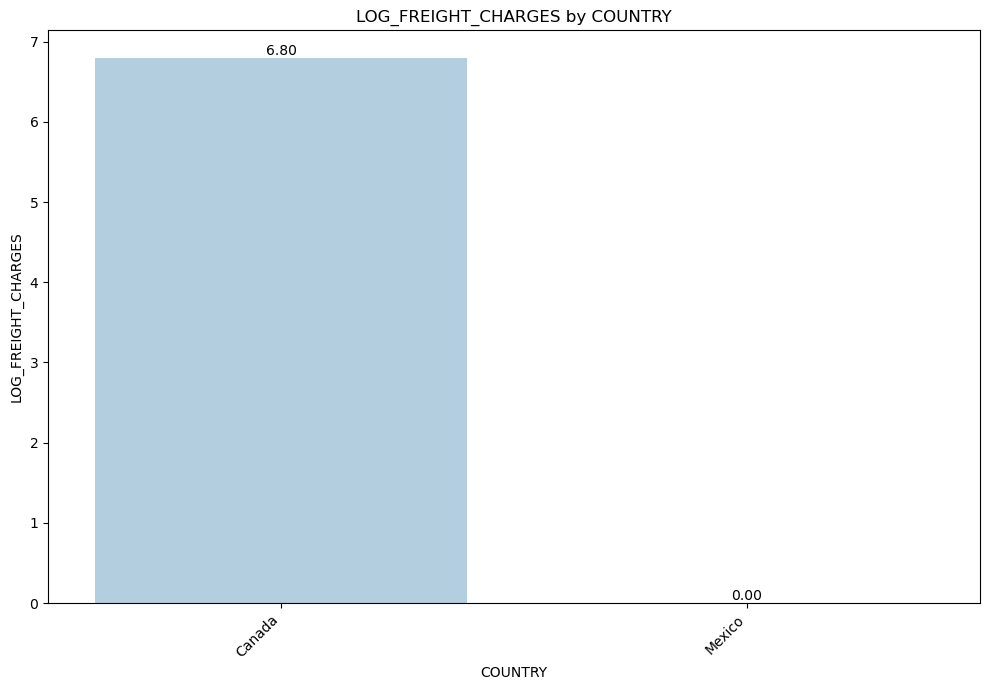

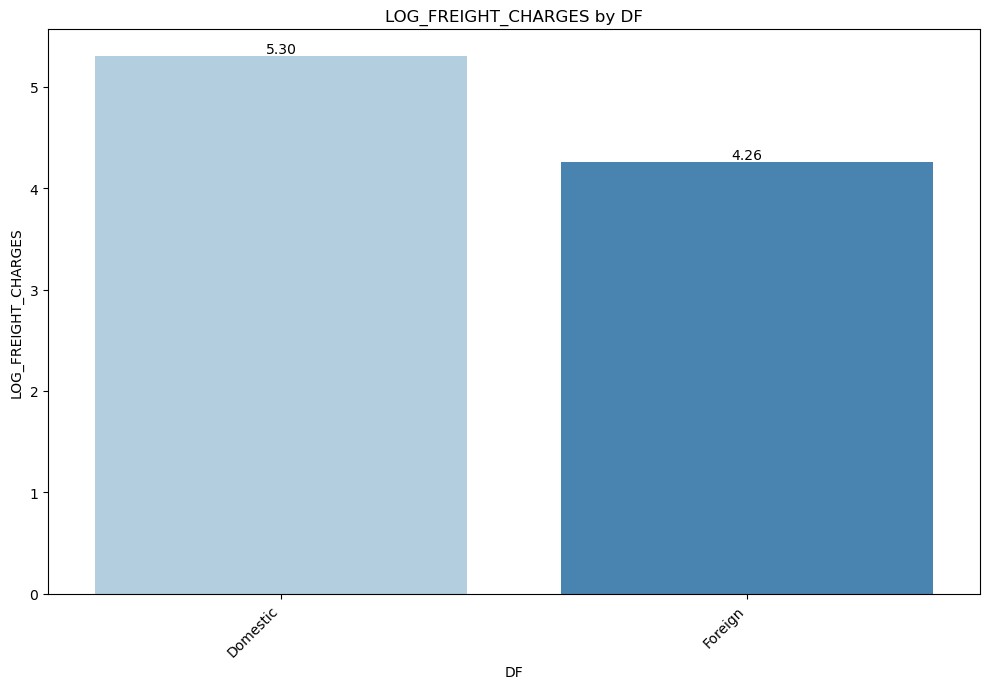

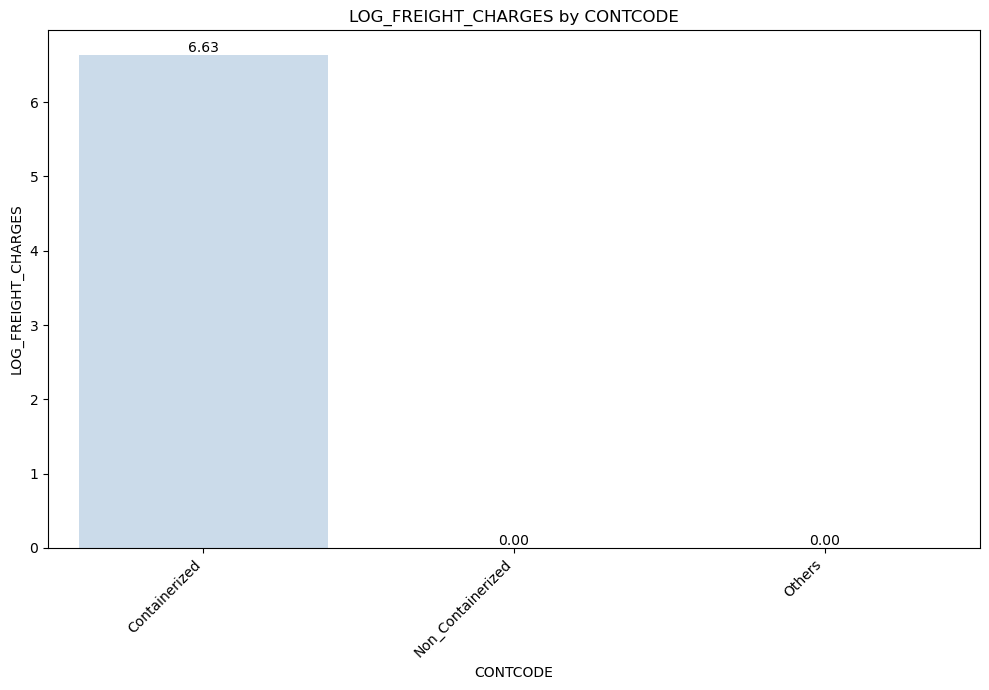

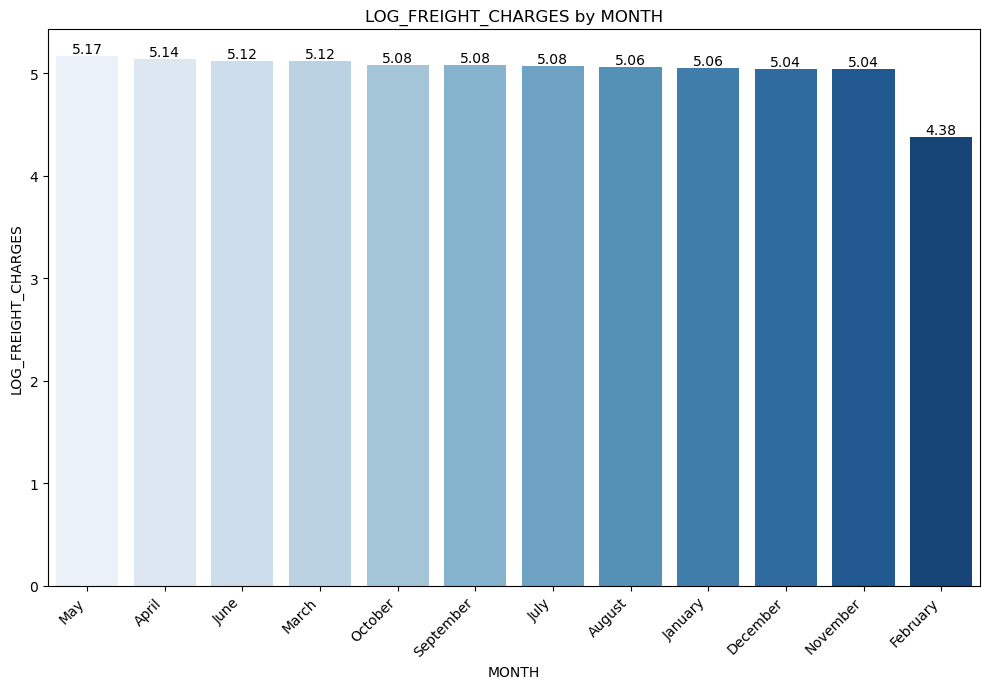

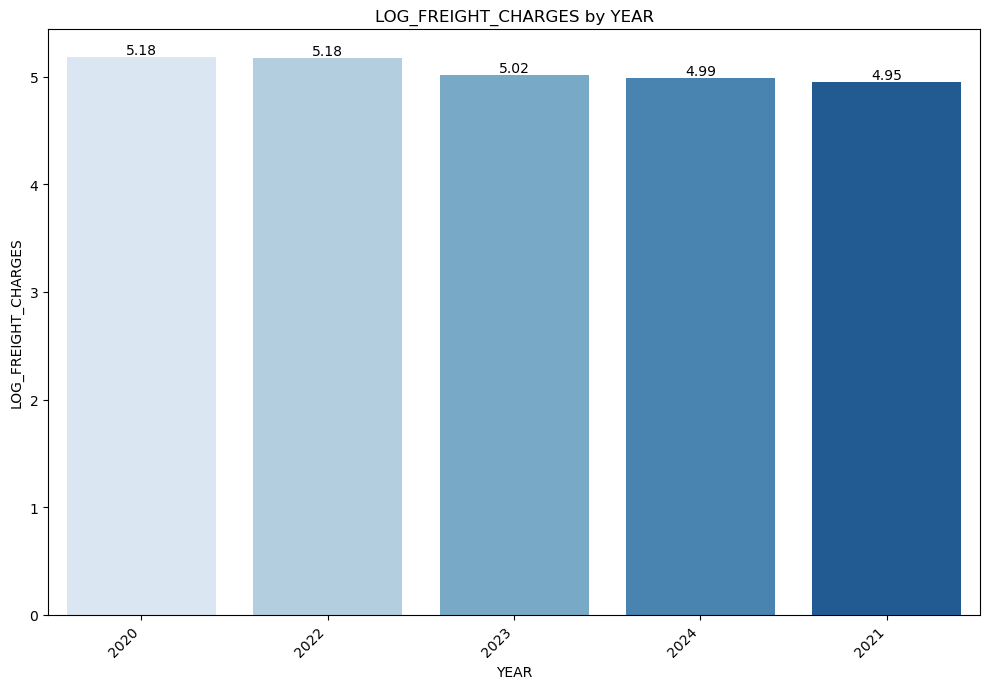

In [155]:
# Subsampling the data
sampled_df = combined_dot2.sample(frac=0.8, random_state=42)  # Adjust the fraction as needed

# List of numerical and categorical variables
numerical_vars = ['LOG_VALUE', 'LOG_SHIPWT', 'LOG_FREIGHT_CHARGES']
categorical_vars = ['TRDTYPE', 'USASTATE', 'COMMODITY2', 'DISAGMOT', 'MEXSTATE', 'CANPROV', 'COUNTRY', 'DF', 'CONTCODE', 'MONTH','YEAR']

# Function to add mean labels on top of the bars
def add_median_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center', 
                    fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')

# Function to handle plotting large categorical variables
def plot_bivariate_with_limit(num_var, cat_var, data, top_n=10):
    # Pre-aggregate the data (group by cat_var and calculate the mean of num_var)
    aggregated_data = data.groupby(cat_var)[num_var].median().reset_index()
    
    # Sort the aggregated data by the mean of the numerical variable in descending order
    sorted_data = aggregated_data.sort_values(by=num_var, ascending=False)
    
    # Limit to top N categories
    top_categories = sorted_data.head(top_n)
    
    # Plot the sorted data
    plt.figure(figsize=(10, 7))
    ax = sns.barplot(x=cat_var, y=num_var, data=top_categories, palette='Blues')
    plt.title(f'{num_var} by {cat_var}')
    plt.xticks(rotation=45, ha='right')  
    plt.tight_layout()  
    
    # Add mean labels on top of each bar
    add_median_labels(ax)
    
    # Show the plot
    plt.show()

# Loop through the variables
for num_var in numerical_vars:
    for cat_var in categorical_vars:
        # For DEPE and USASTATE, limit the categories to the top 10
        if cat_var in ['DEPE', 'USASTATE','MEXSTATE']:
            plot_bivariate_with_limit(num_var, cat_var, sampled_df, top_n=10)
        else:
            # For the rest of the categorical variables, plot all categories
            plt.figure(figsize=(10, 7))
            aggregated_data = sampled_df.groupby(cat_var)[num_var].median().reset_index()
            sorted_data = aggregated_data.sort_values(by=num_var, ascending=False)
            ax = sns.barplot(x=cat_var, y=num_var, data=sorted_data, palette='Blues')
            plt.title(f'{num_var} by {cat_var}')
            plt.xticks(rotation=45, ha='right')  
            plt.tight_layout()  
            
            # Add mean labels on top of each bar
            add_median_labels(ax)
            
            # Show the plot
            plt.show()


### Hypothesis Test and confirmation

#### 1.

In [156]:
# Calculate Pearson correlation coefficient and the p-value
corr_coefficient, p_value = stats.pearsonr(combined_dot2['LOG_VALUE'], combined_dot2['LOG_SHIPWT'])

# Significance level (alpha)
alpha = 0.05

# Print the results
print(f"Pearson correlation coefficient: {corr_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

# Hypothesis testing decision
if p_value <= alpha:
    print("Reject the null hypothesis: There is a significant correlation between VALUE and SHIPWT.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between VALUE and SHIPWT.")


Pearson correlation coefficient: 0.2398
P-value: 0.0000
Reject the null hypothesis: There is a significant correlation between VALUE and SHIPWT.


In [157]:
# Calculate the correlation coefficient between VALUE and SHIPWT
correlation_value_shipwt = combined_dot2[['LOG_VALUE', 'LOG_SHIPWT']].corr().iloc[0, 1]

# Print the correlation coefficient
print(f"The correlation coefficient between VALUE and SHIPWT is: {correlation_value_shipwt:.2f}")

The correlation coefficient between VALUE and SHIPWT is: 0.24


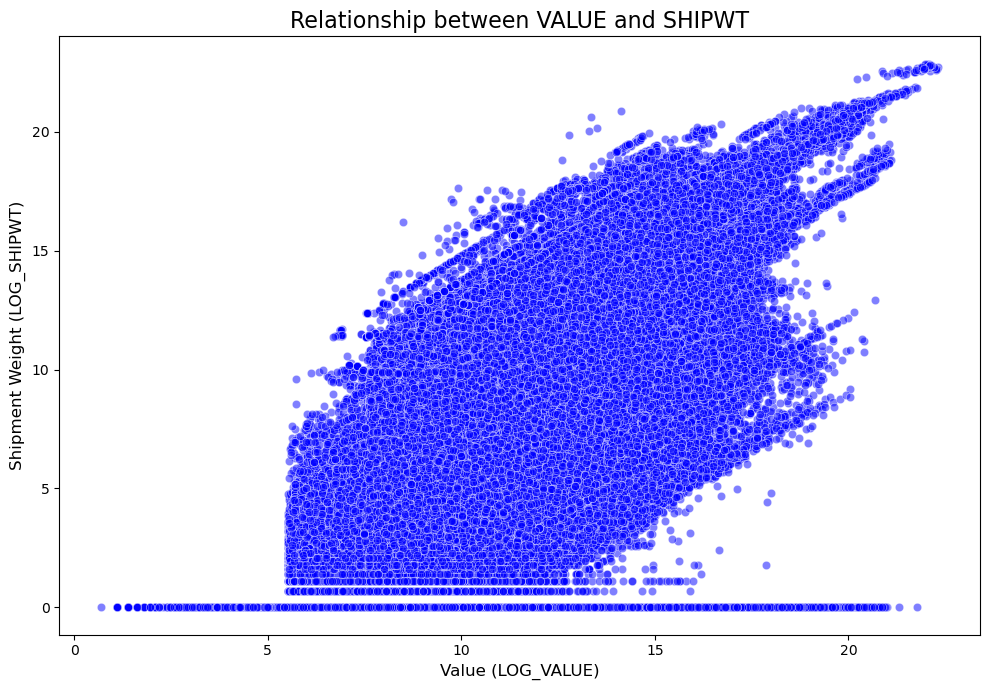

In [158]:
# Create a scatter plot to visualize the relationship between VALUE and SHIPWT
plt.figure(figsize=(10, 7))
sns.scatterplot(x='LOG_VALUE', y='LOG_SHIPWT', data=combined_dot2, color='Blue', alpha=0.5)

# Adding title and labels
plt.title('Relationship between VALUE and SHIPWT', fontsize=16)
plt.xlabel('Value (LOG_VALUE)', fontsize=12)
plt.ylabel('Shipment Weight (LOG_SHIPWT)', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

### Further Analytical Questions 

### 9. What are the top 10 most transported commodities, and how do their shipment volumes compare?

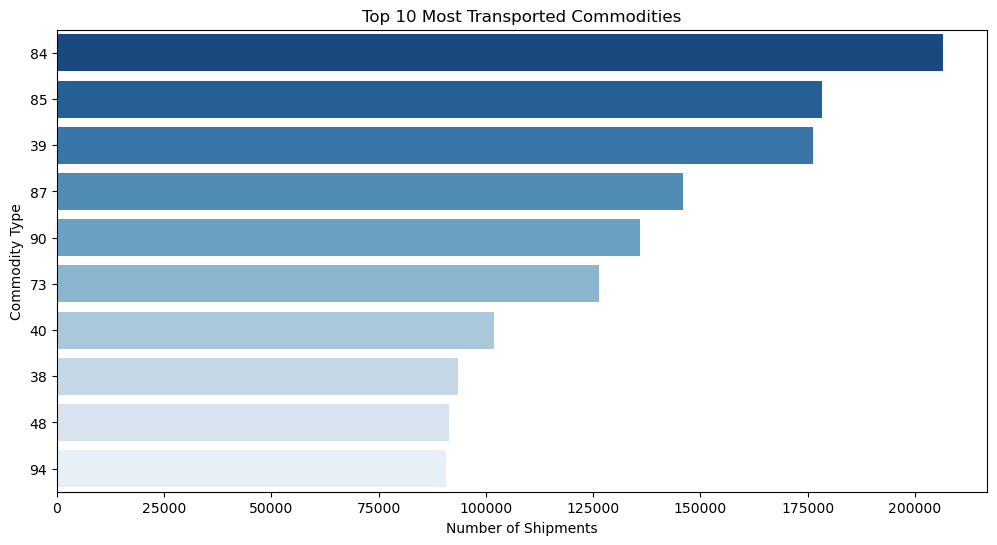

In [174]:
# Count the top 10 most transported commodities
top_commodities = combined_dot2["COMMODITY2"].value_counts().nlargest(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_commodities.values, y=top_commodities.index, palette="Blues_r")

plt.title("Top 10 Most Transported Commodities")
plt.xlabel("Number of Shipments")
plt.ylabel("Commodity Type")

plt.show()

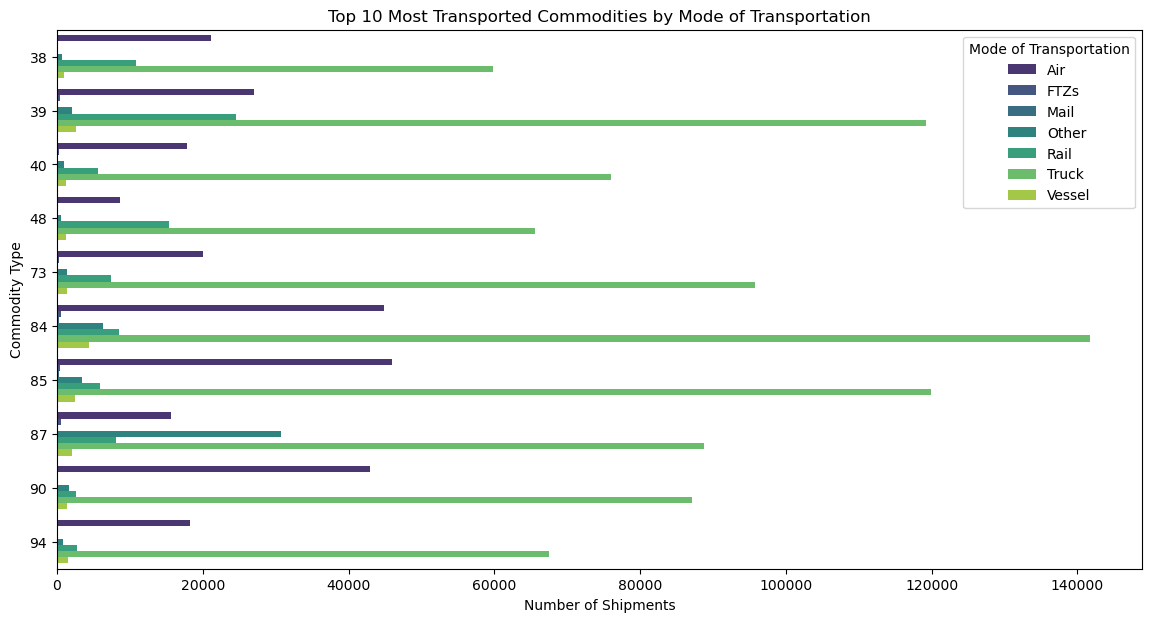

In [176]:
top_commodities = combined_dot2["COMMODITY2"].value_counts().nlargest(10).index

# Filter the data for only these commodities
filtered_data = combined_dot2[combined_dot2["COMMODITY2"].isin(top_commodities)]

# Count occurrences by mode
commodity_transport_counts = filtered_data.groupby(["COMMODITY2", "DISAGMOT"]).size().reset_index(name="Count")

# Plot
plt.figure(figsize=(14, 7))
sns.barplot(
    data=commodity_transport_counts, 
    x="Count", 
    y="COMMODITY2", 
    hue="DISAGMOT", 
    palette="viridis"
)

plt.title("Top 10 Most Transported Commodities by Mode of Transportation")
plt.xlabel("Number of Shipments")
plt.ylabel("Commodity Type")
plt.legend(title="Mode of Transportation")

plt.show()
